<a href="https://colab.research.google.com/github/Twist3d-Fate/Heart-Disease-Detection-From-Scratch/blob/main/Heart_Disease_Detection_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP From Scratch For Heart Disease Detection

# Importing Libraries

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math

# EDA For Dataset

In [302]:
df = pd.read_csv("heartdataset.csv")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [304]:
df.describe(include='all')

age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000     0.000000     0.000000   
25%       0.000000     0.000000   132.000000     0.000000     0.000000   
50%       0.000000     1.000000   152.000000     0.000000     0.800000   
75%       0.000000     1.000000   166.000000     1.000000     1.800000   
max       1.000000     2.000000   202.000000     1.000000     6.200000   

             slope           ca         thal       target  
count  1025.000000  1025.000000  1025.000000  1025.000000  
mean      1.385366     0.754146     2.323902     0.513171  
std       0.617755     1.030798     0.620660     0.500070  
min       0.000000     0.000000     0.000000     0.000000  
25%       1.000000     0.000000     2.000000     0.000000  
50%       1.000000     0.000000     2.000000     1.000000  
75%       2.000000     1.000000     3.000000     1.000000  
max       2.000000     4.000000     3.000000     1.000000

In [305]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [306]:
for i in range(len(df.columns)):
    print(df[df.columns[i]].unique())

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
[1 0]
[0 1 2 3]
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141]
[0 1]
[1 0 2]
[168 155 125 161 106 122 1

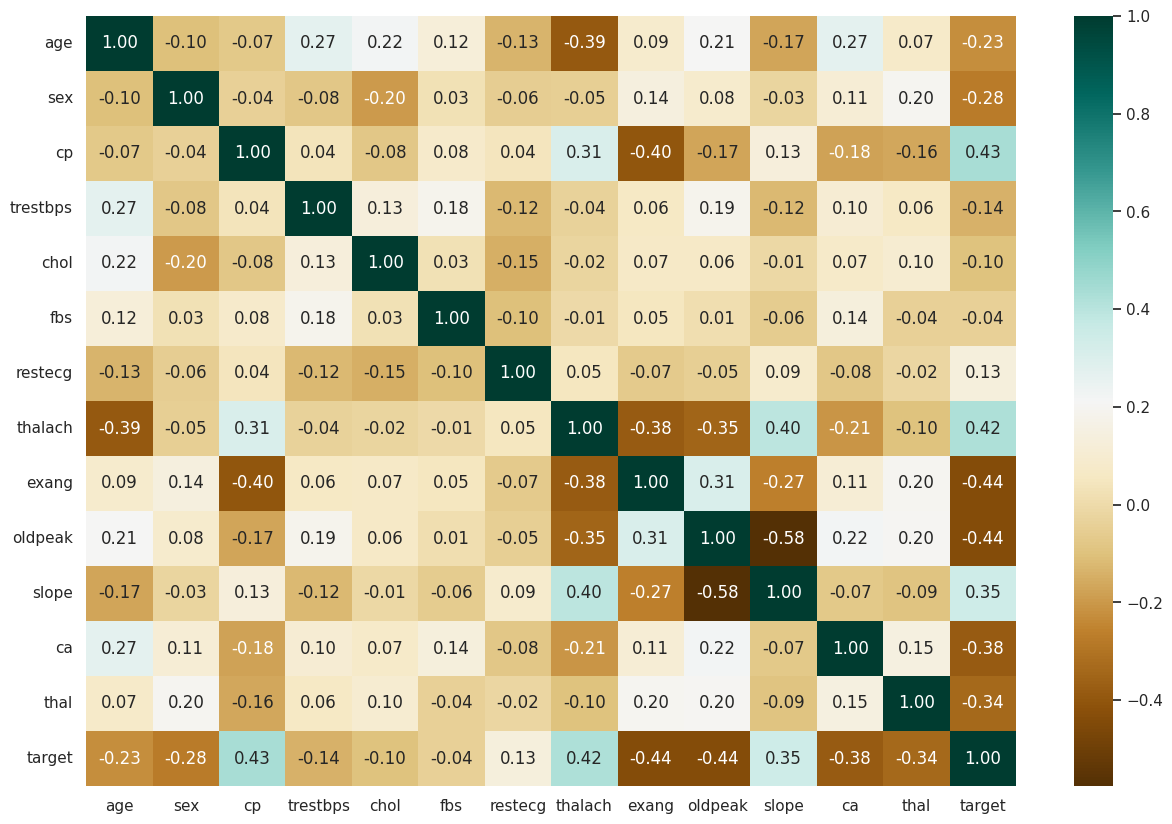

In [307]:
df_corr = df.corr()

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool), cmap="BrBG", annot=True, ax=ax, fmt='.2f')
plt.show()

# Data Visualization

In [308]:
def diagnostic_plots(variable, target):

    sns.set()

    # Define Figure Size
    plt.figure(figsize=(20, 20), facecolor='lightgray')

    # Histogram
    plt.subplot(221)
    sns.histplot(x=df[variable], hue=df[target], kde=True, palette="YlOrBr")
    plt.legend(['Female','Male'])
    plt.title('Histogram')


    # Scatterplot
    plt.subplot(222)
    sns.scatterplot(x=df[variable], y=df[target], hue=df['sex'], palette="mako")
    plt.legend(['Female','Male'])
    plt.title('Scatterplot')


    # Boxplot
    plt.subplot(223)
    sns.boxplot(y=df[variable], x=df[target], hue=df['sex'], palette="mako")
    plt.legend(['Female','Male'])
    plt.title('Boxplot')

    # Barplot
    plt.subplot(224)
    sns.barplot(x=df[target], y=df[variable], hue=df['sex'], palette="flare")
    plt.legend(['Female','Male'])
    plt.title('Barplot')


    plt.show()

    plt.figure(figsize=(15, 15), facecolor='lightgray')

    reg = pd.crosstab(df[variable], df[target])
    reg.plot(kind="area", stacked=False, alpha=0.5, figsize=(20,10))
    plt.title(f"{variable}-Target", fontsize=20)
    plt.xlabel(target, fontsize=20)
    plt.ylabel(variable, fontsize=20)
    plt.show()

    reg.plot(kind="bar", figsize=(20,10), color=['green', 'red'])
    plt.title(f'Heart Disease Frequency for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

------------------------------------------------------------------------------------------------------  age  ----------------------------------------------------------------------------------------------------


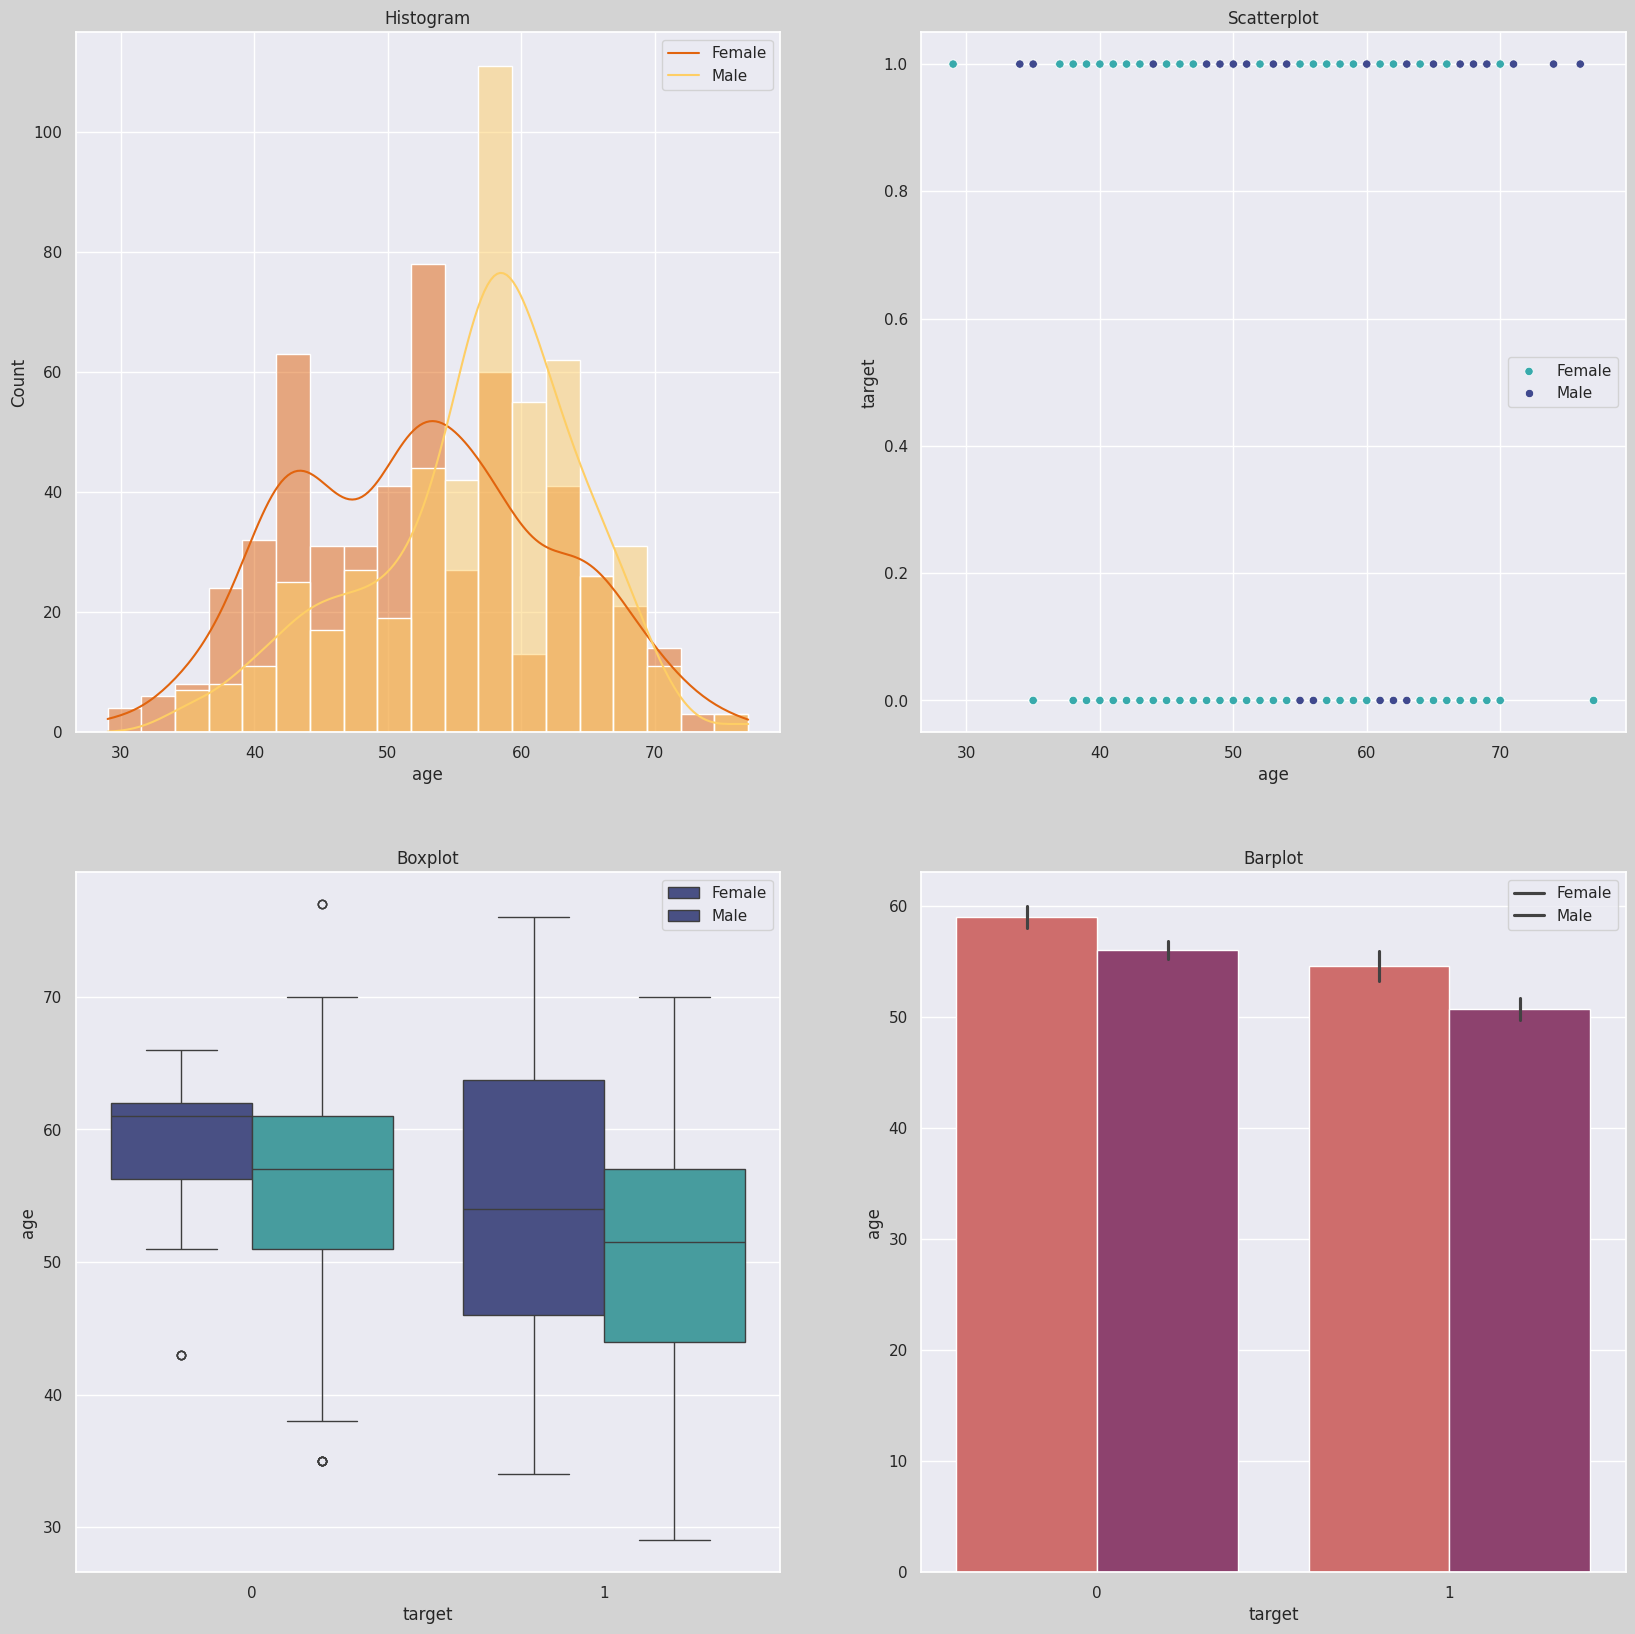

<Figure size 1500x1500 with 0 Axes>

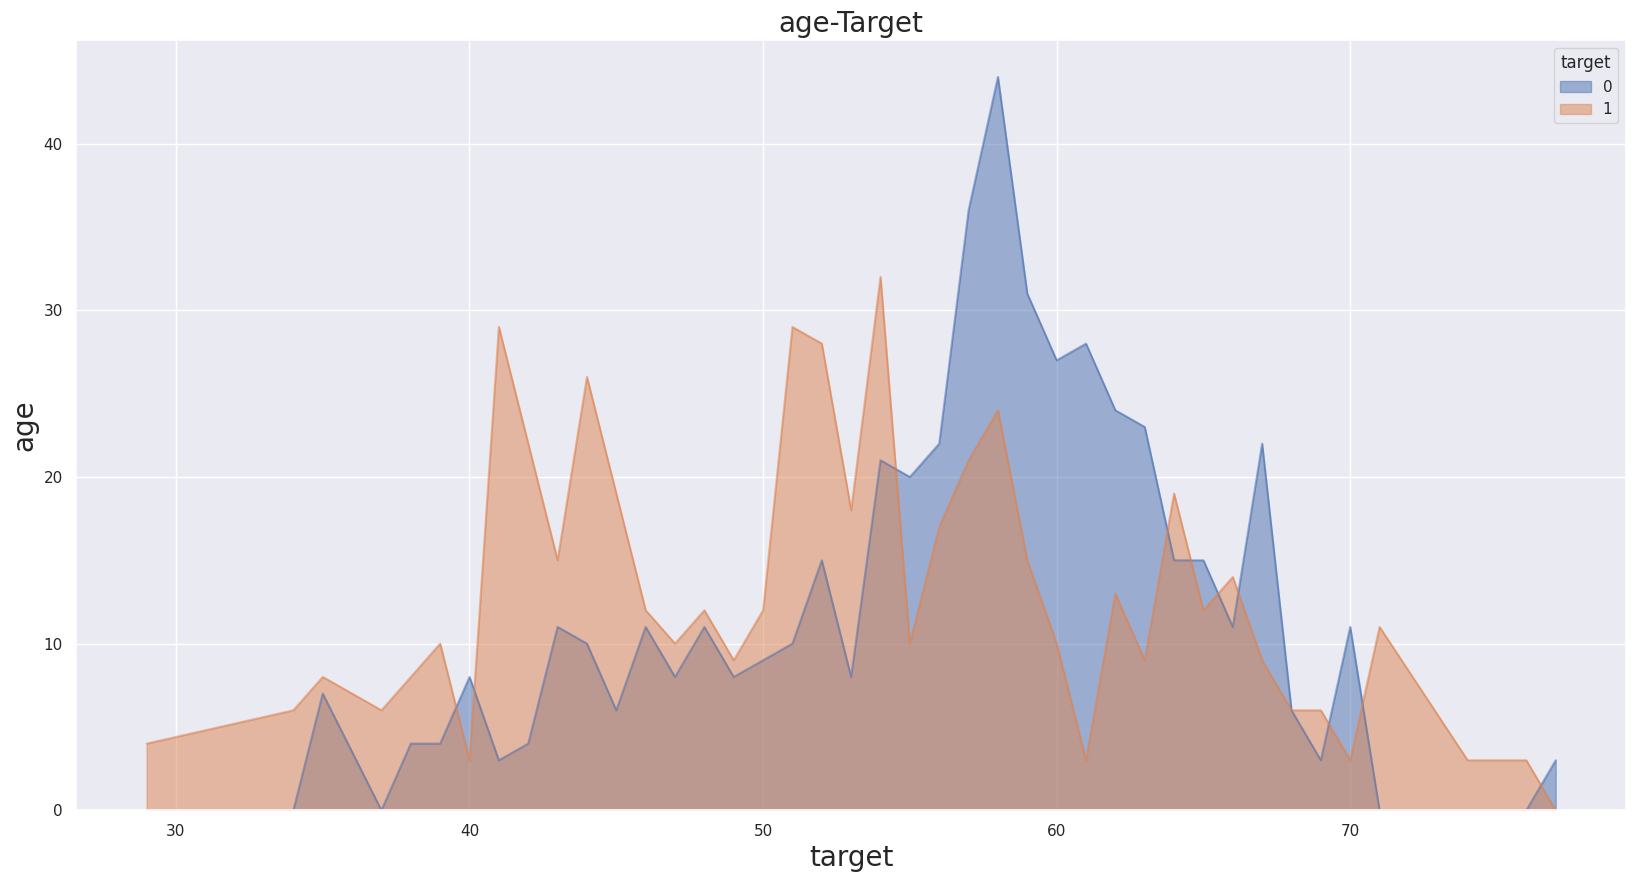

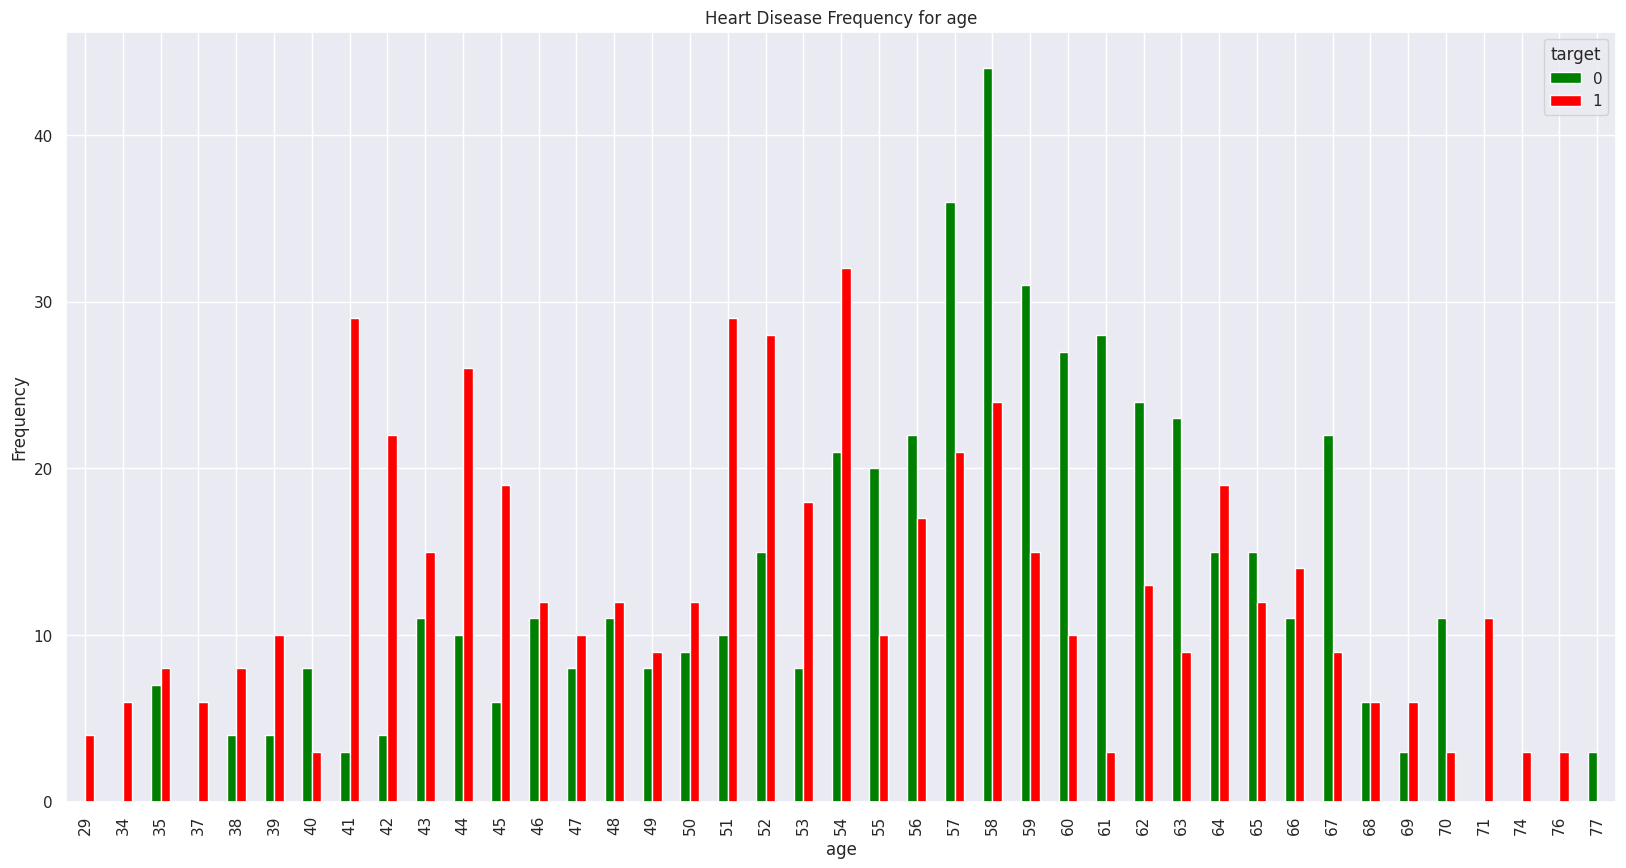



------------------------------------------------------------------------------------------------------  sex  ----------------------------------------------------------------------------------------------------


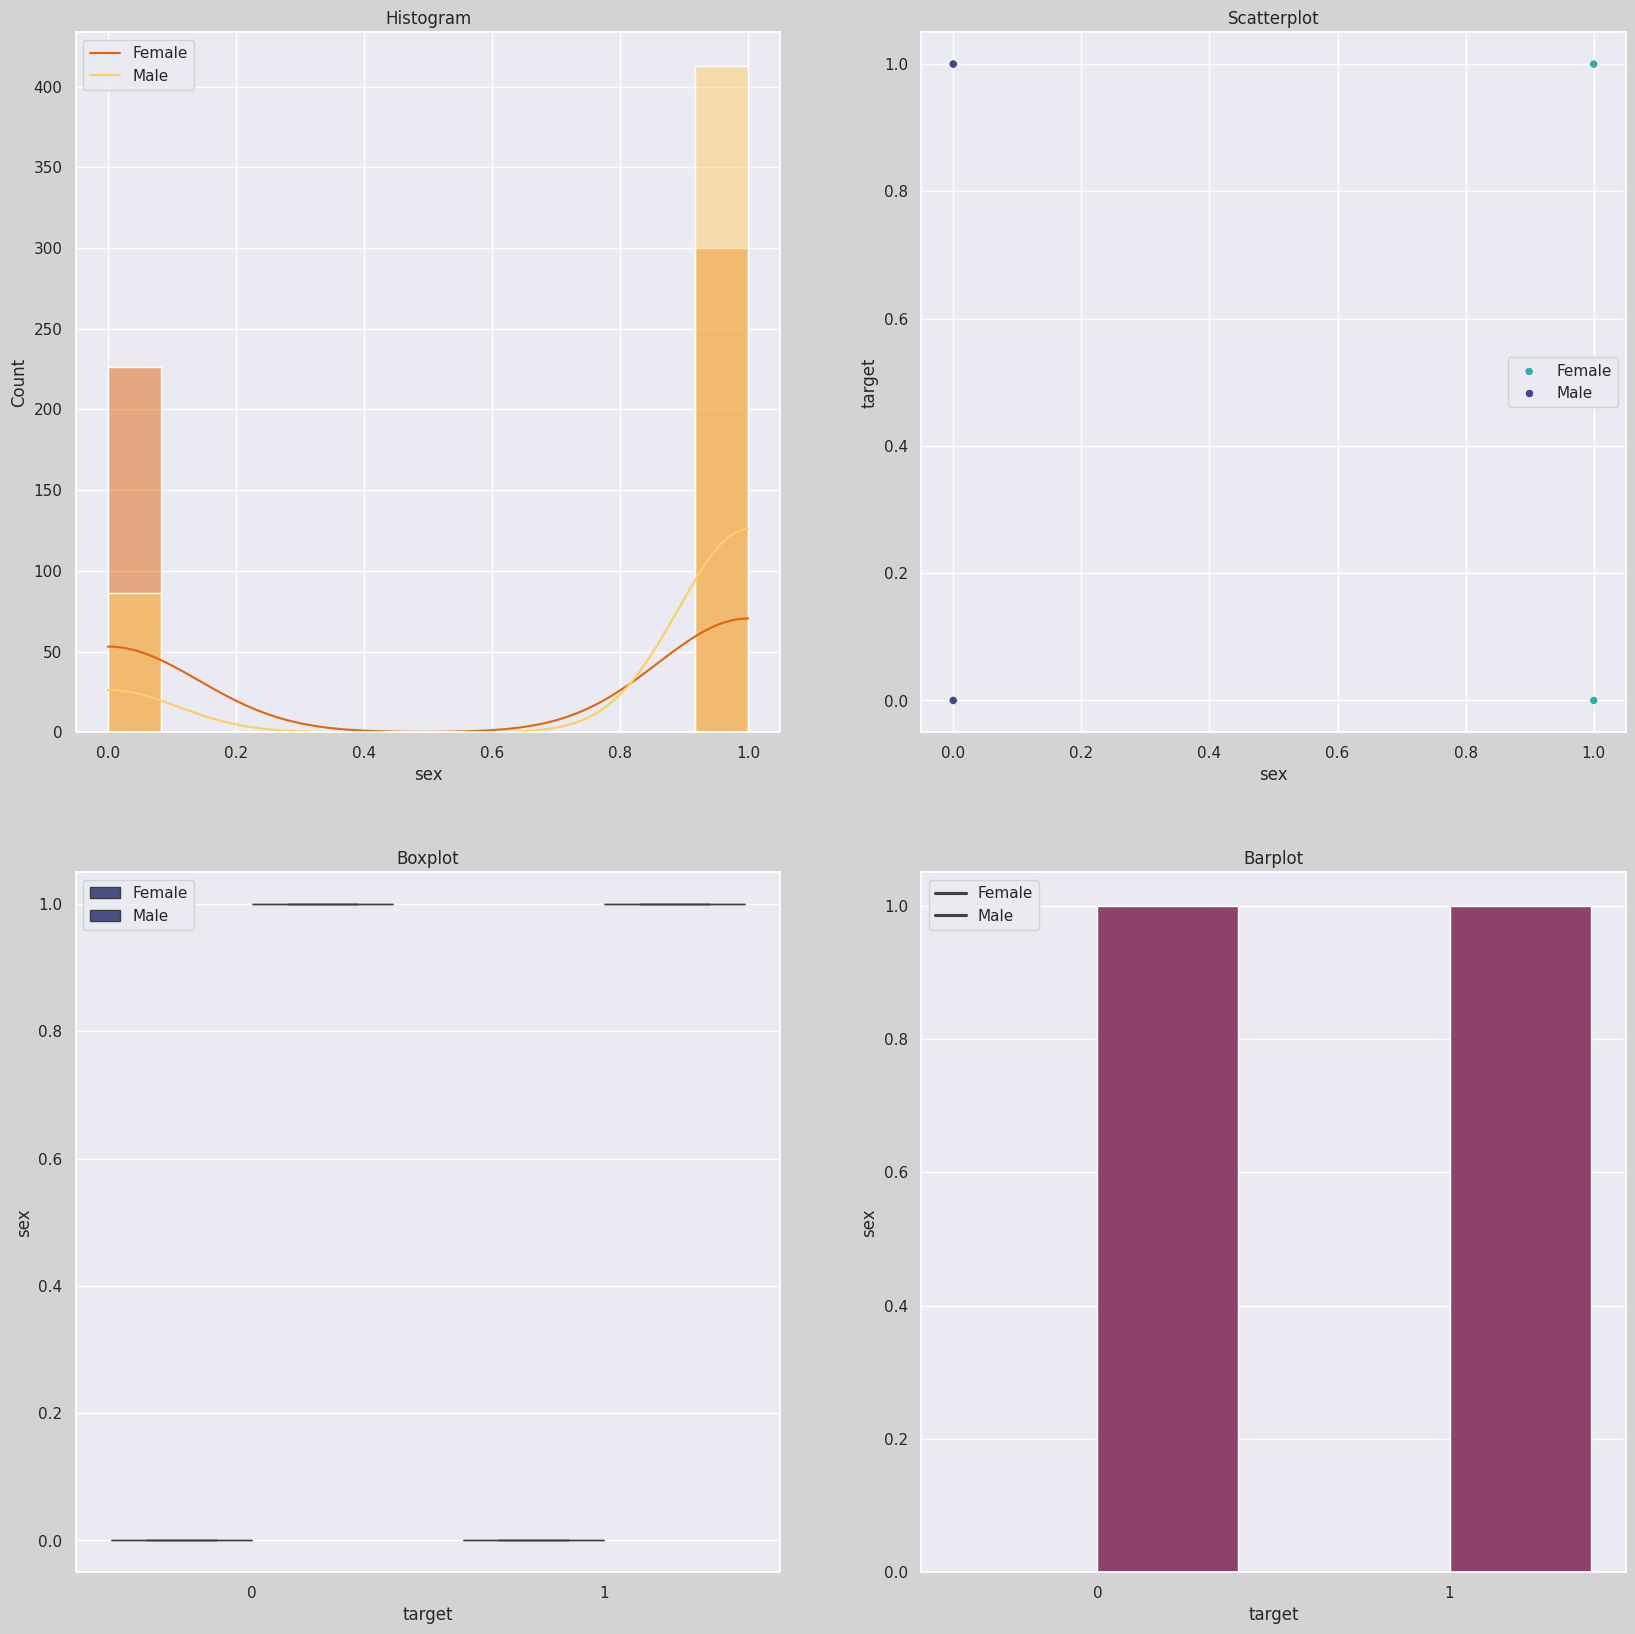

<Figure size 1500x1500 with 0 Axes>

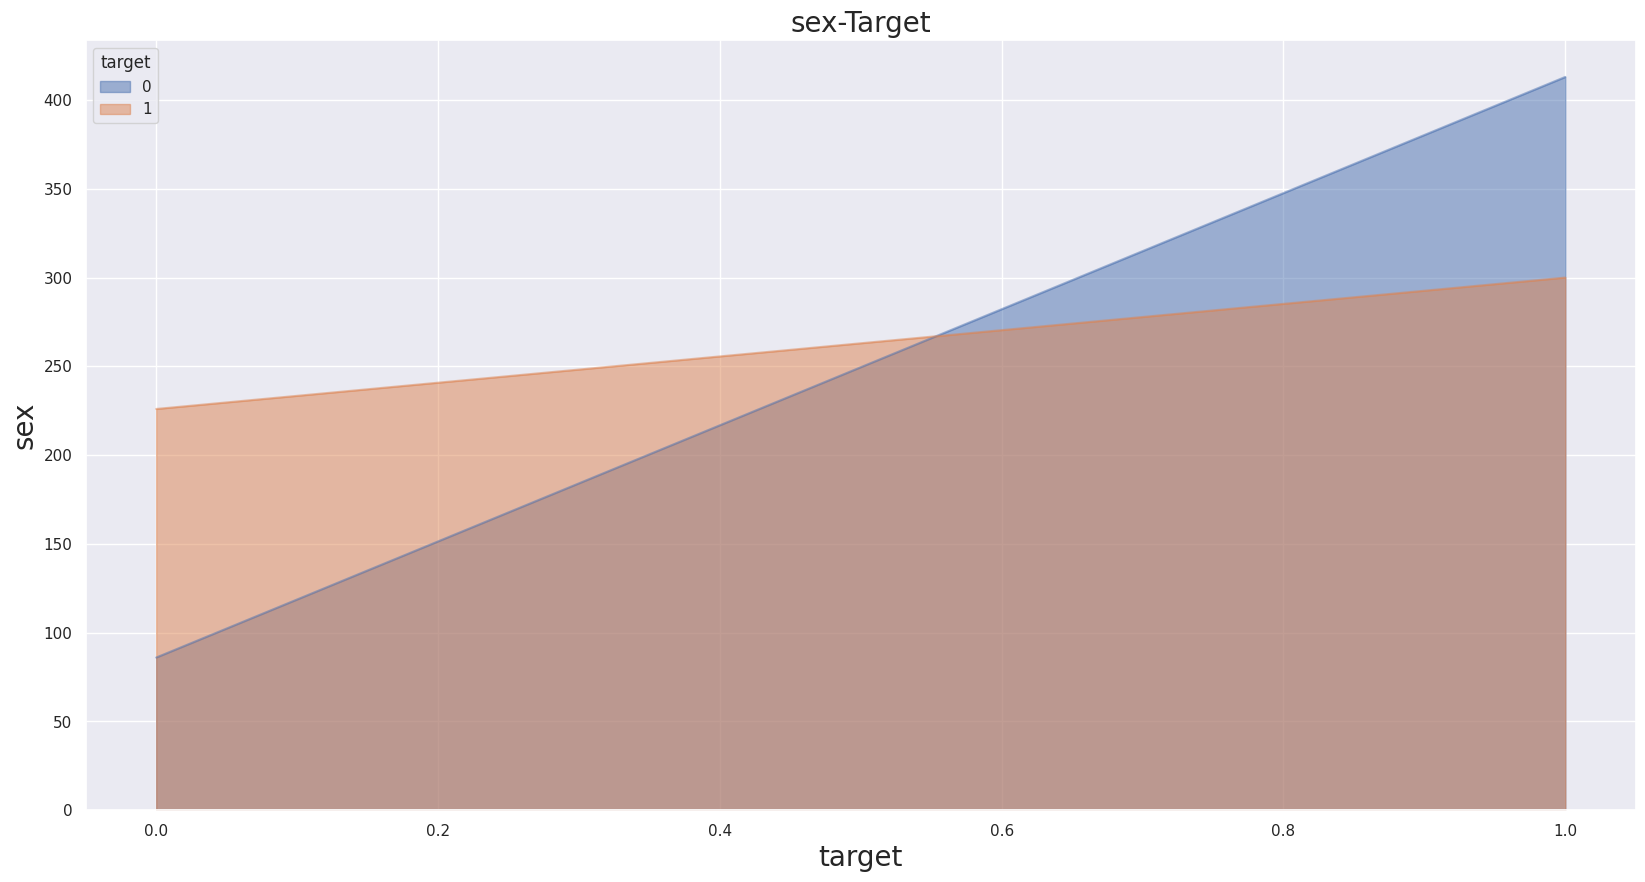

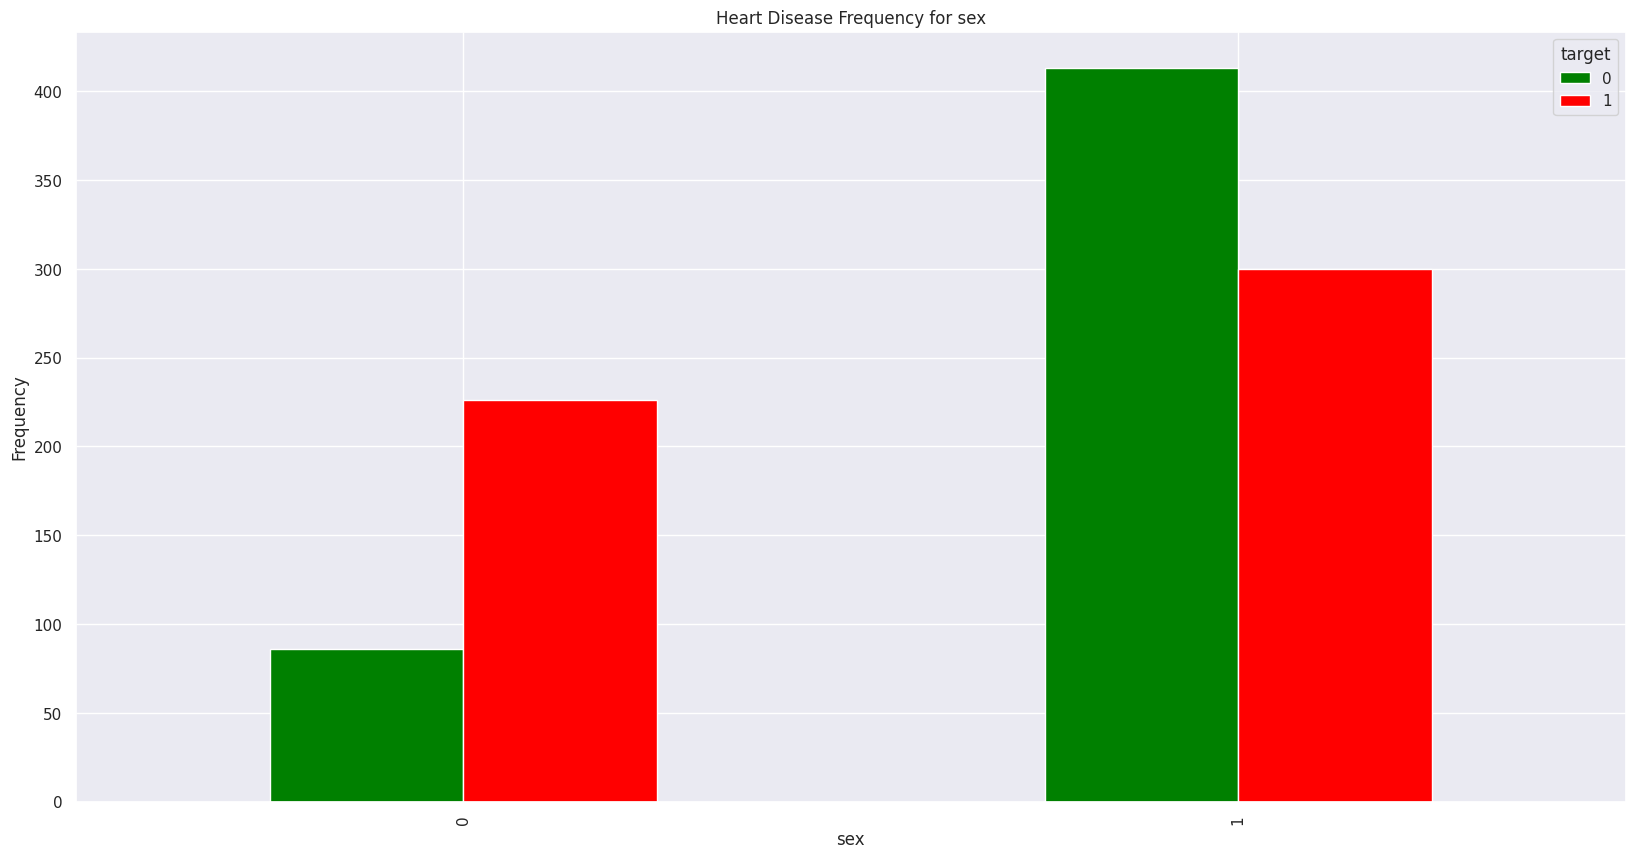



------------------------------------------------------------------------------------------------------  cp  ----------------------------------------------------------------------------------------------------


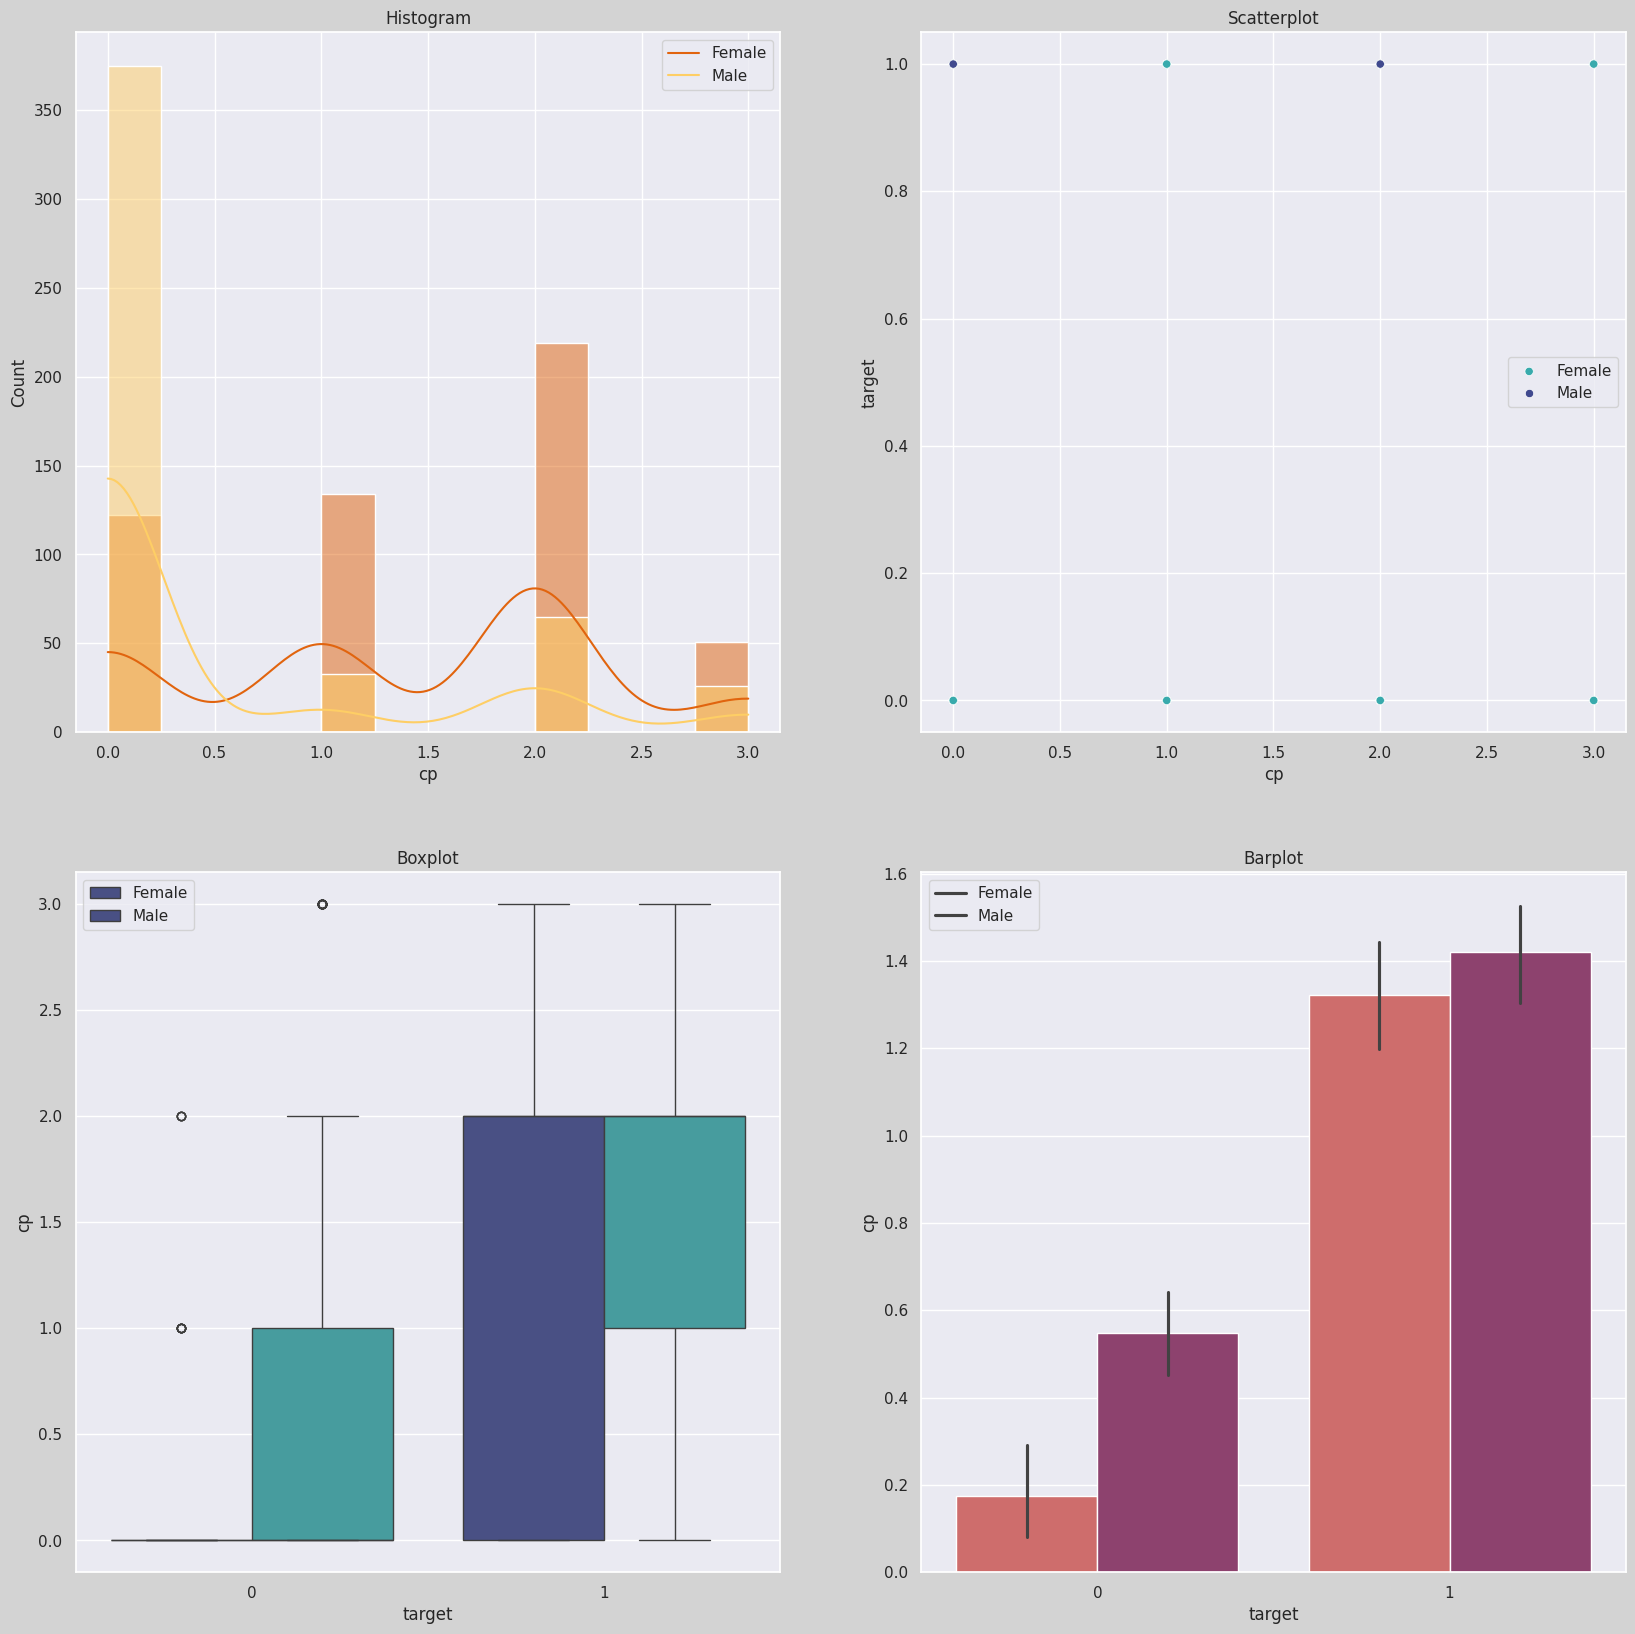

<Figure size 1500x1500 with 0 Axes>

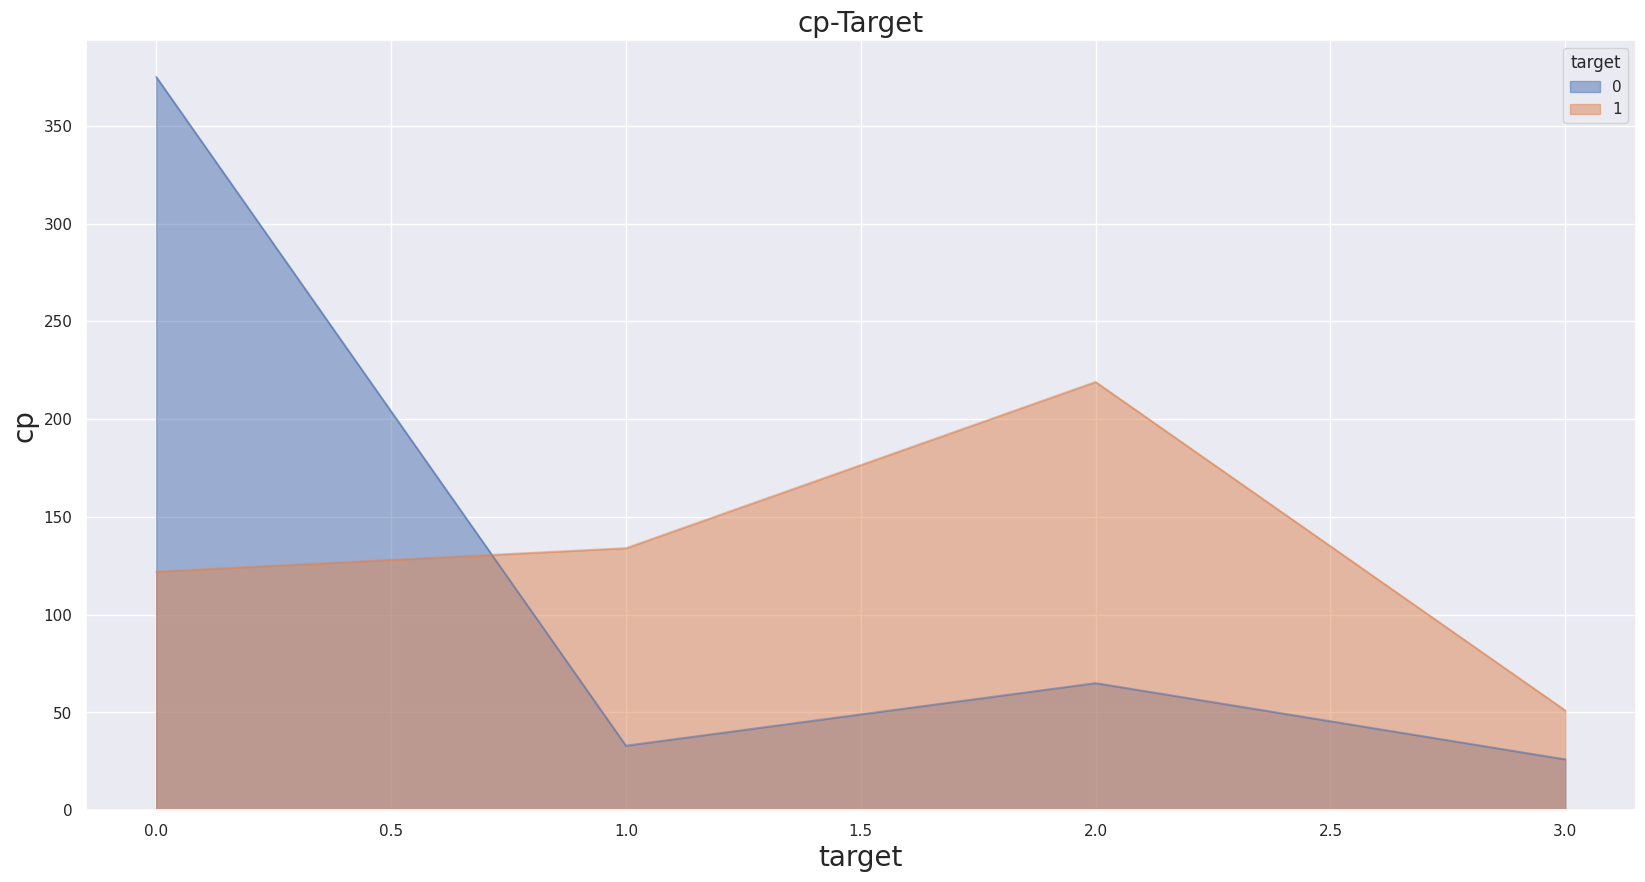

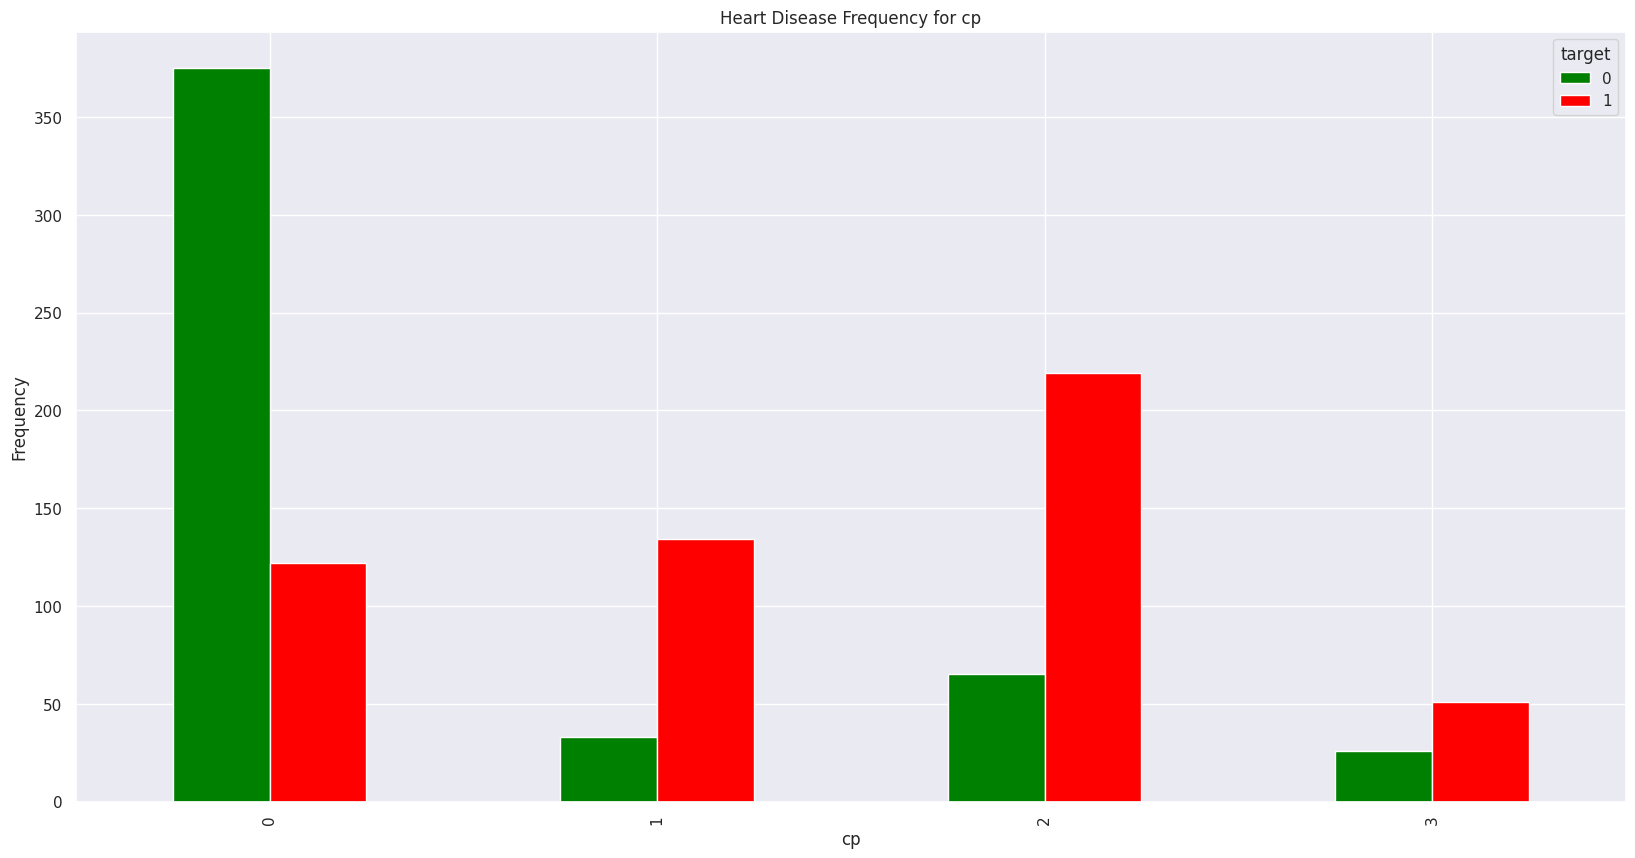



------------------------------------------------------------------------------------------------------  trestbps  ----------------------------------------------------------------------------------------------------


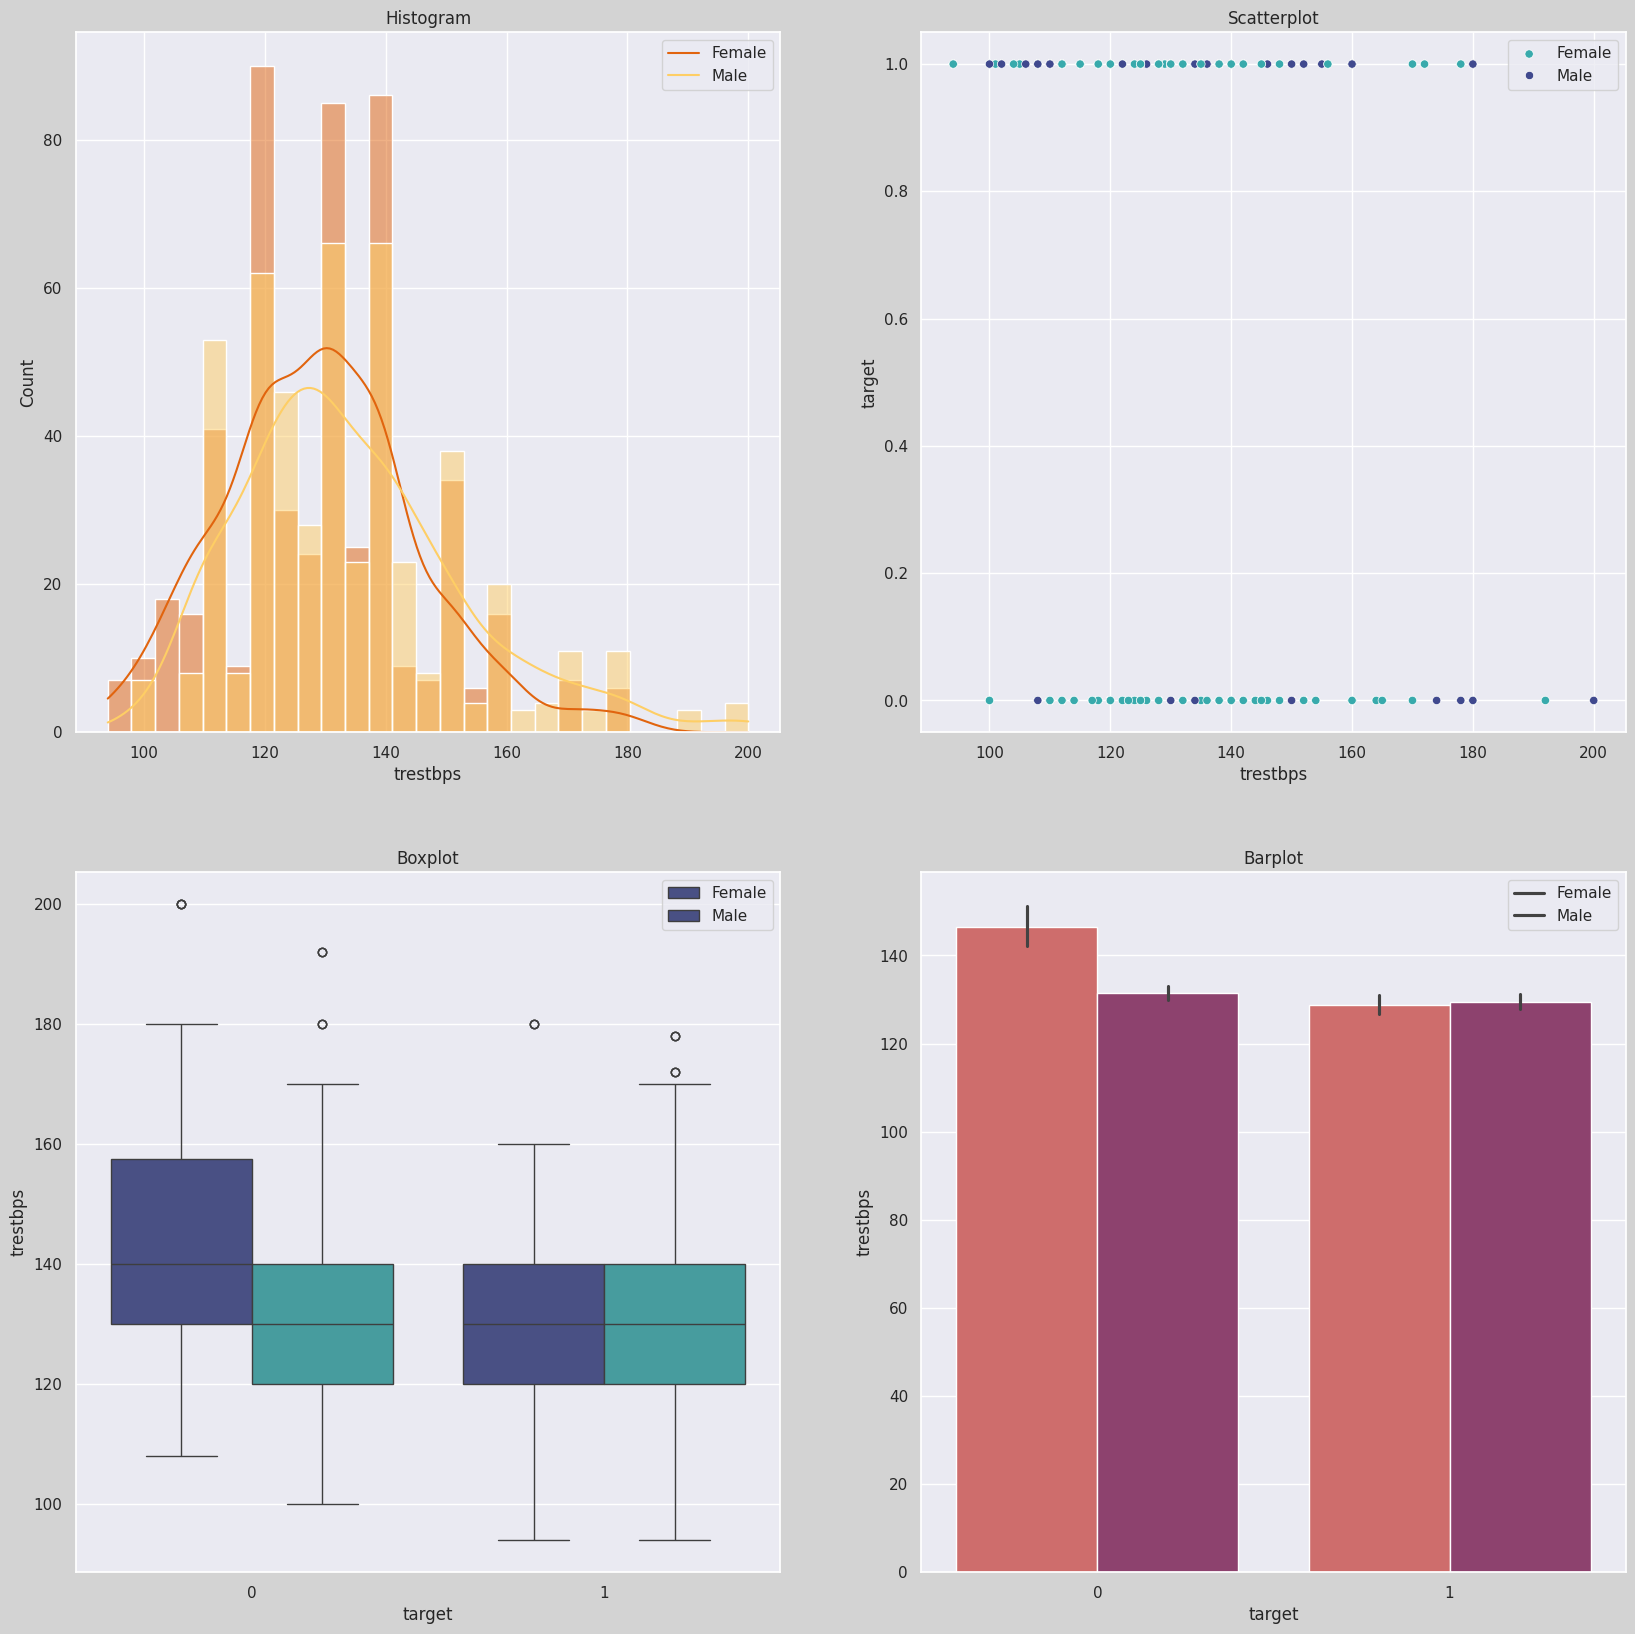

<Figure size 1500x1500 with 0 Axes>

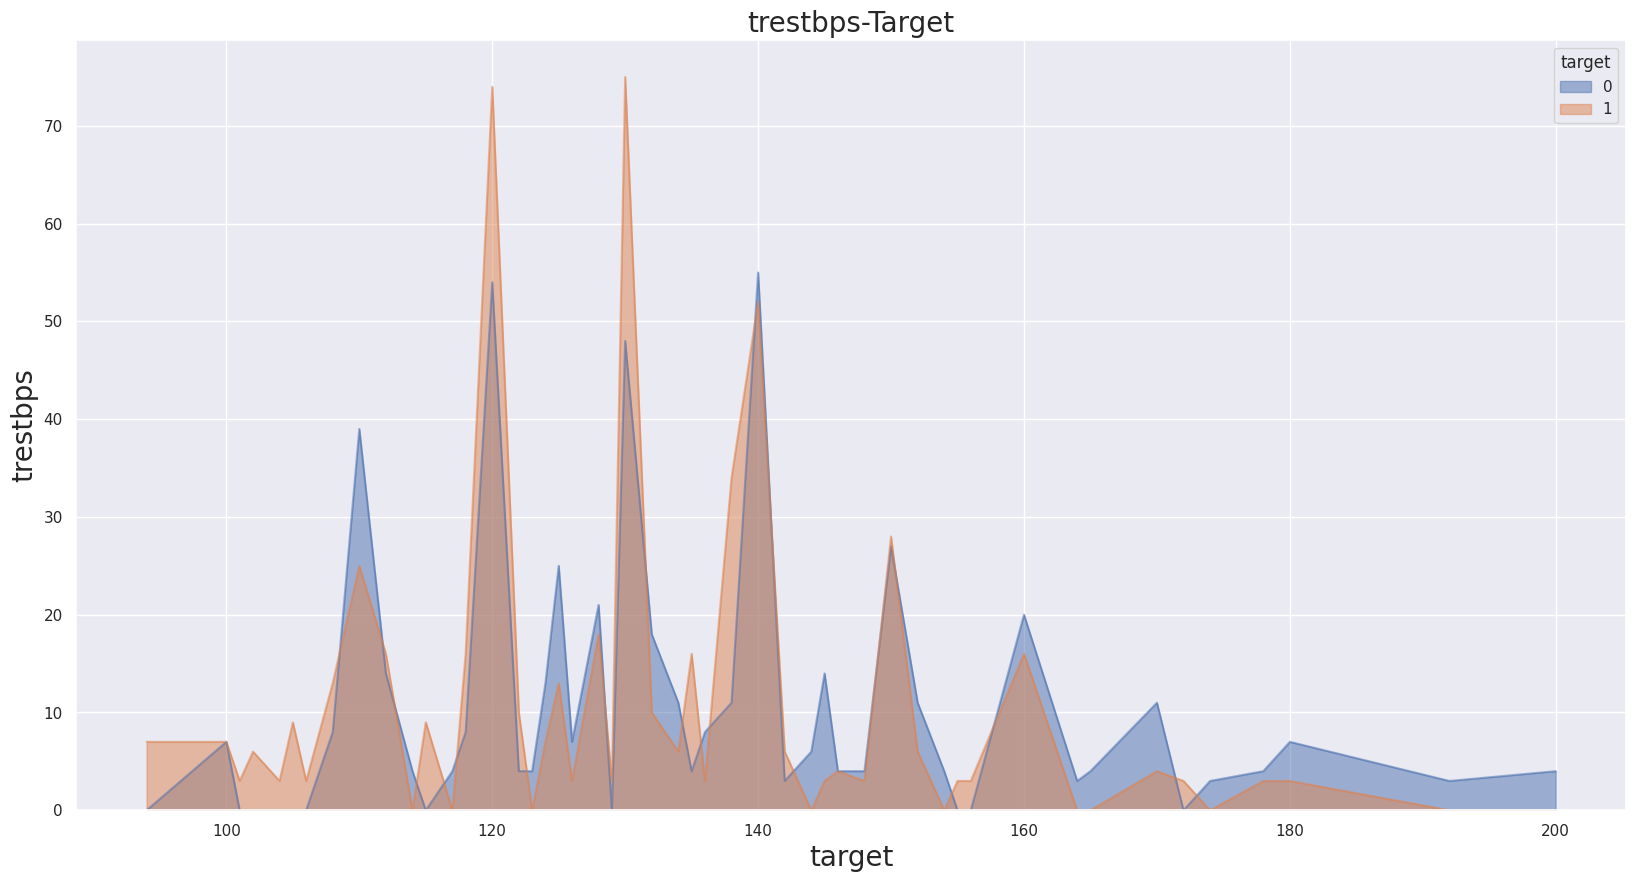

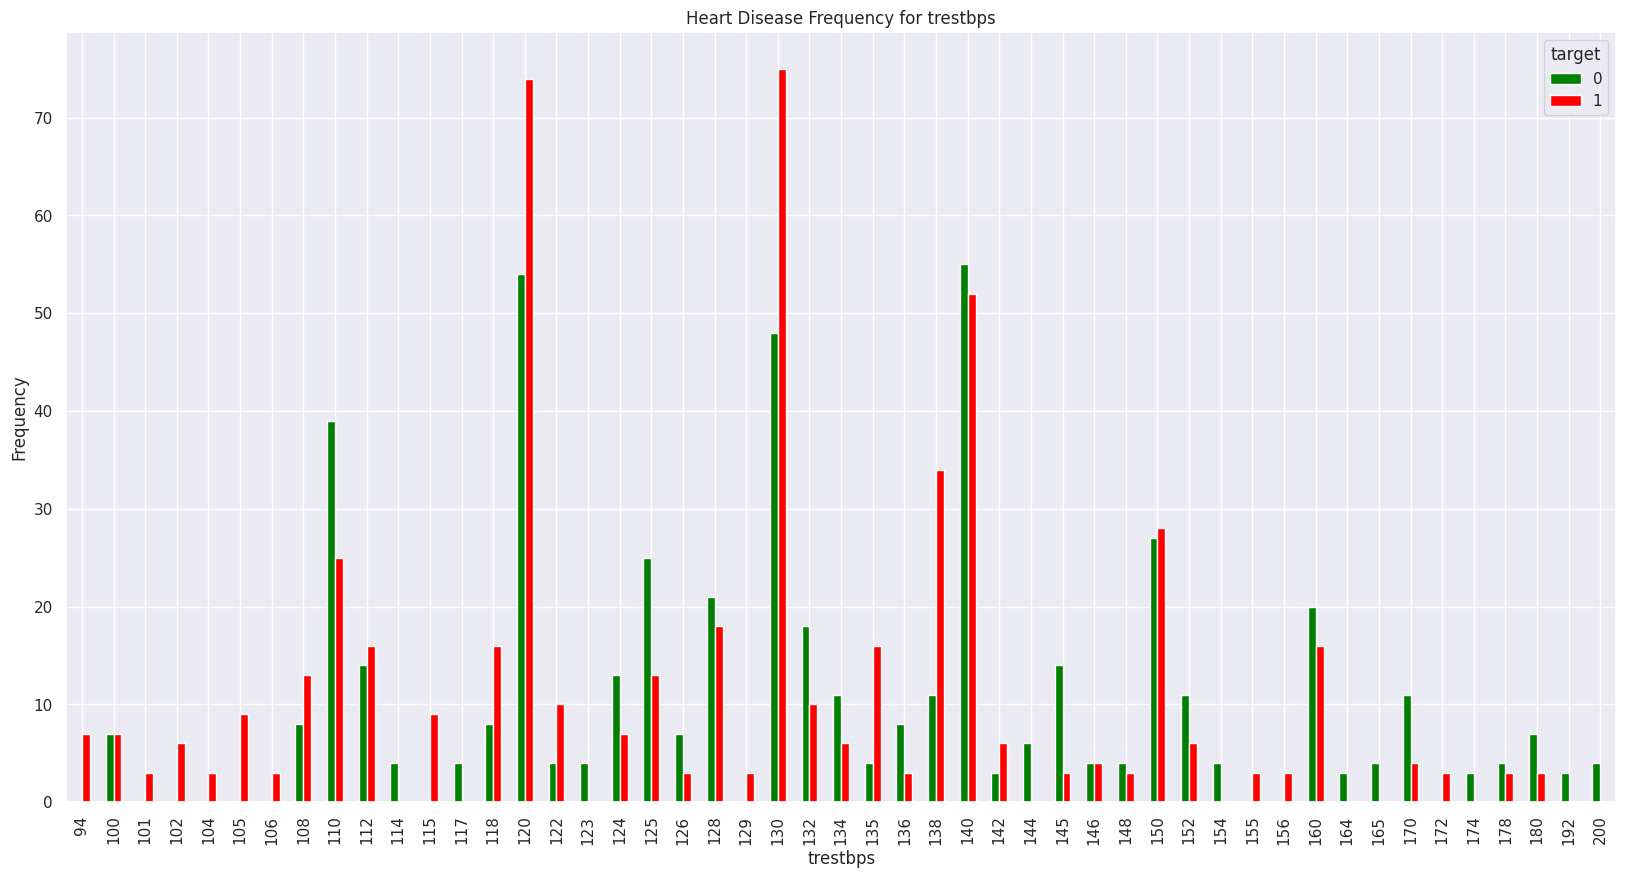



------------------------------------------------------------------------------------------------------  chol  ----------------------------------------------------------------------------------------------------


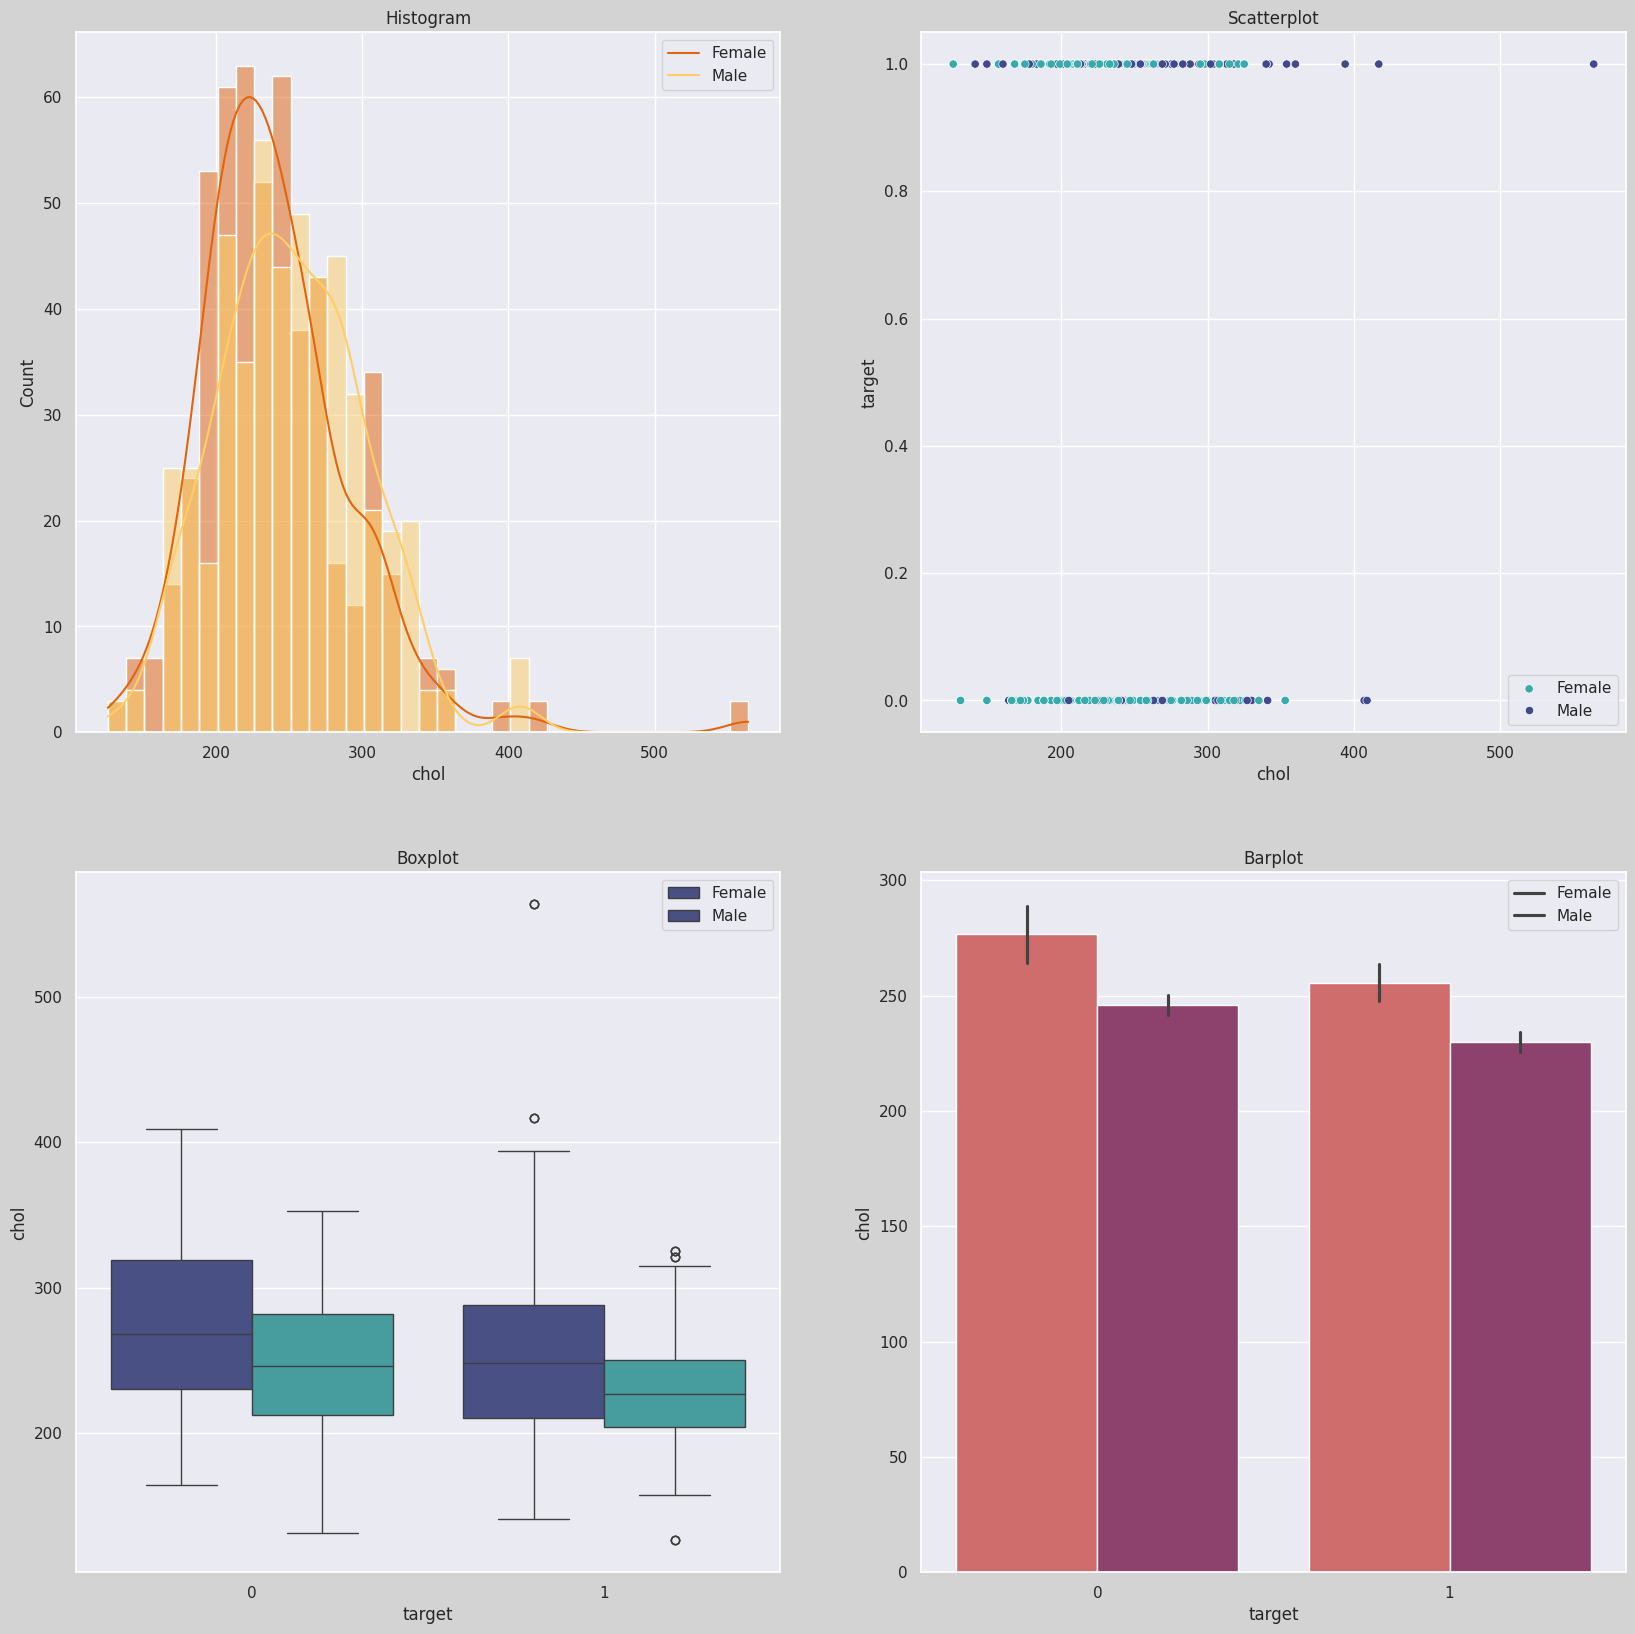

<Figure size 1500x1500 with 0 Axes>

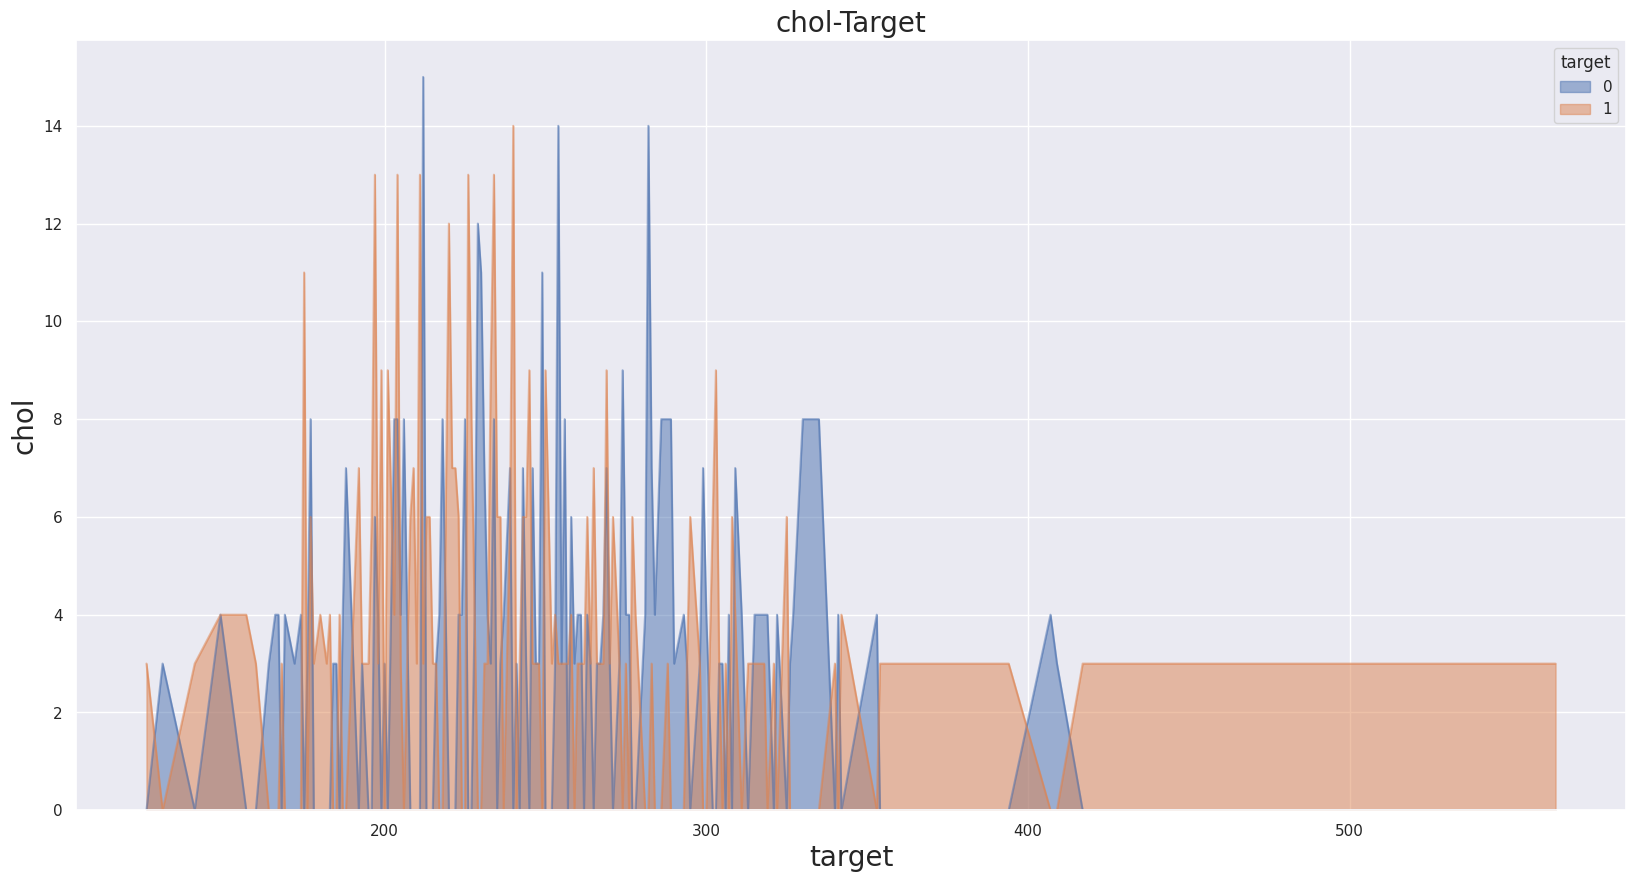

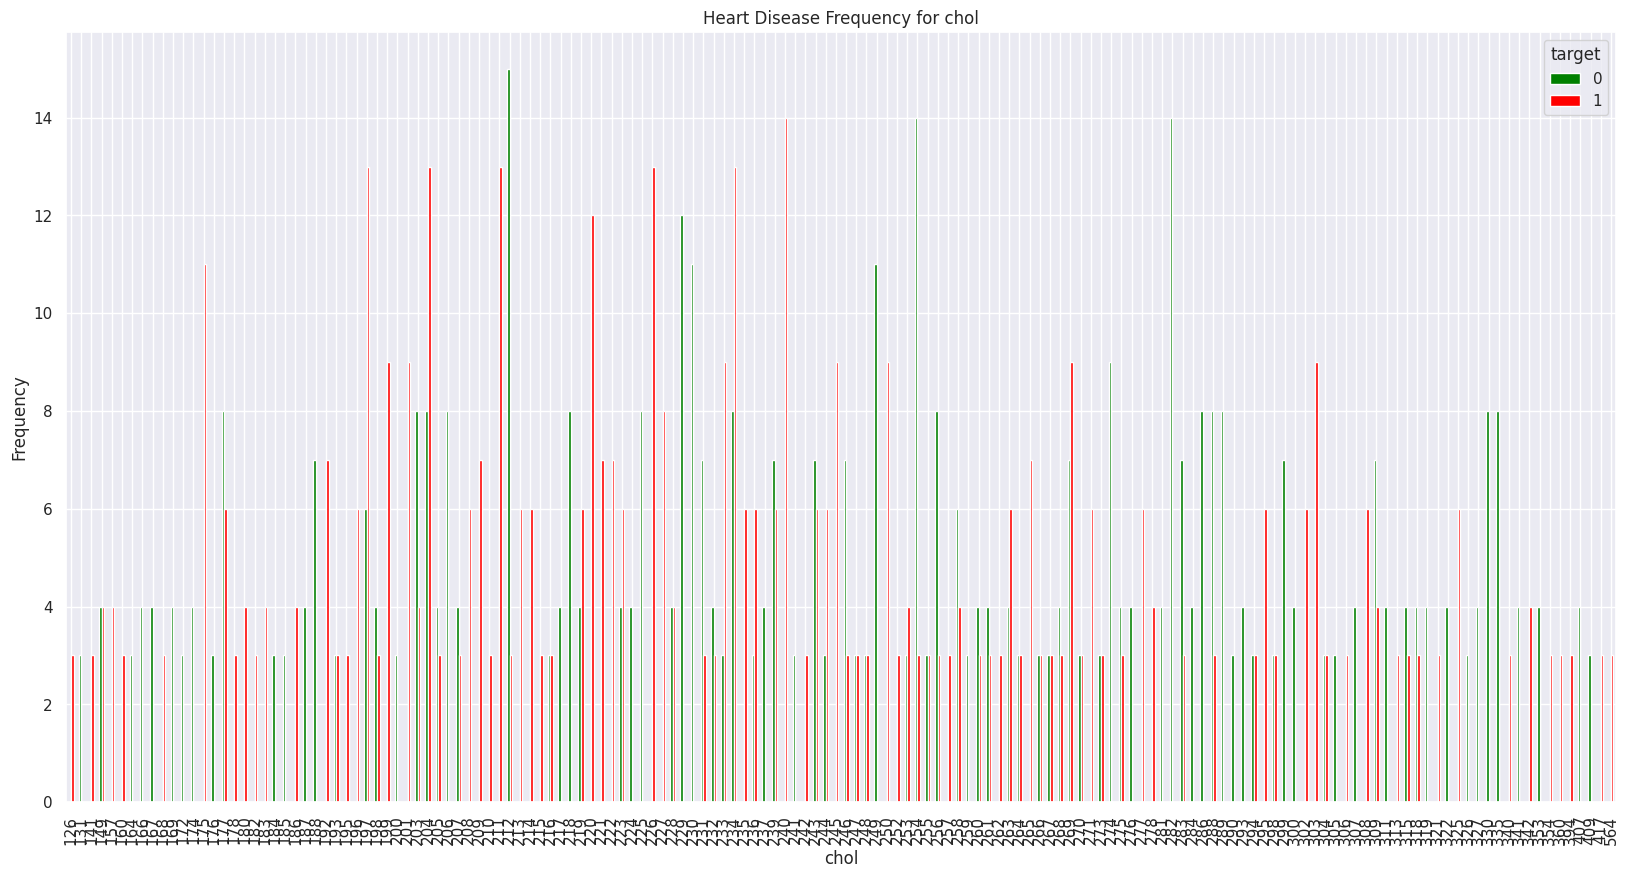



------------------------------------------------------------------------------------------------------  fbs  ----------------------------------------------------------------------------------------------------


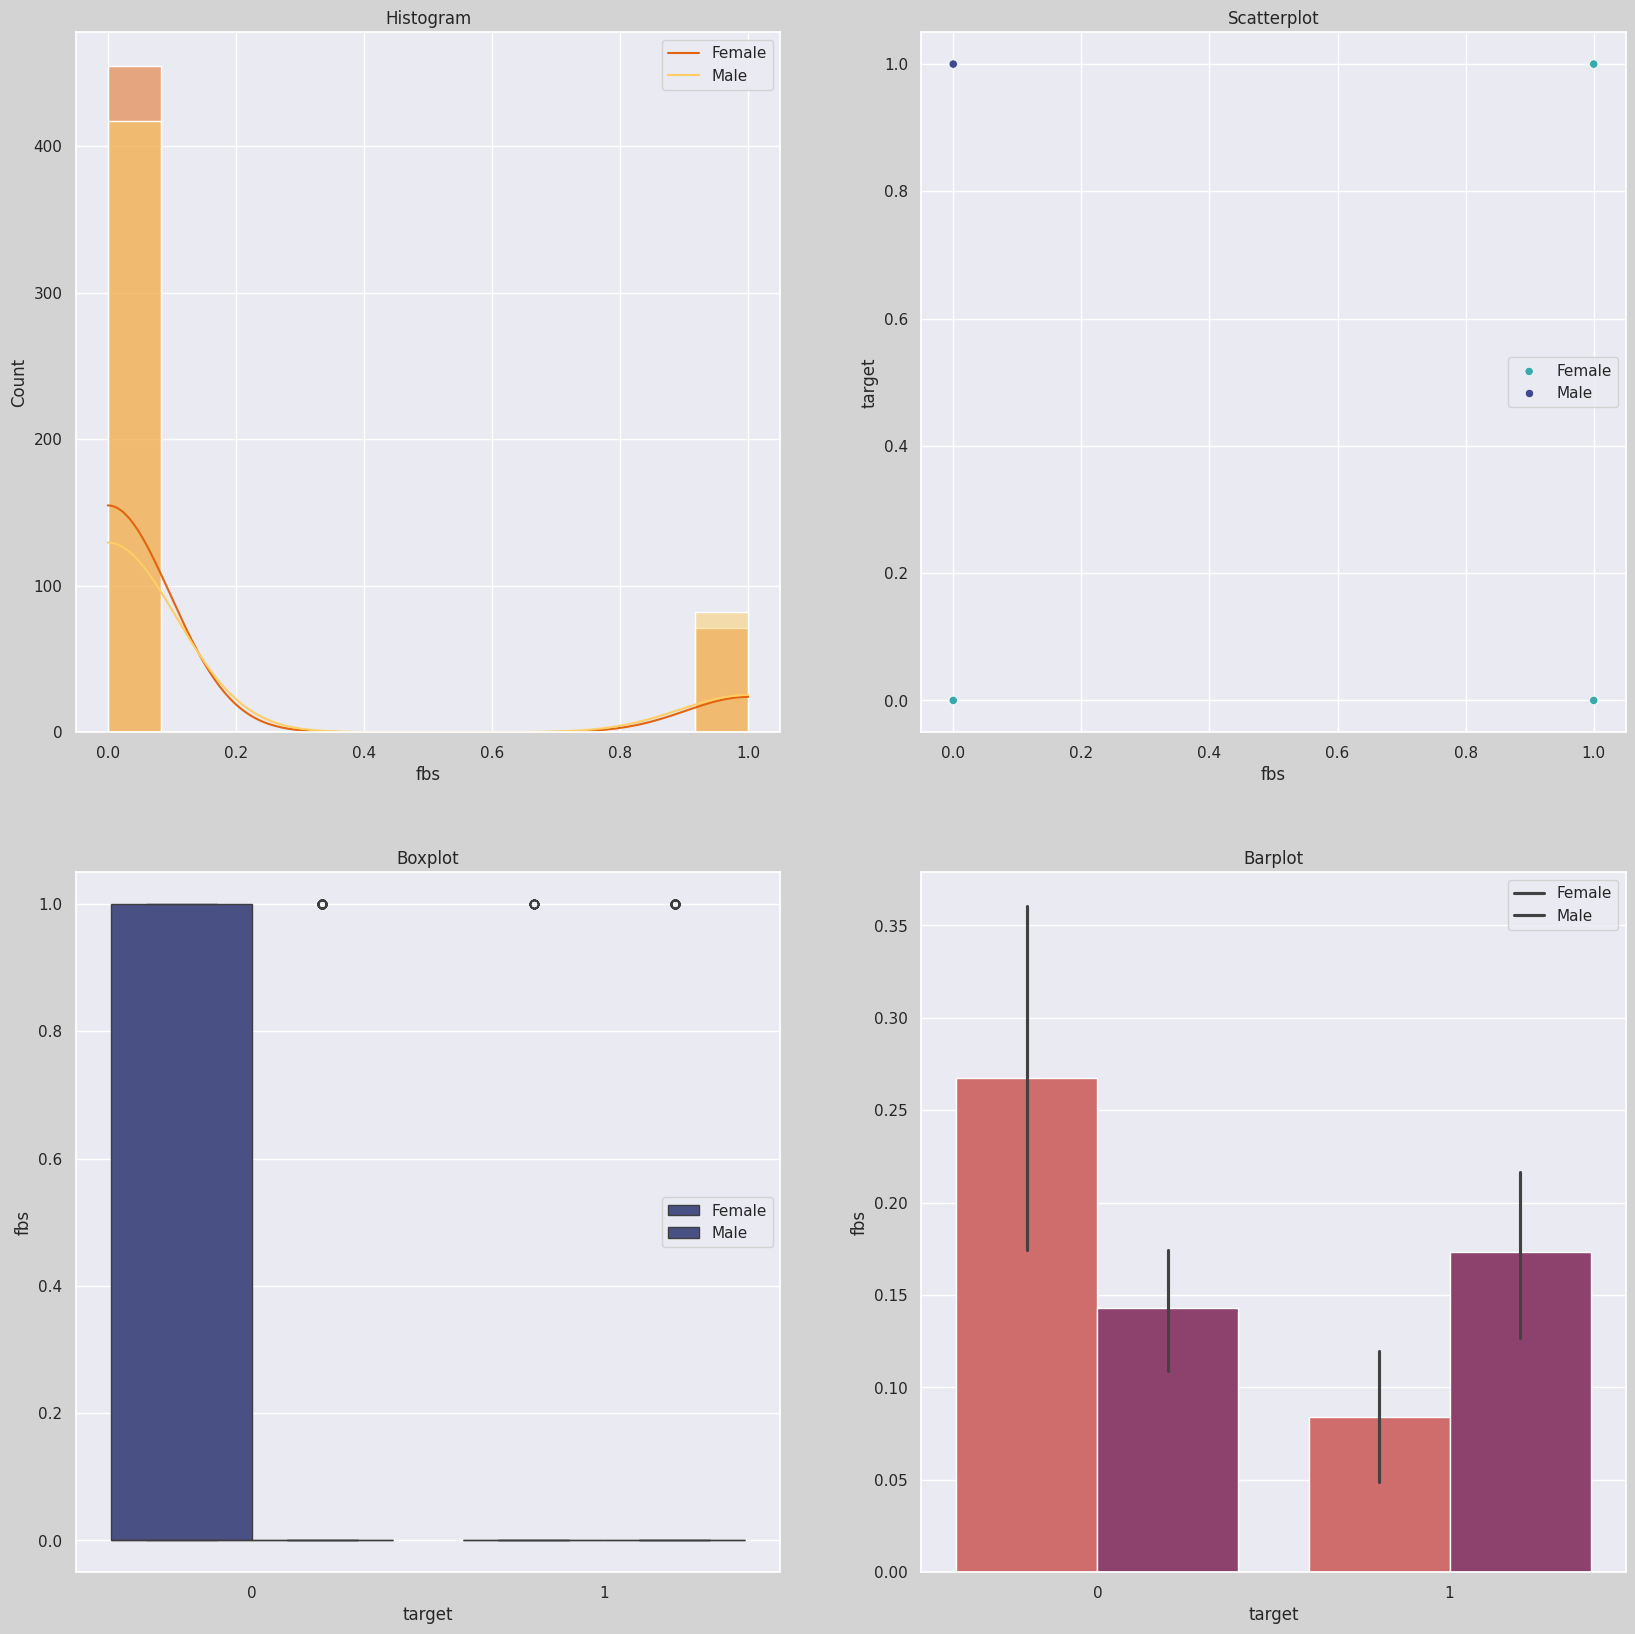

<Figure size 1500x1500 with 0 Axes>

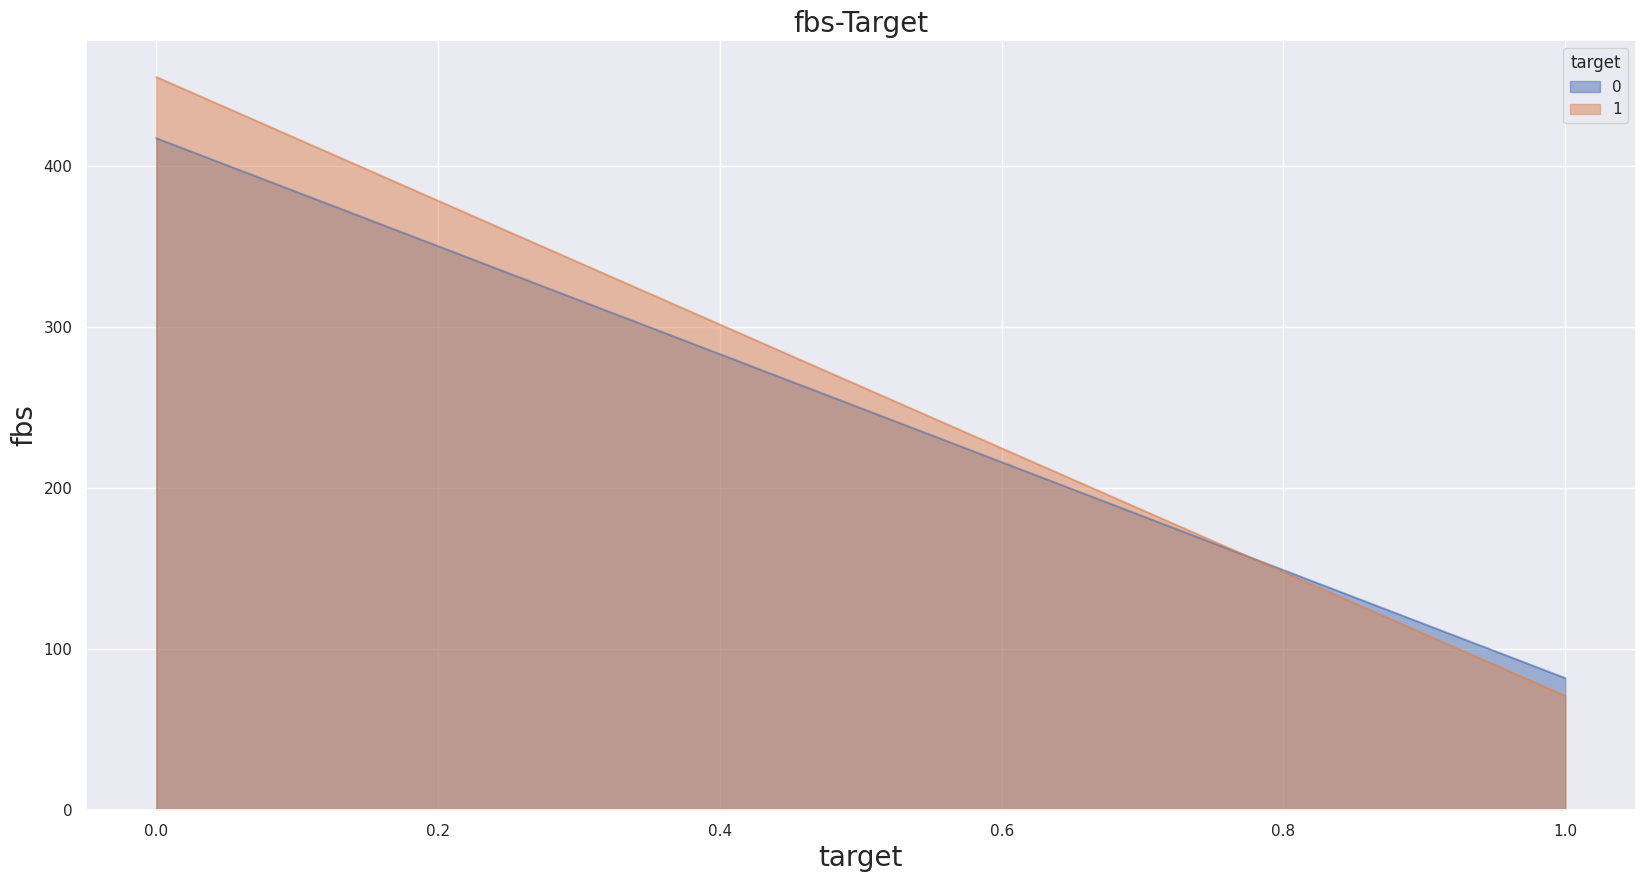

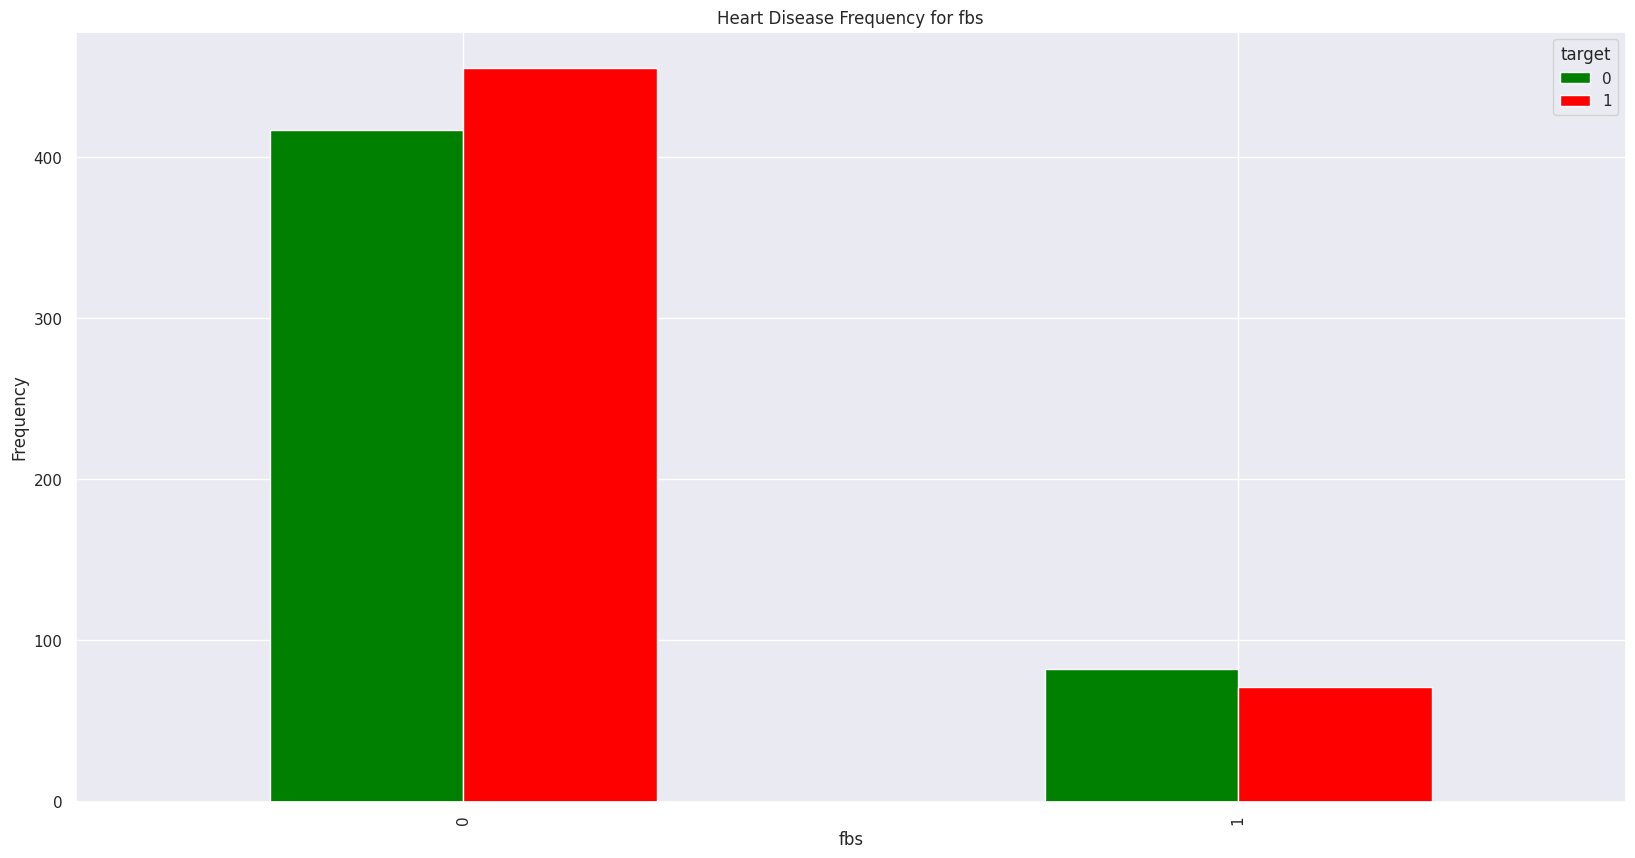



------------------------------------------------------------------------------------------------------  restecg  ----------------------------------------------------------------------------------------------------


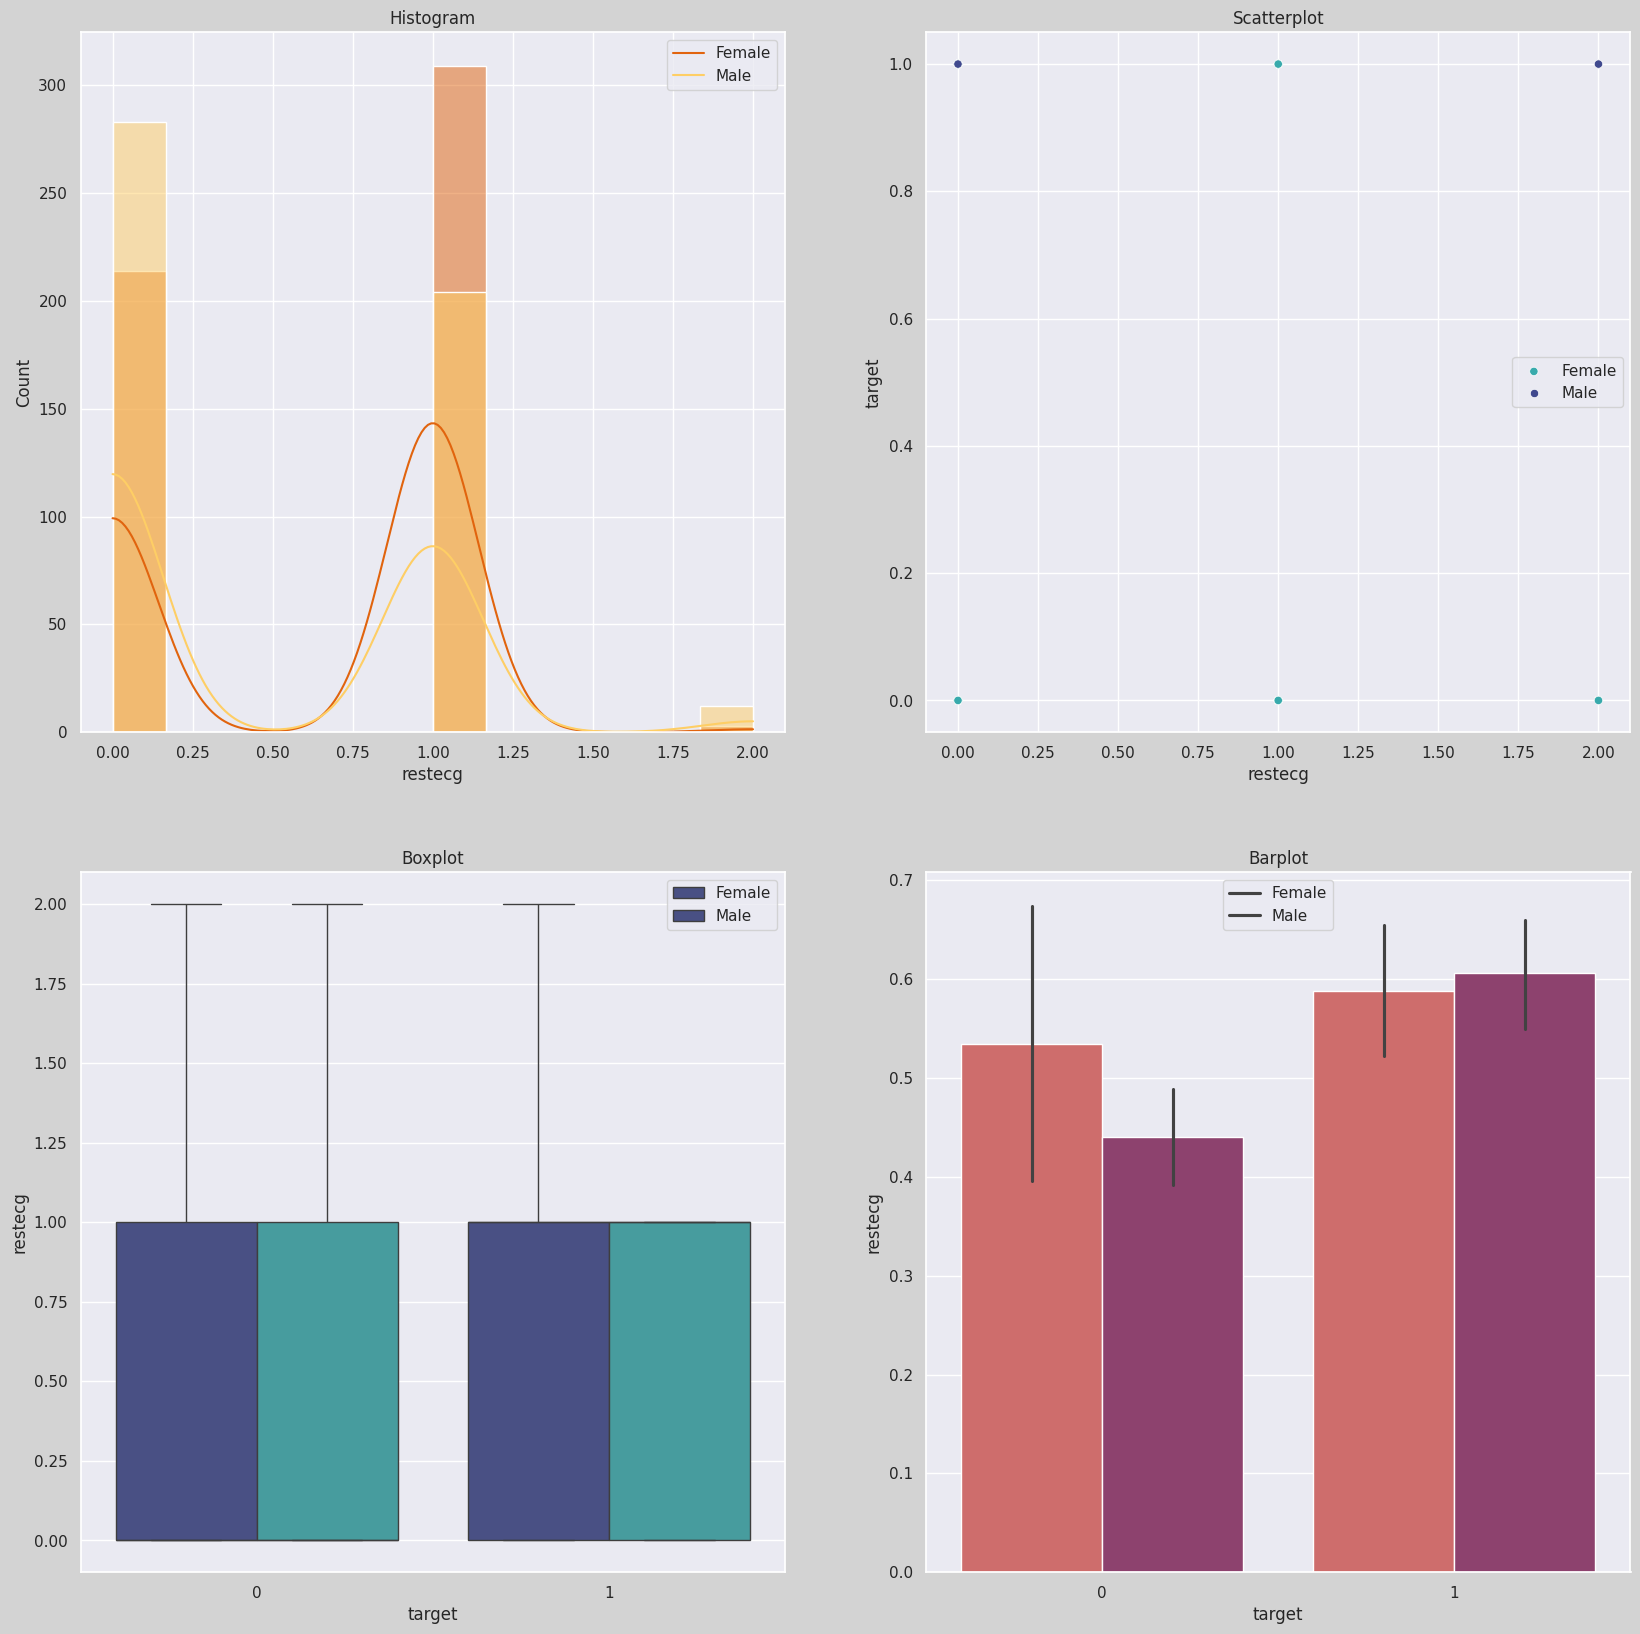

<Figure size 1500x1500 with 0 Axes>

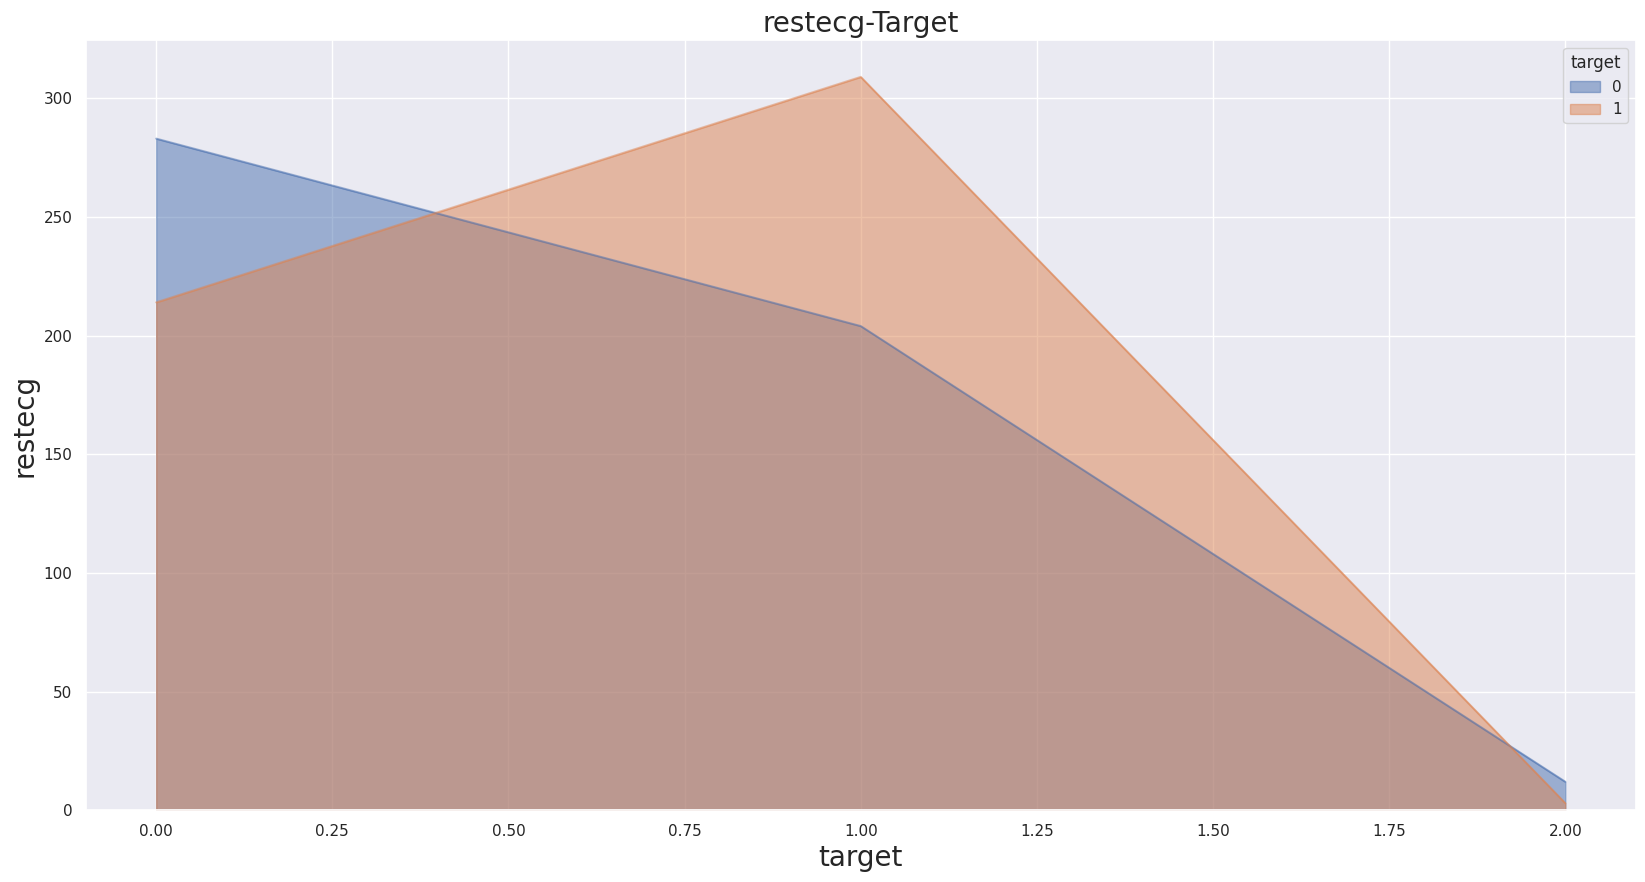

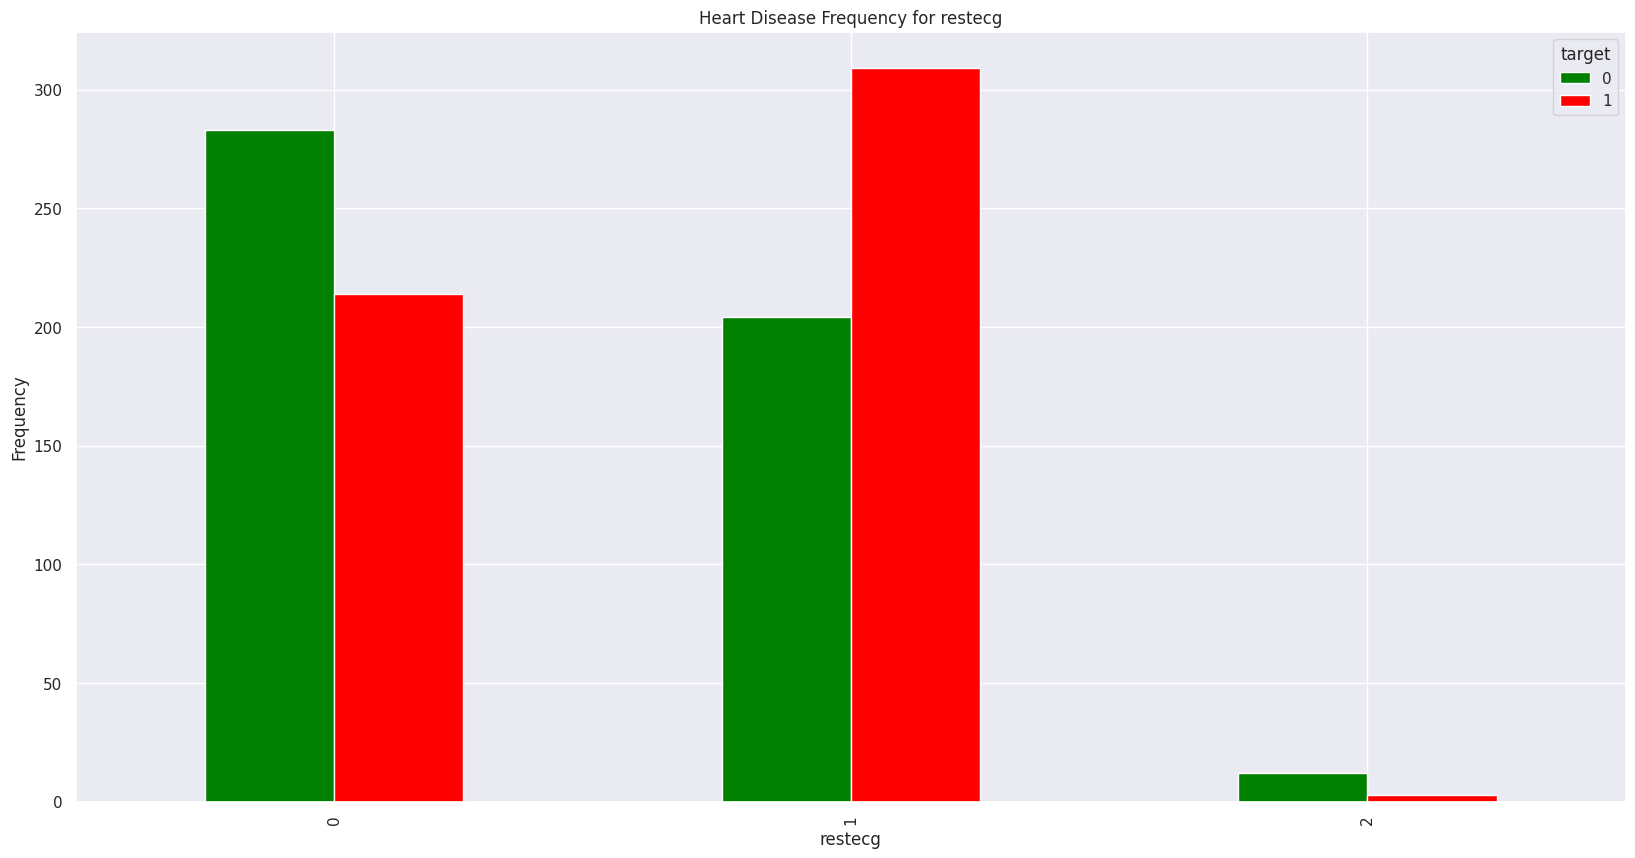



------------------------------------------------------------------------------------------------------  thalach  ----------------------------------------------------------------------------------------------------


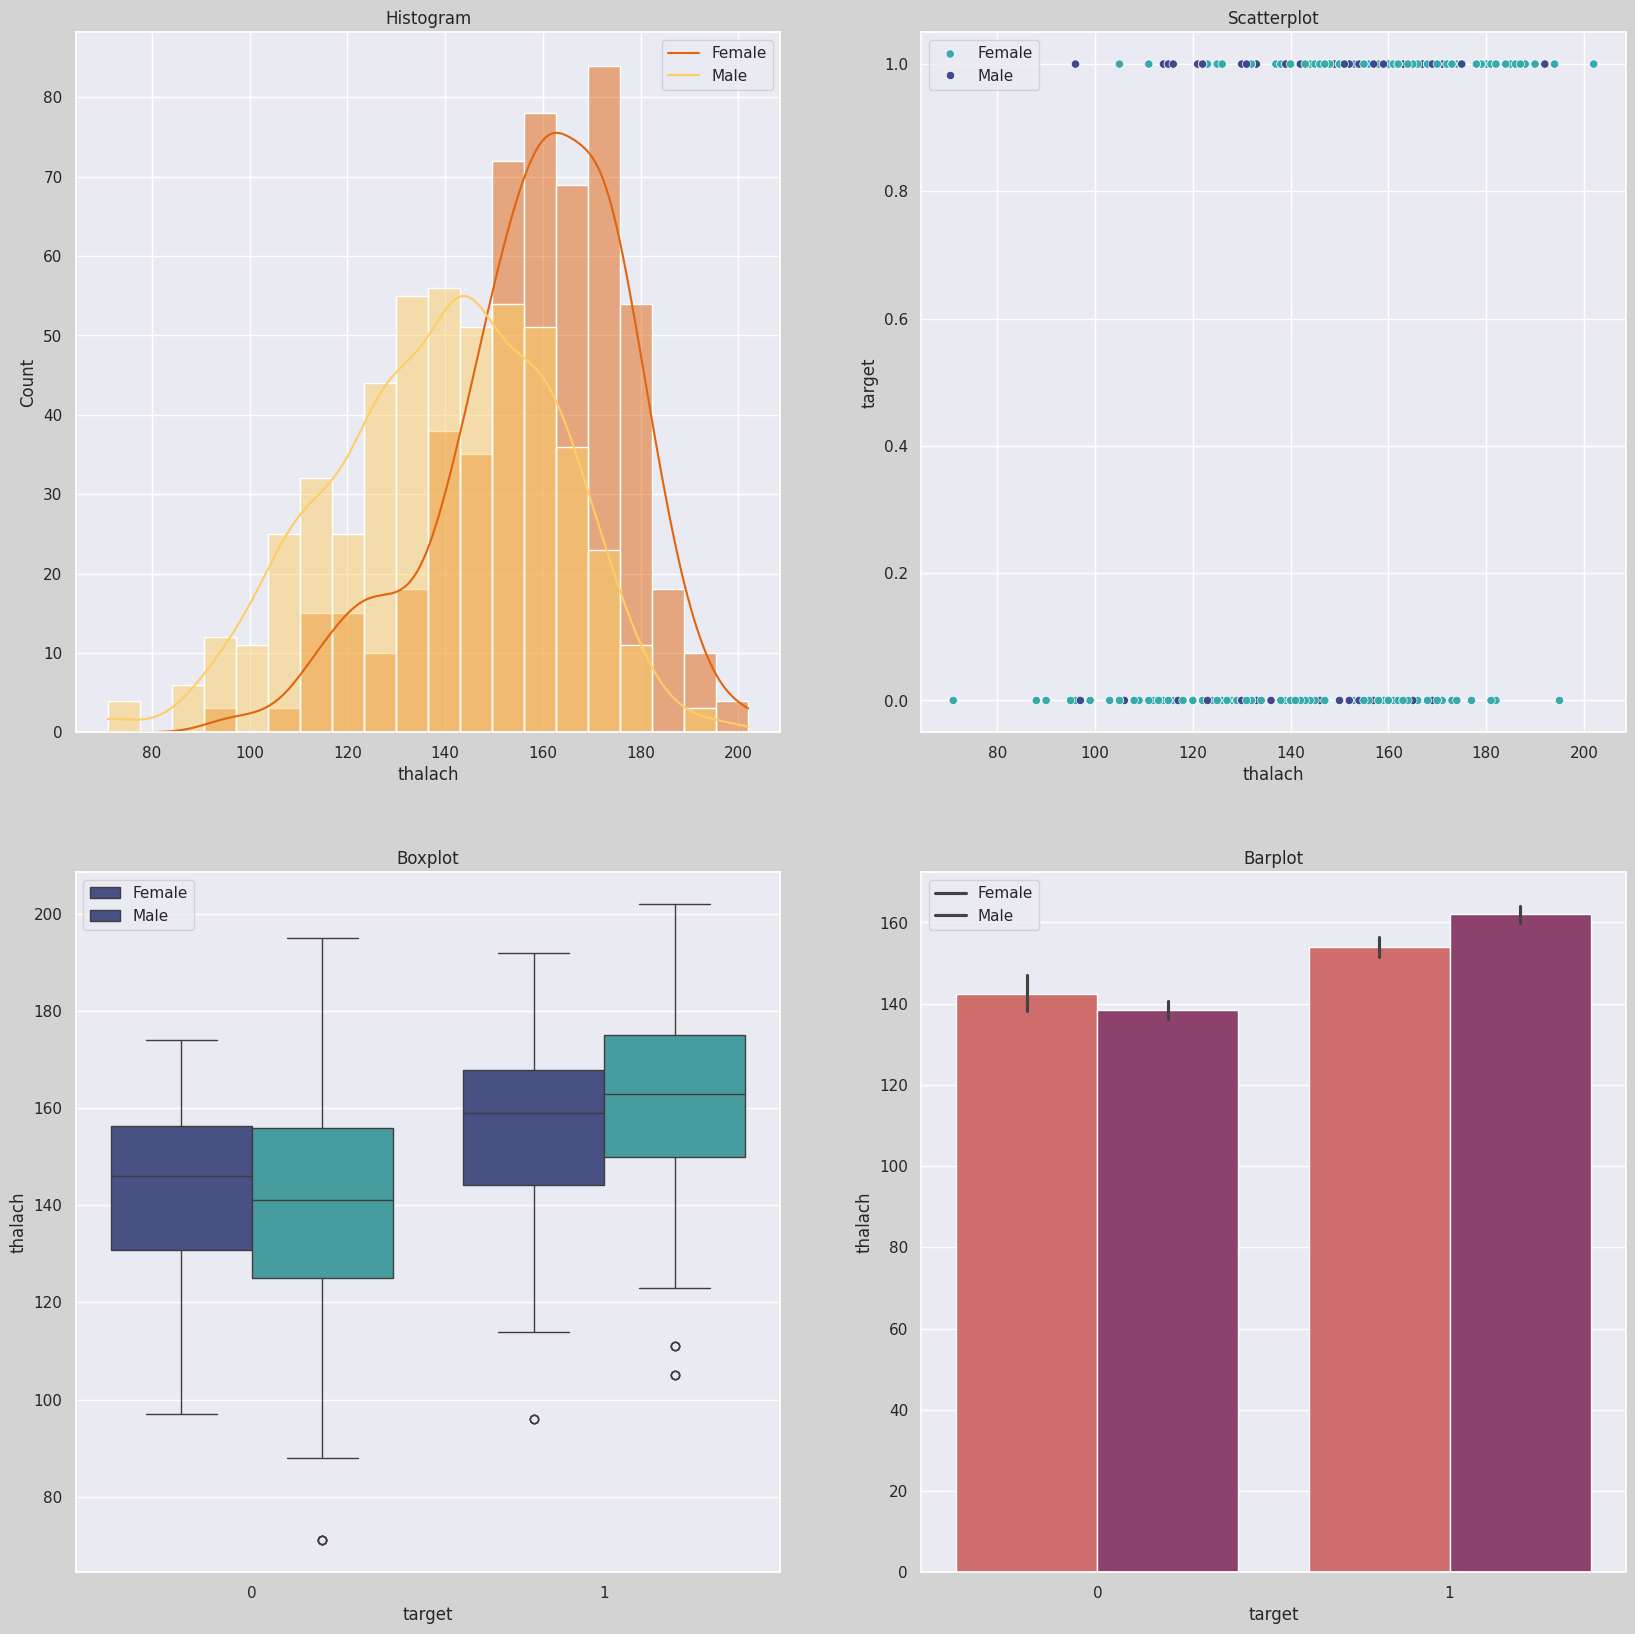

<Figure size 1500x1500 with 0 Axes>

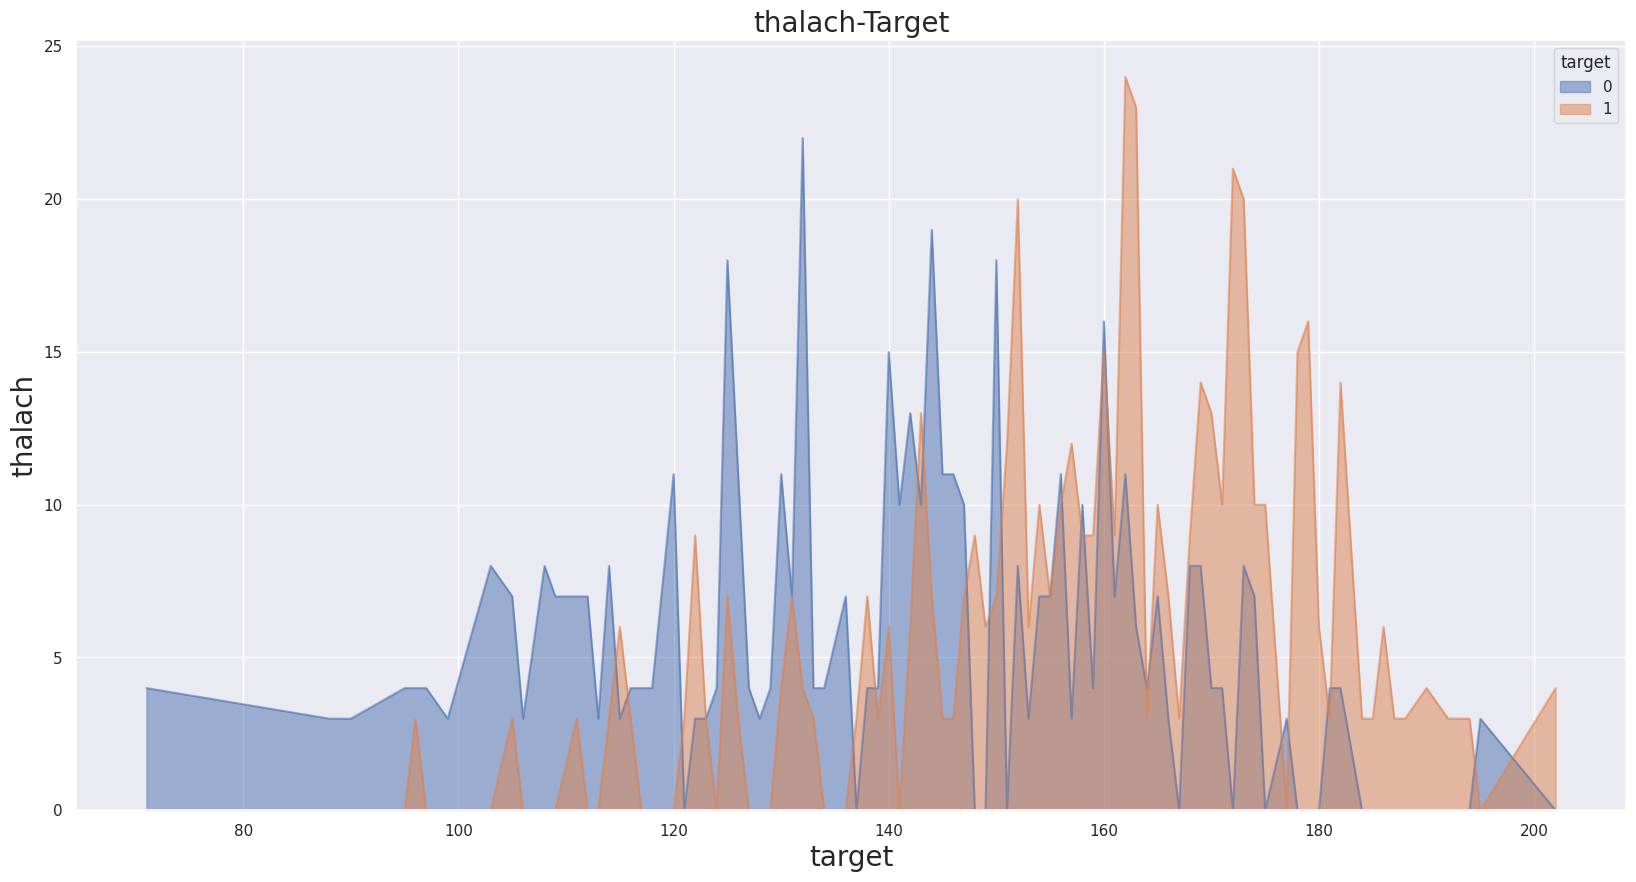

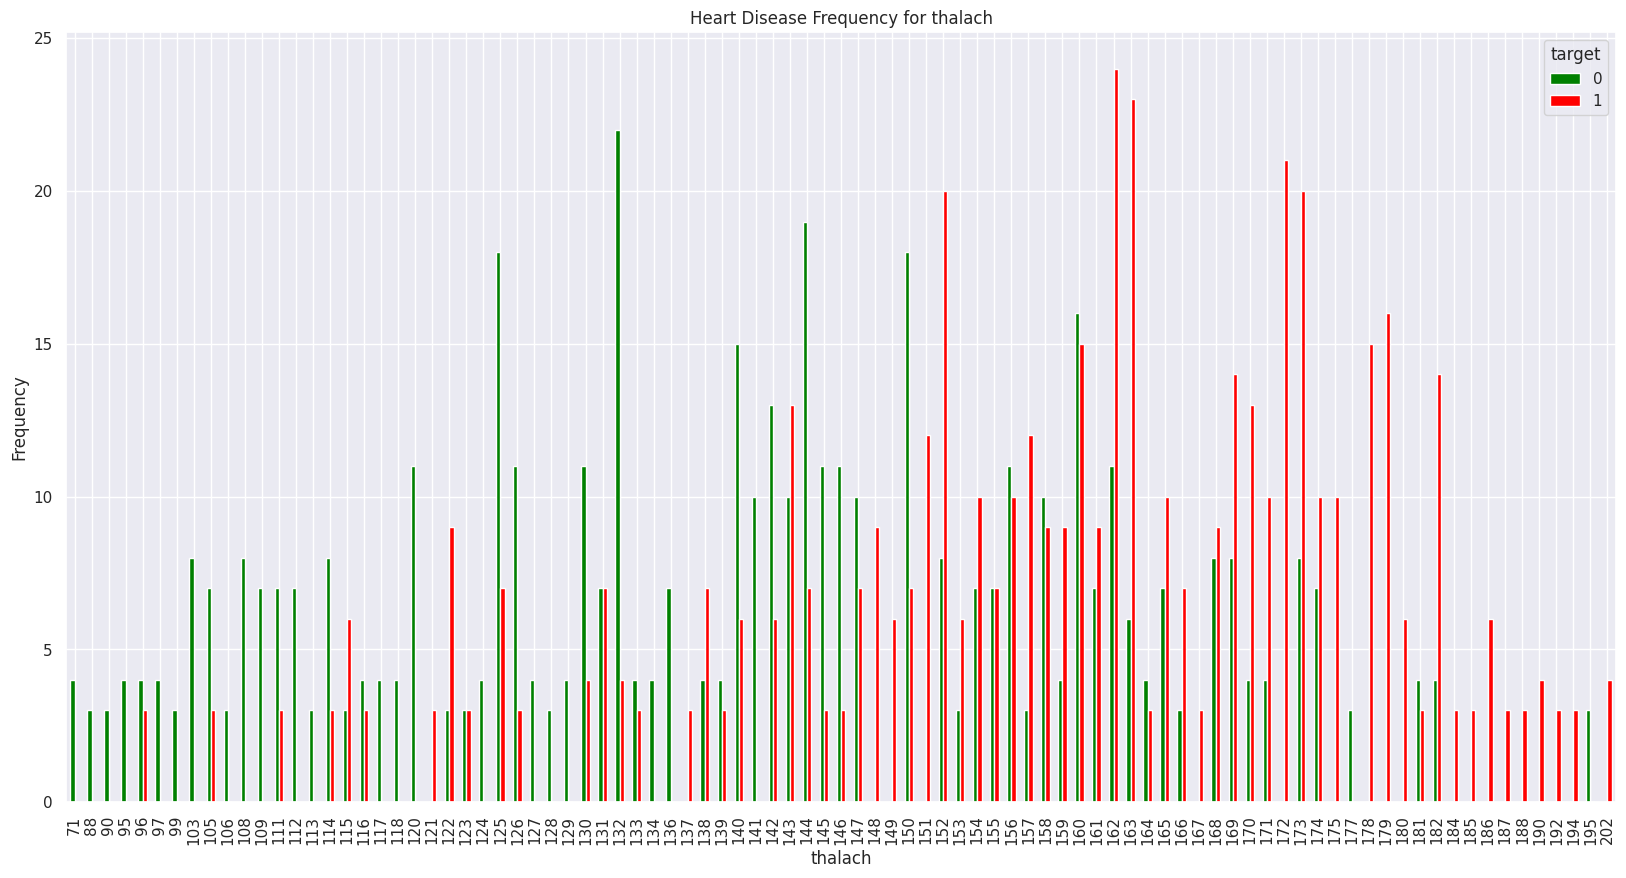



------------------------------------------------------------------------------------------------------  exang  ----------------------------------------------------------------------------------------------------


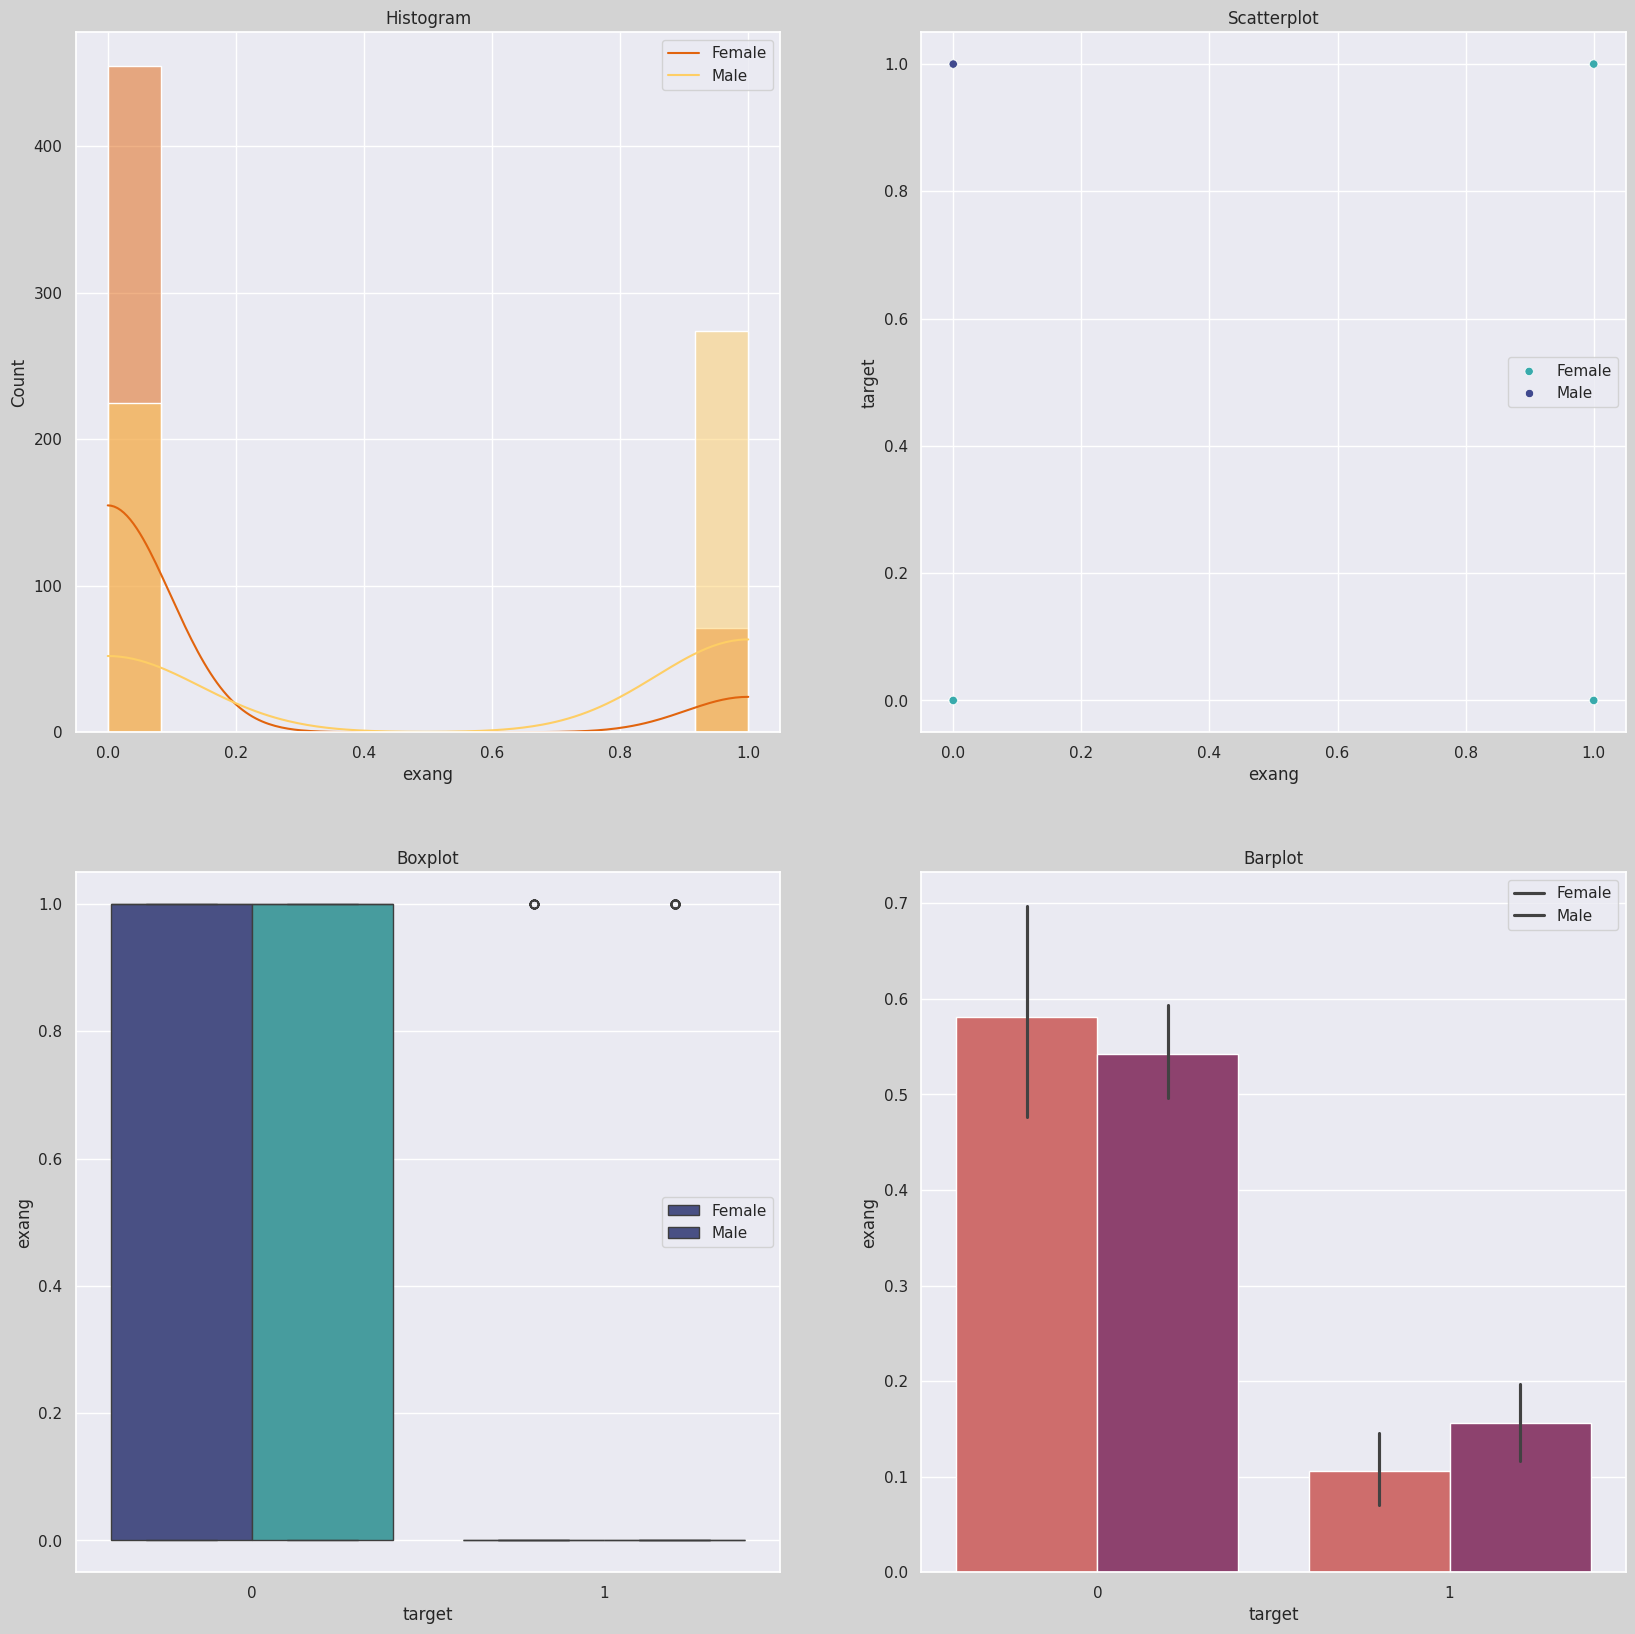

<Figure size 1500x1500 with 0 Axes>

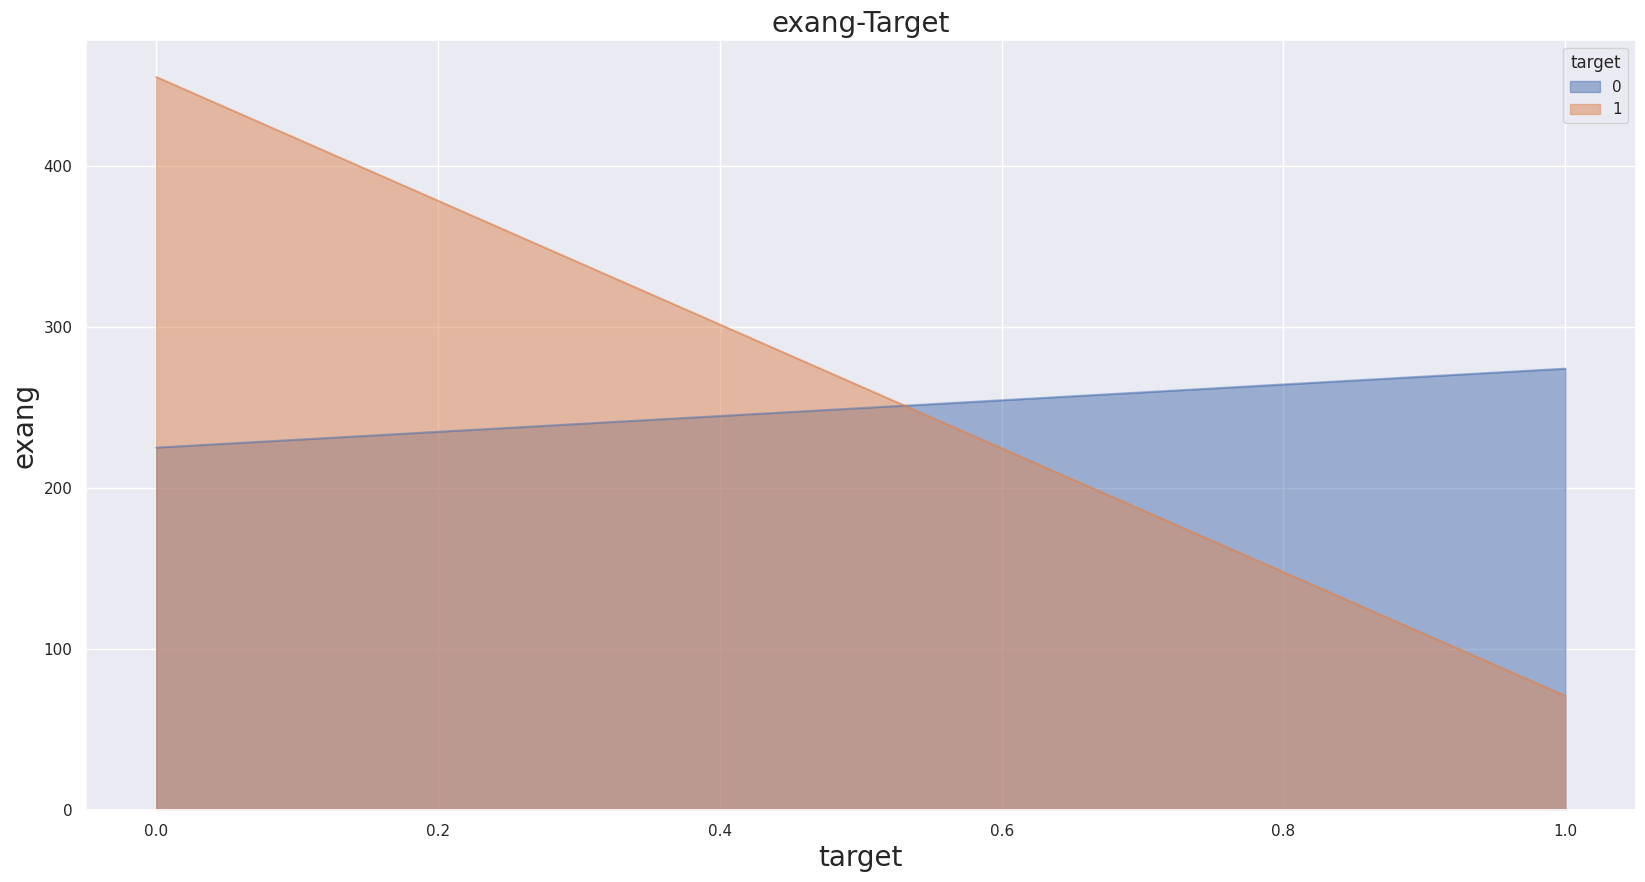

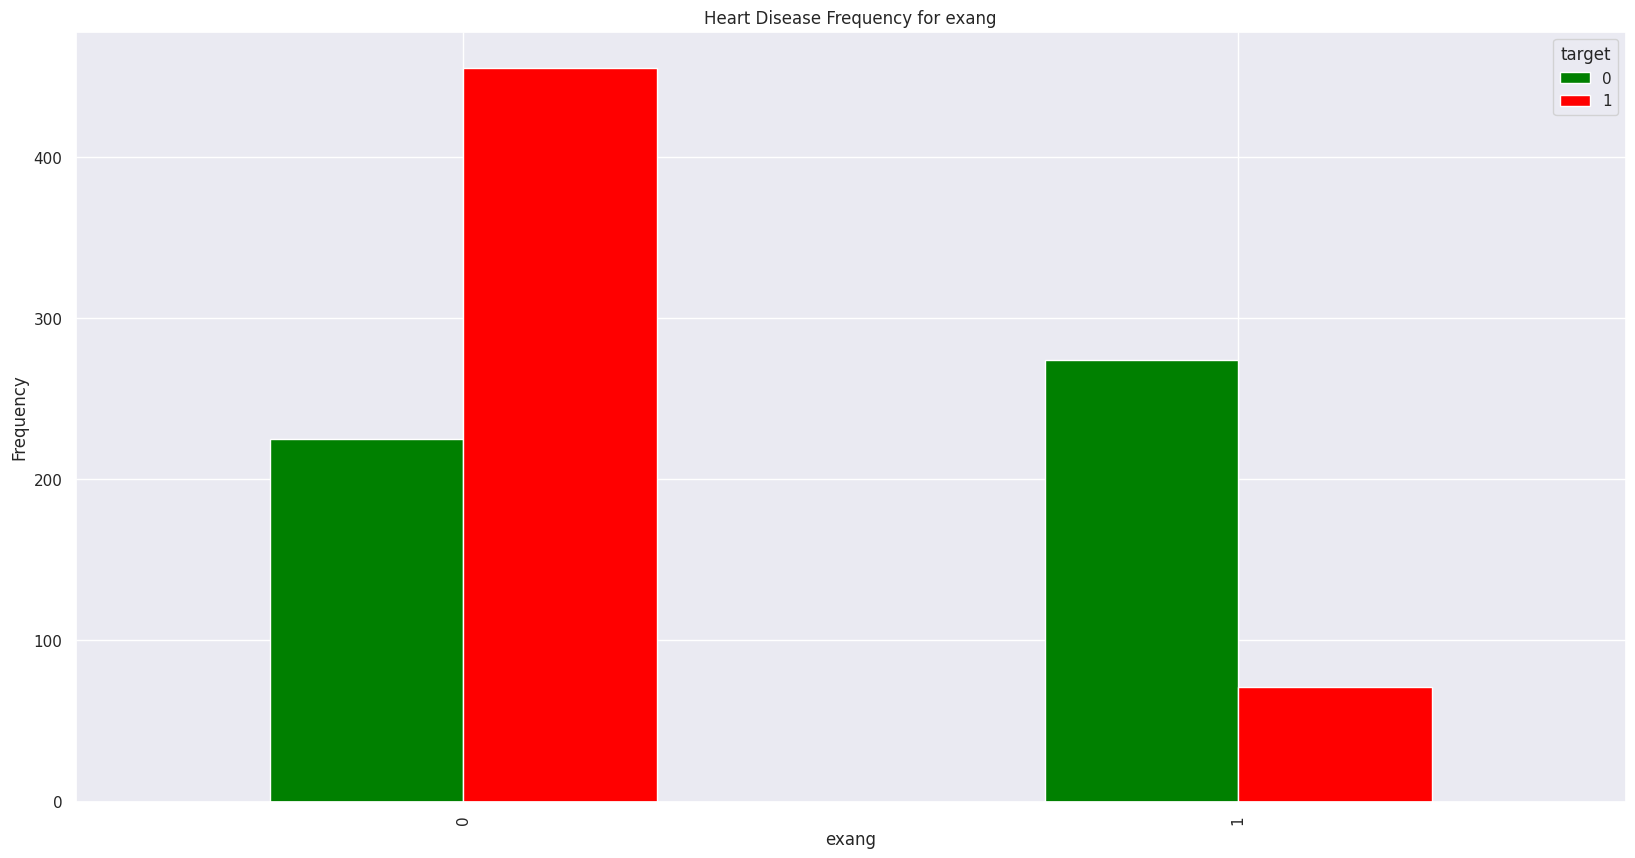



------------------------------------------------------------------------------------------------------  oldpeak  ----------------------------------------------------------------------------------------------------


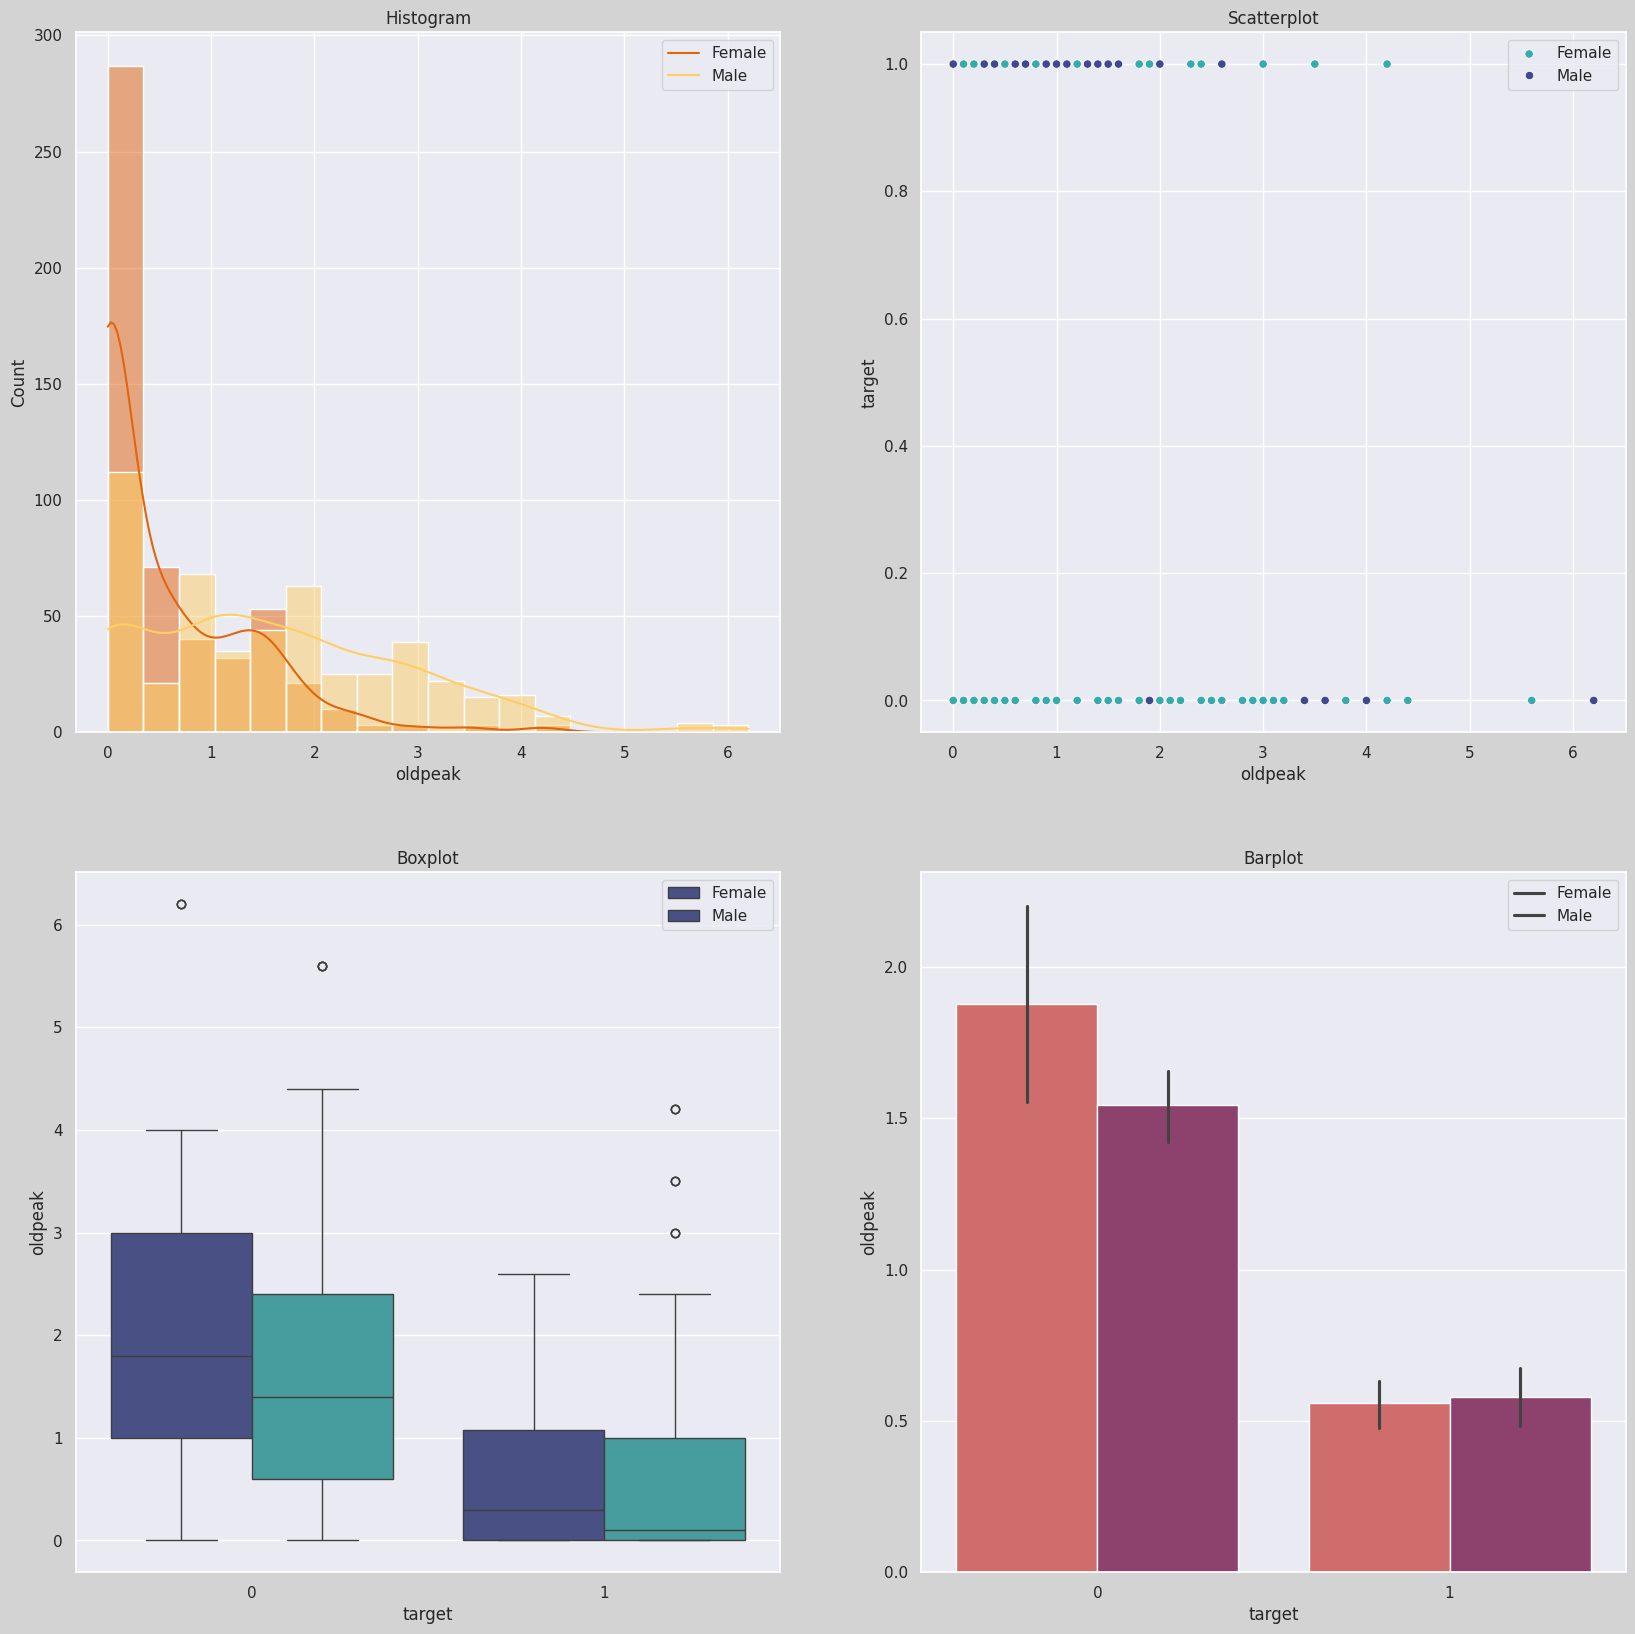

<Figure size 1500x1500 with 0 Axes>

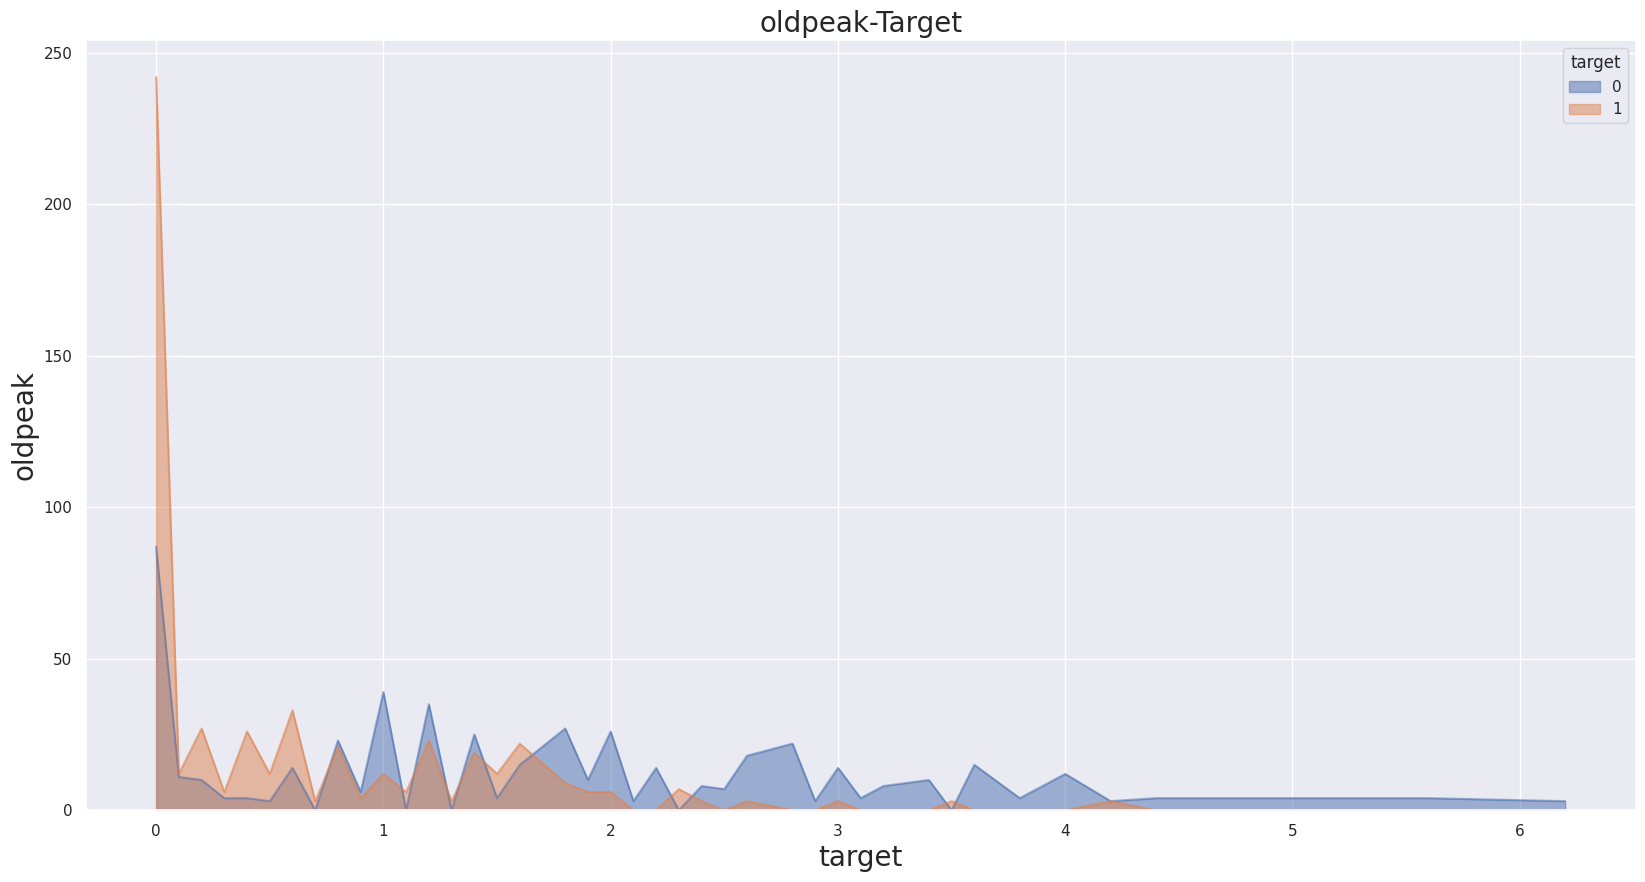

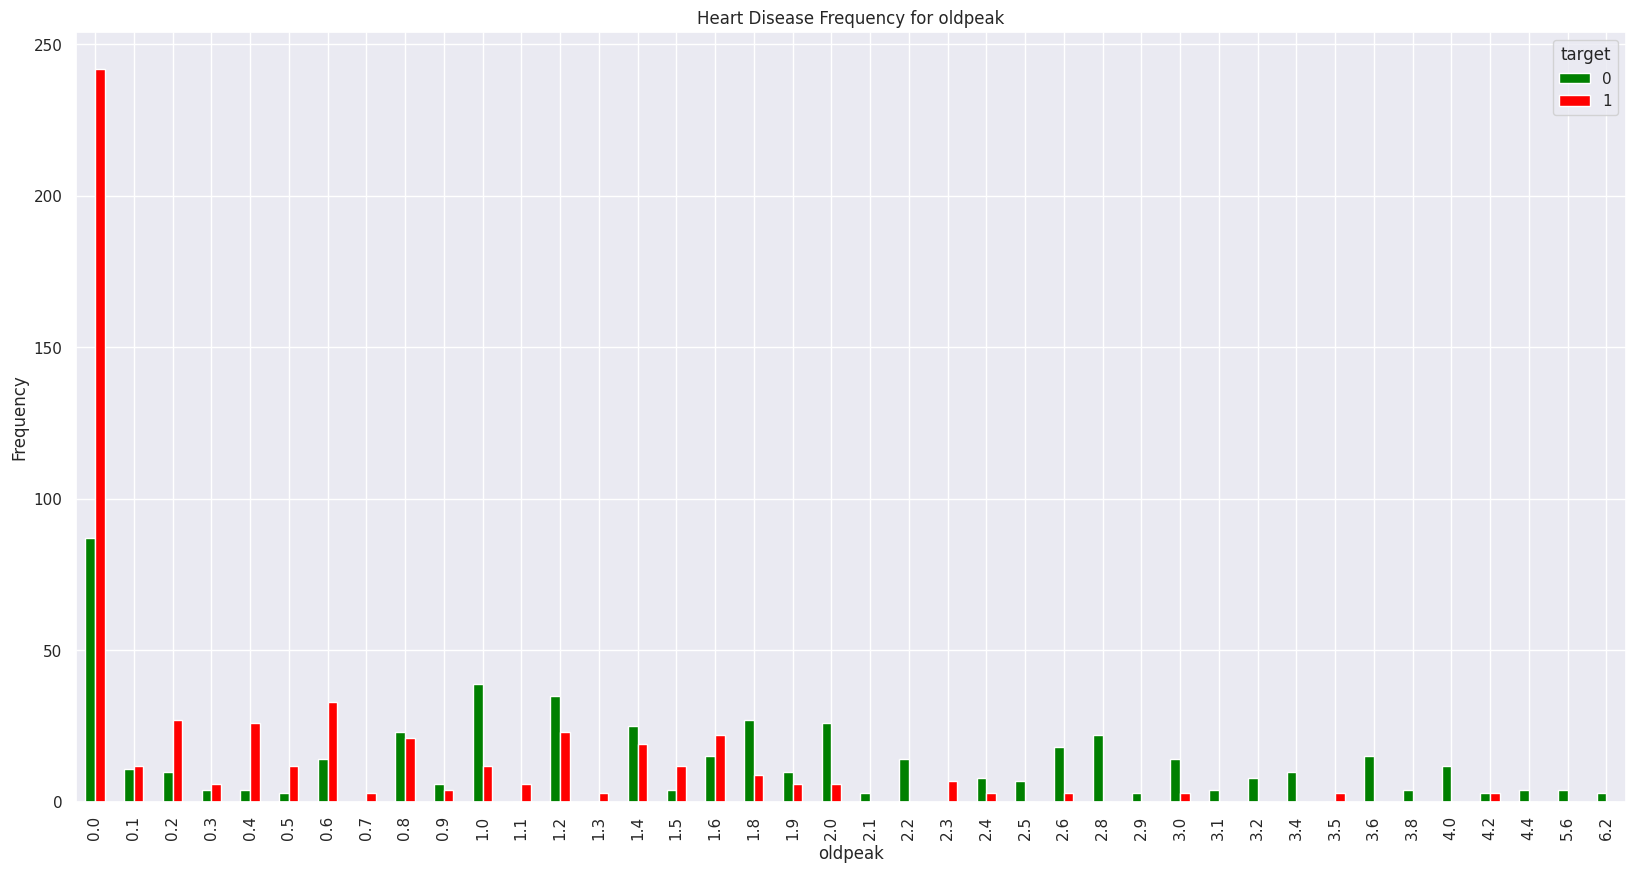



------------------------------------------------------------------------------------------------------  slope  ----------------------------------------------------------------------------------------------------


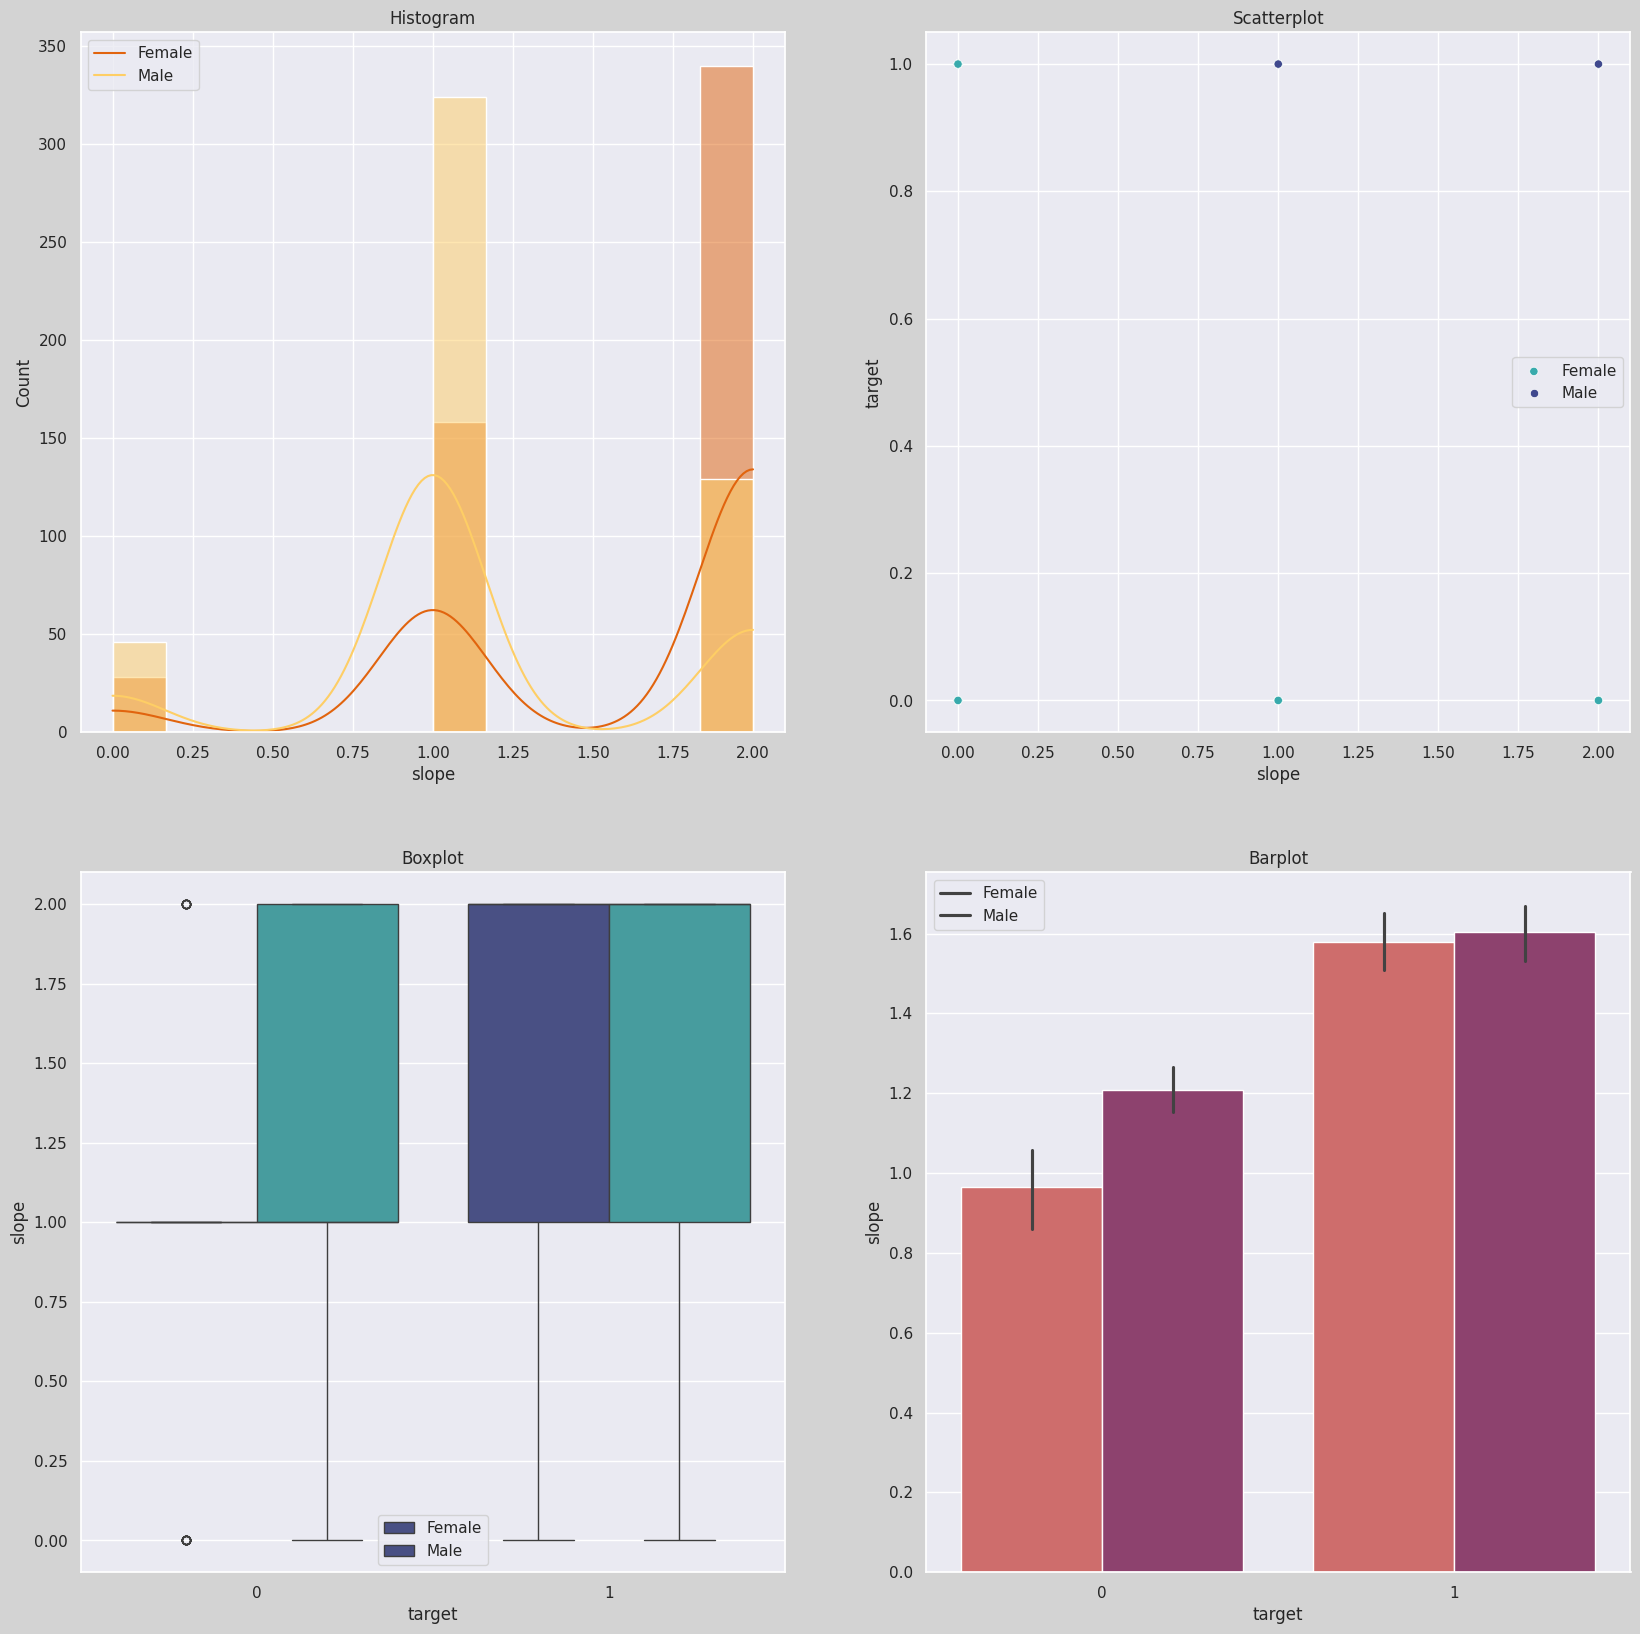

<Figure size 1500x1500 with 0 Axes>

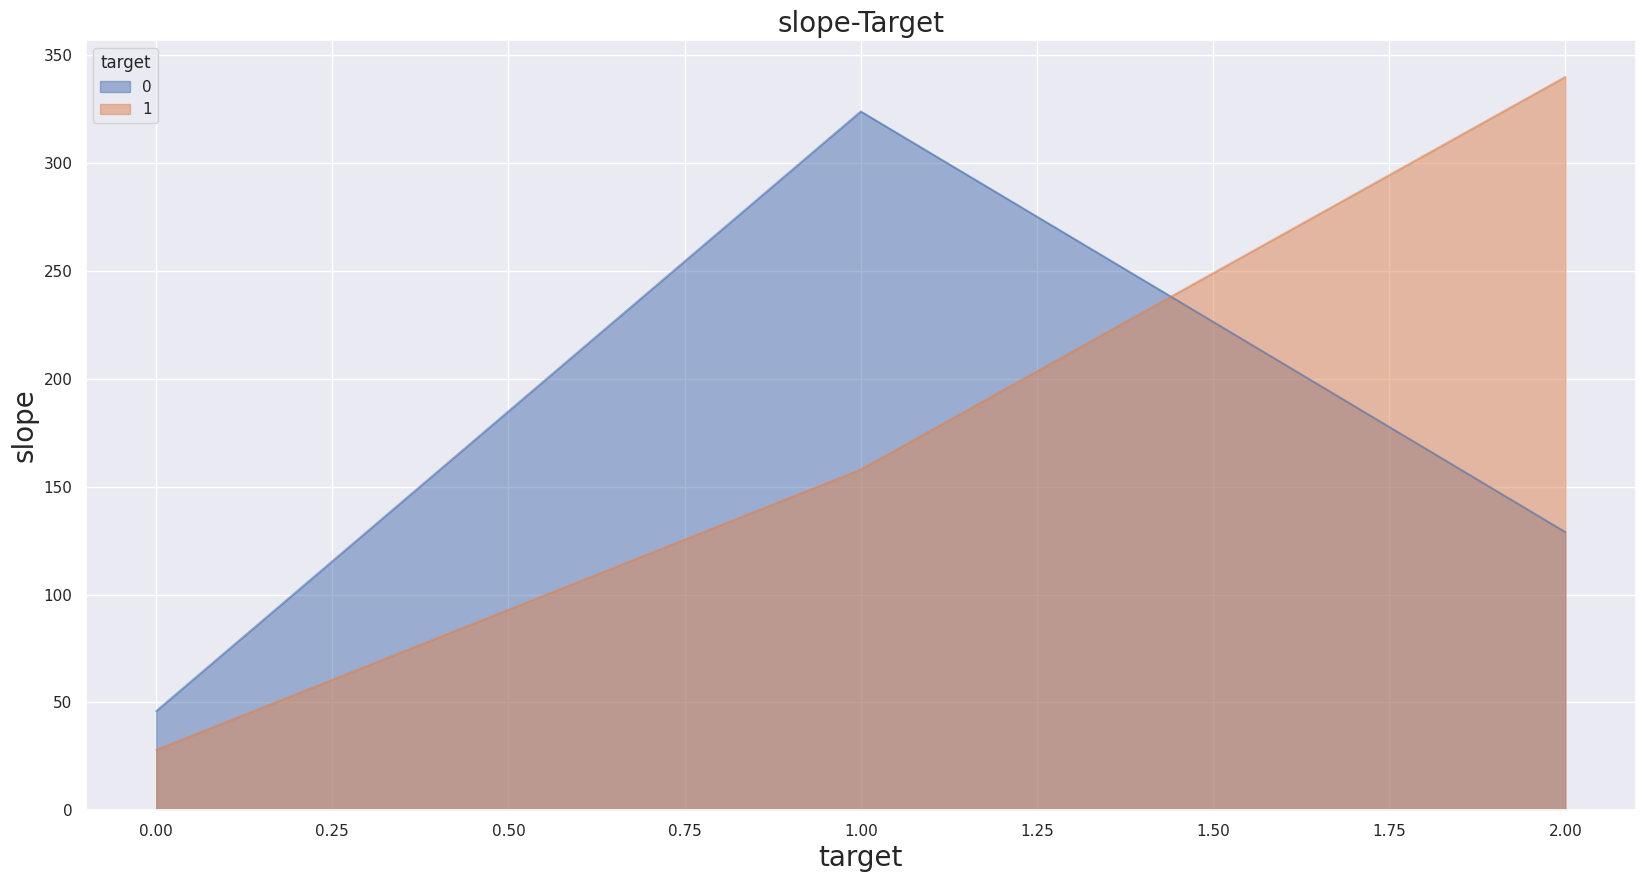

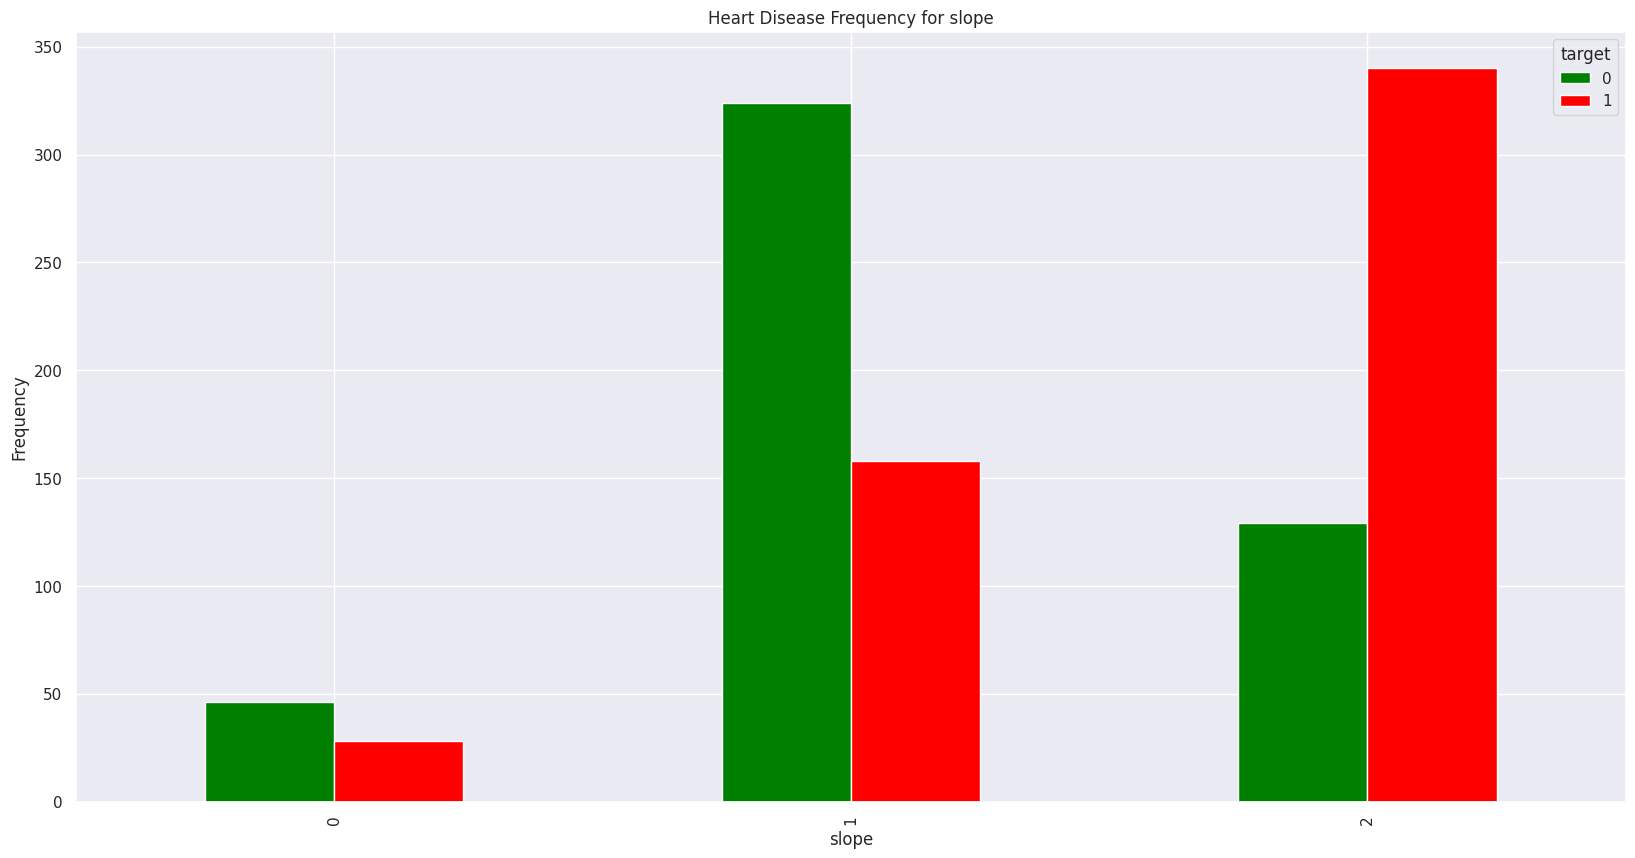



------------------------------------------------------------------------------------------------------  ca  ----------------------------------------------------------------------------------------------------


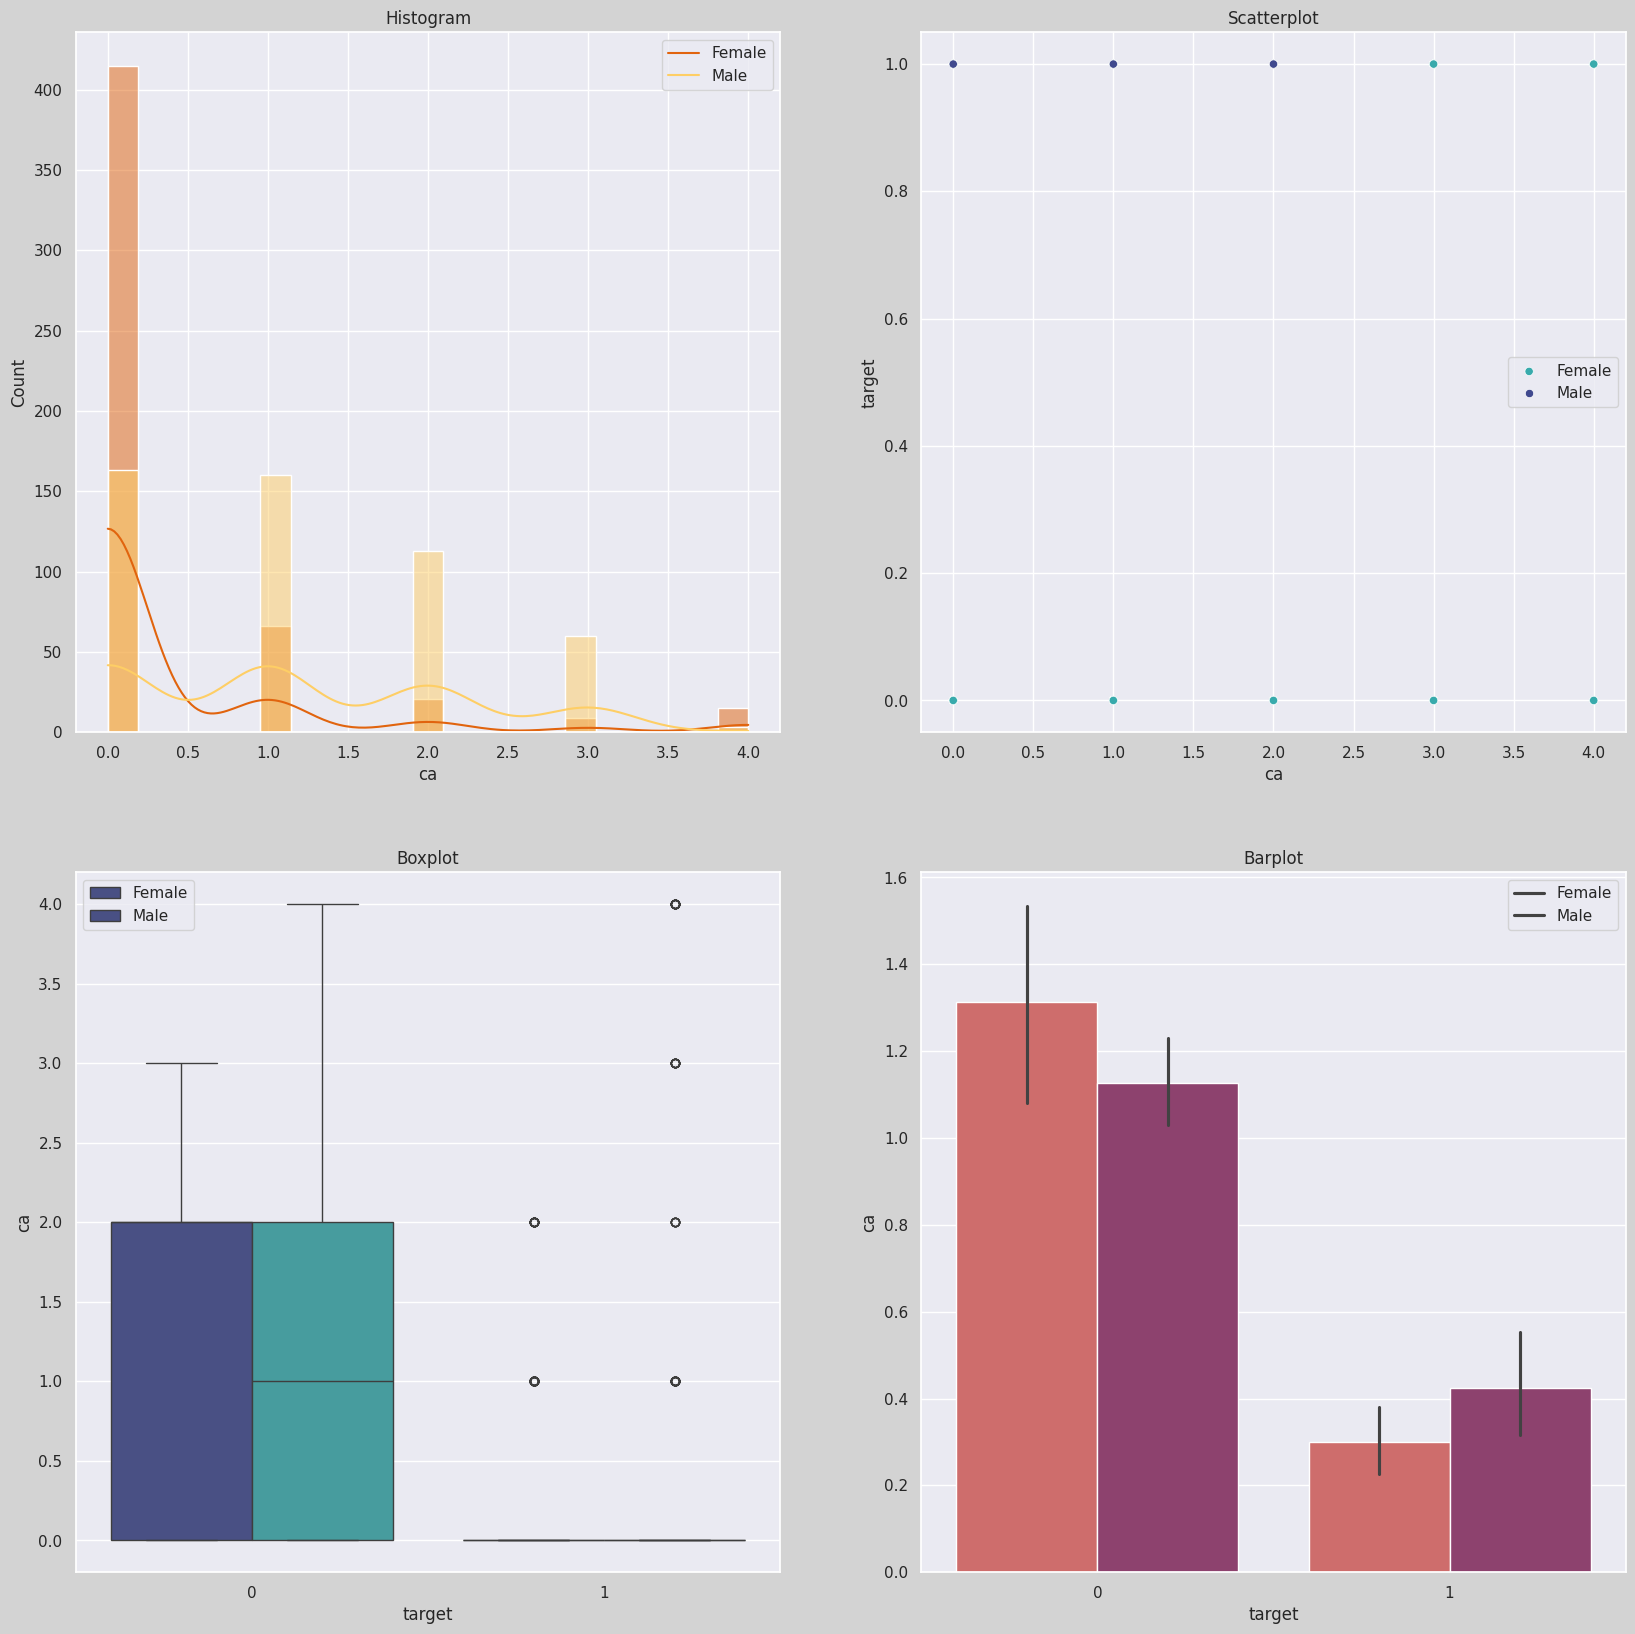

<Figure size 1500x1500 with 0 Axes>

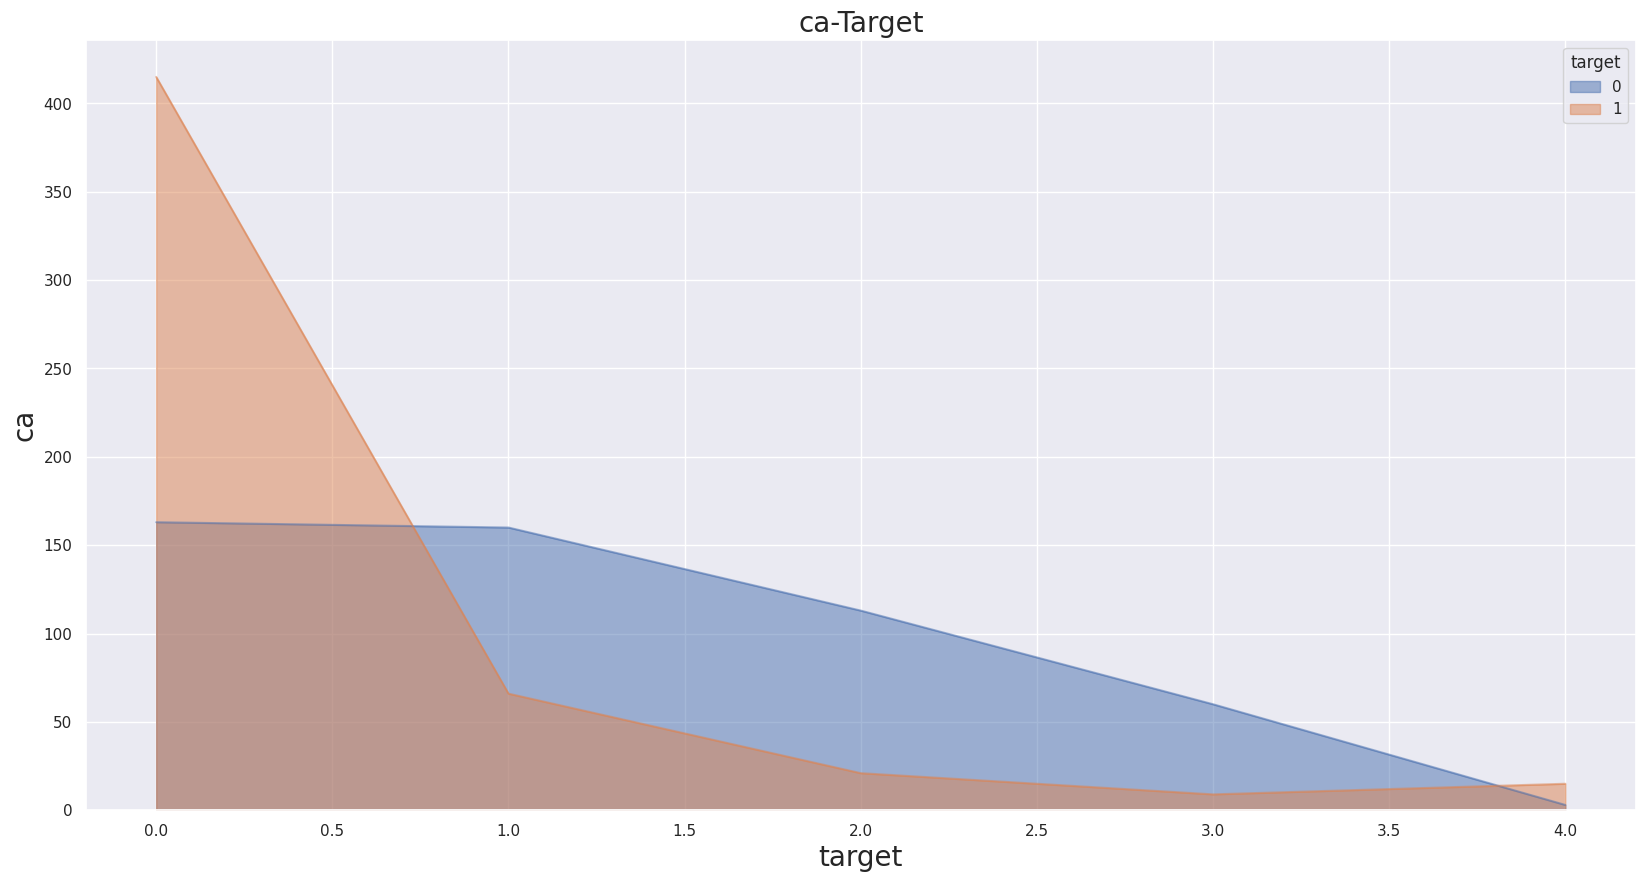

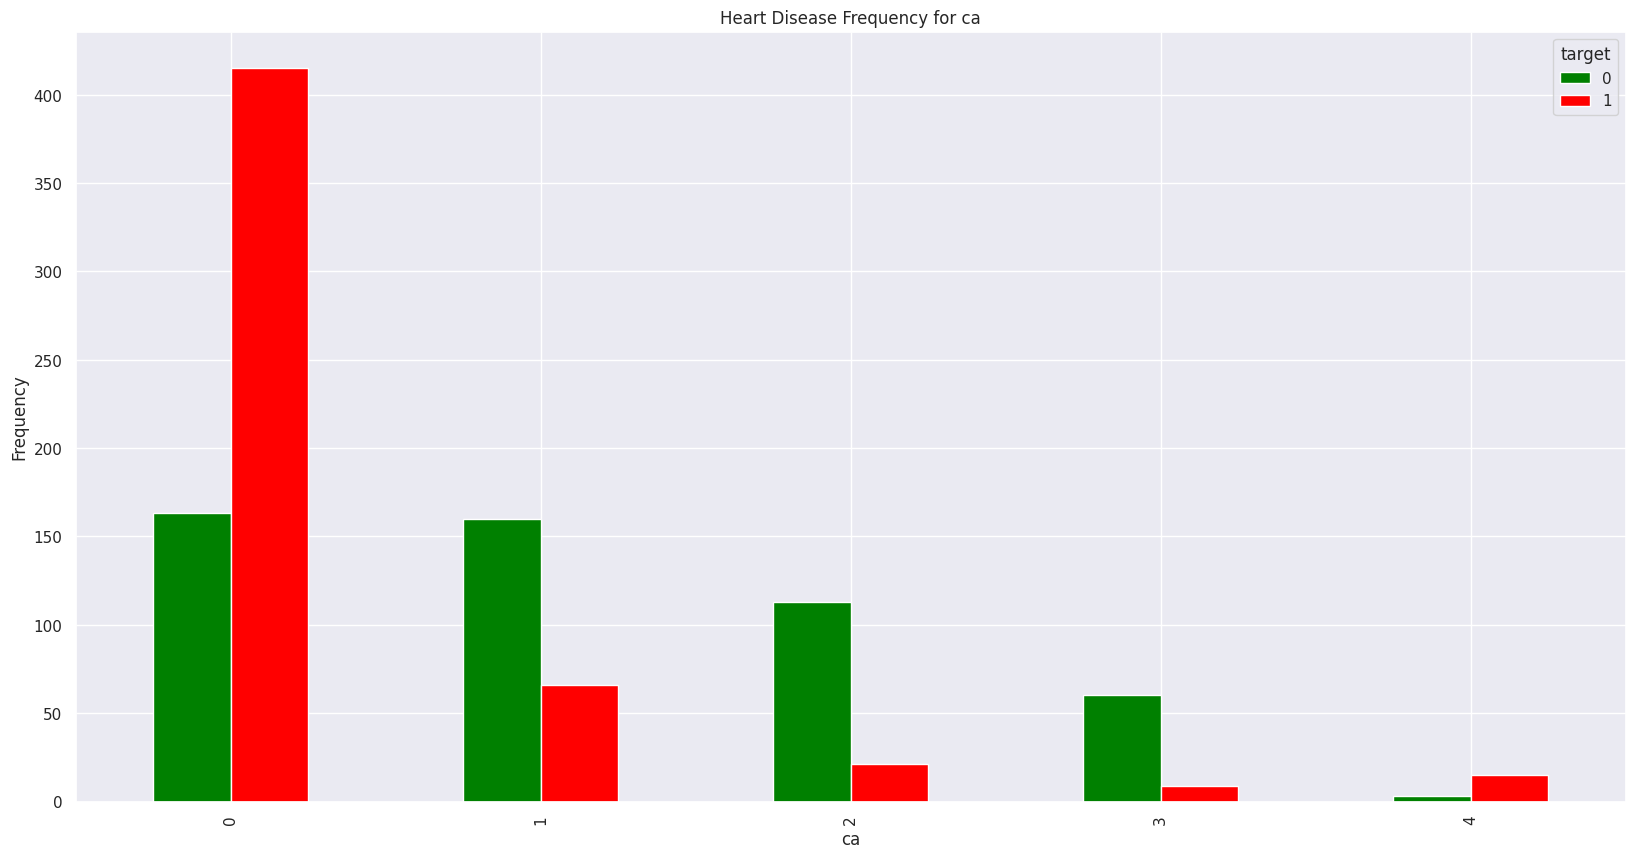



------------------------------------------------------------------------------------------------------  thal  ----------------------------------------------------------------------------------------------------


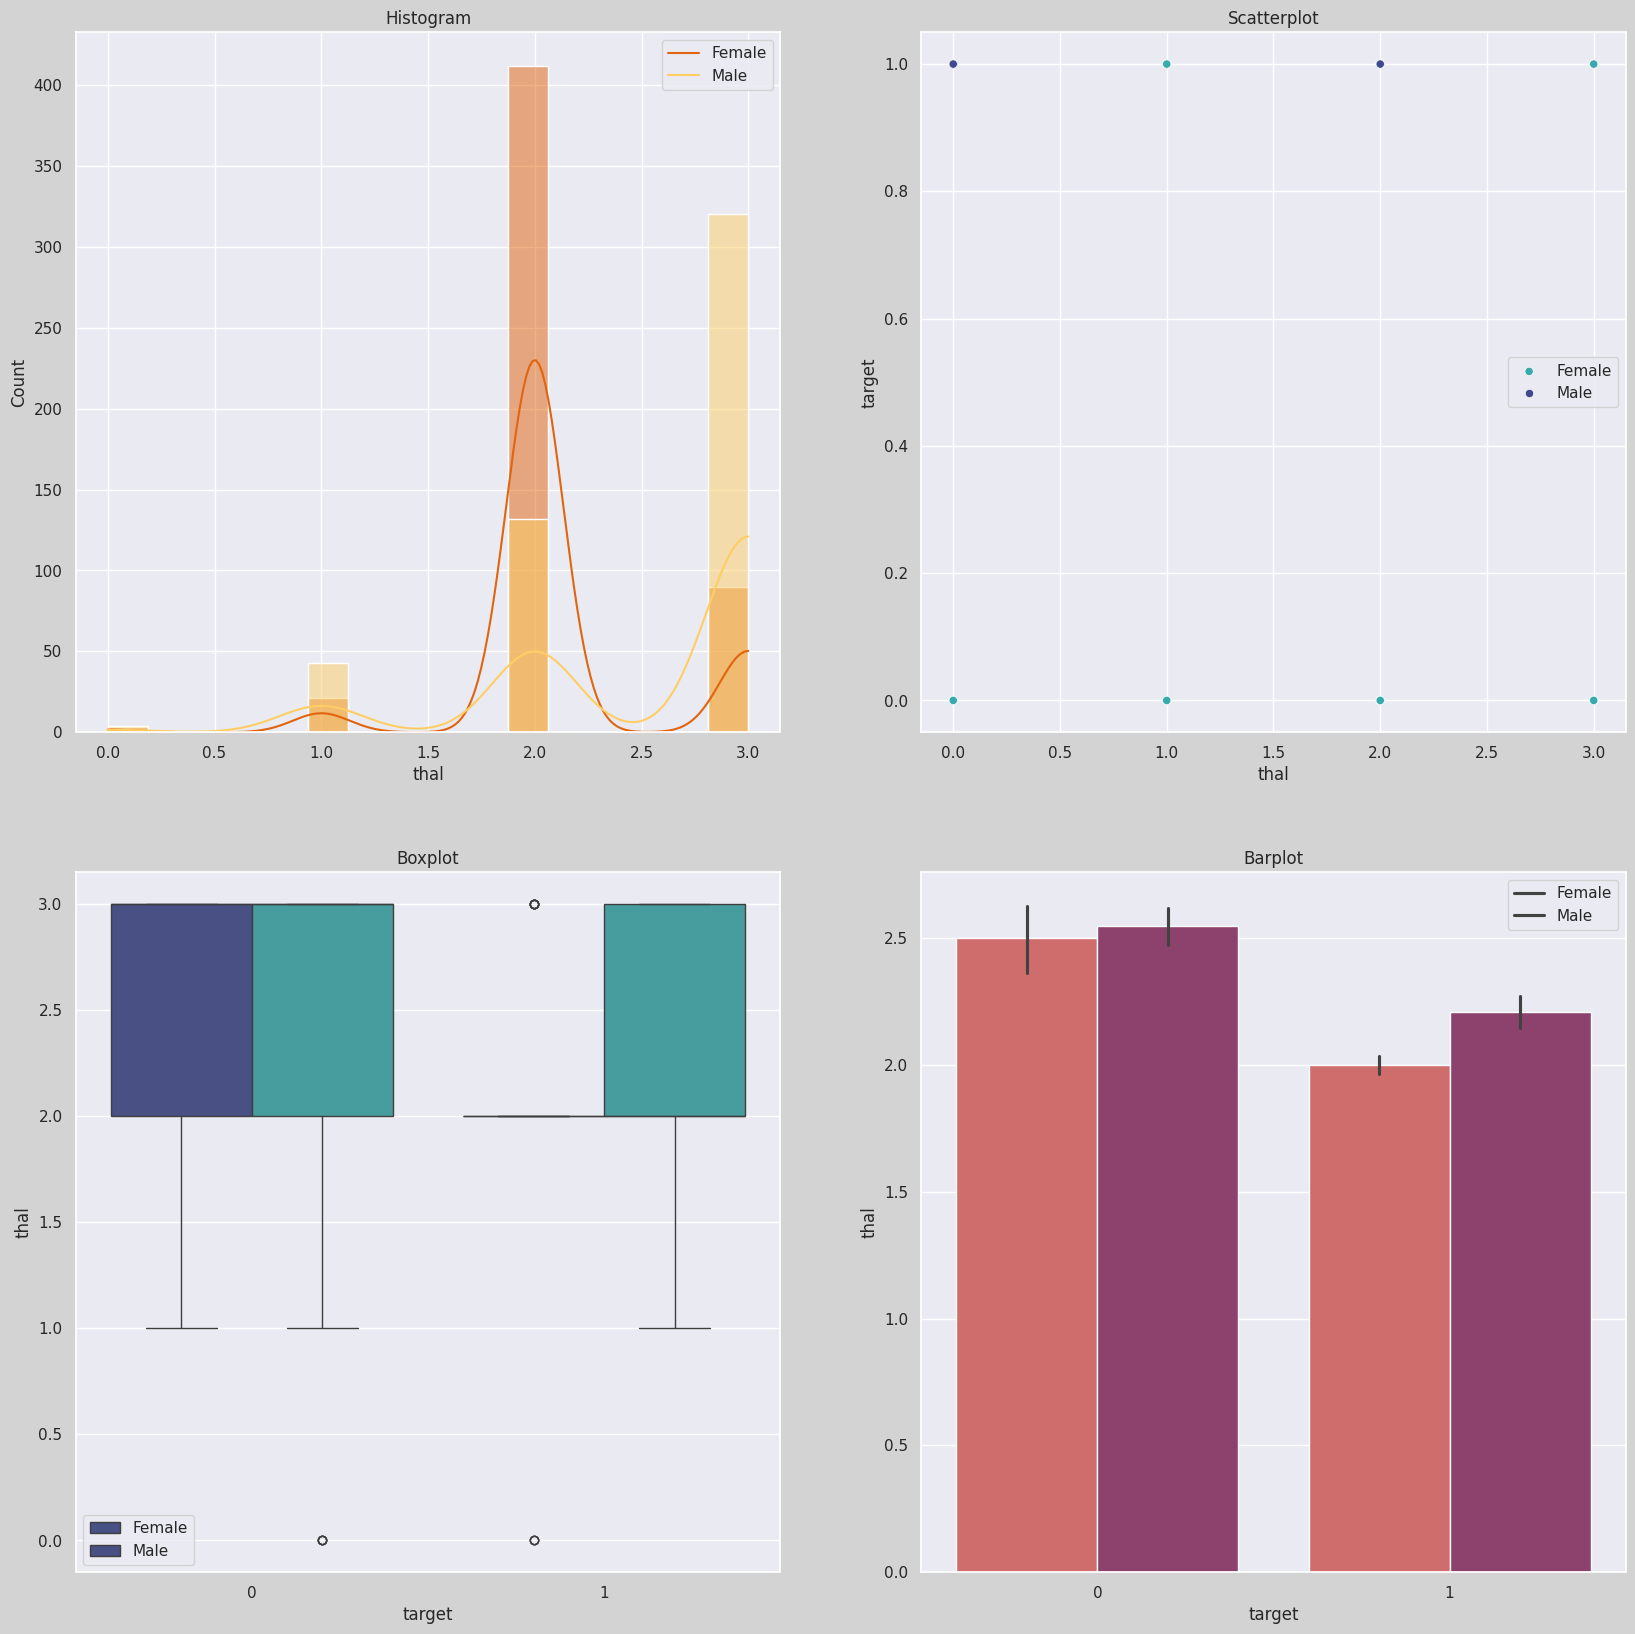

<Figure size 1500x1500 with 0 Axes>

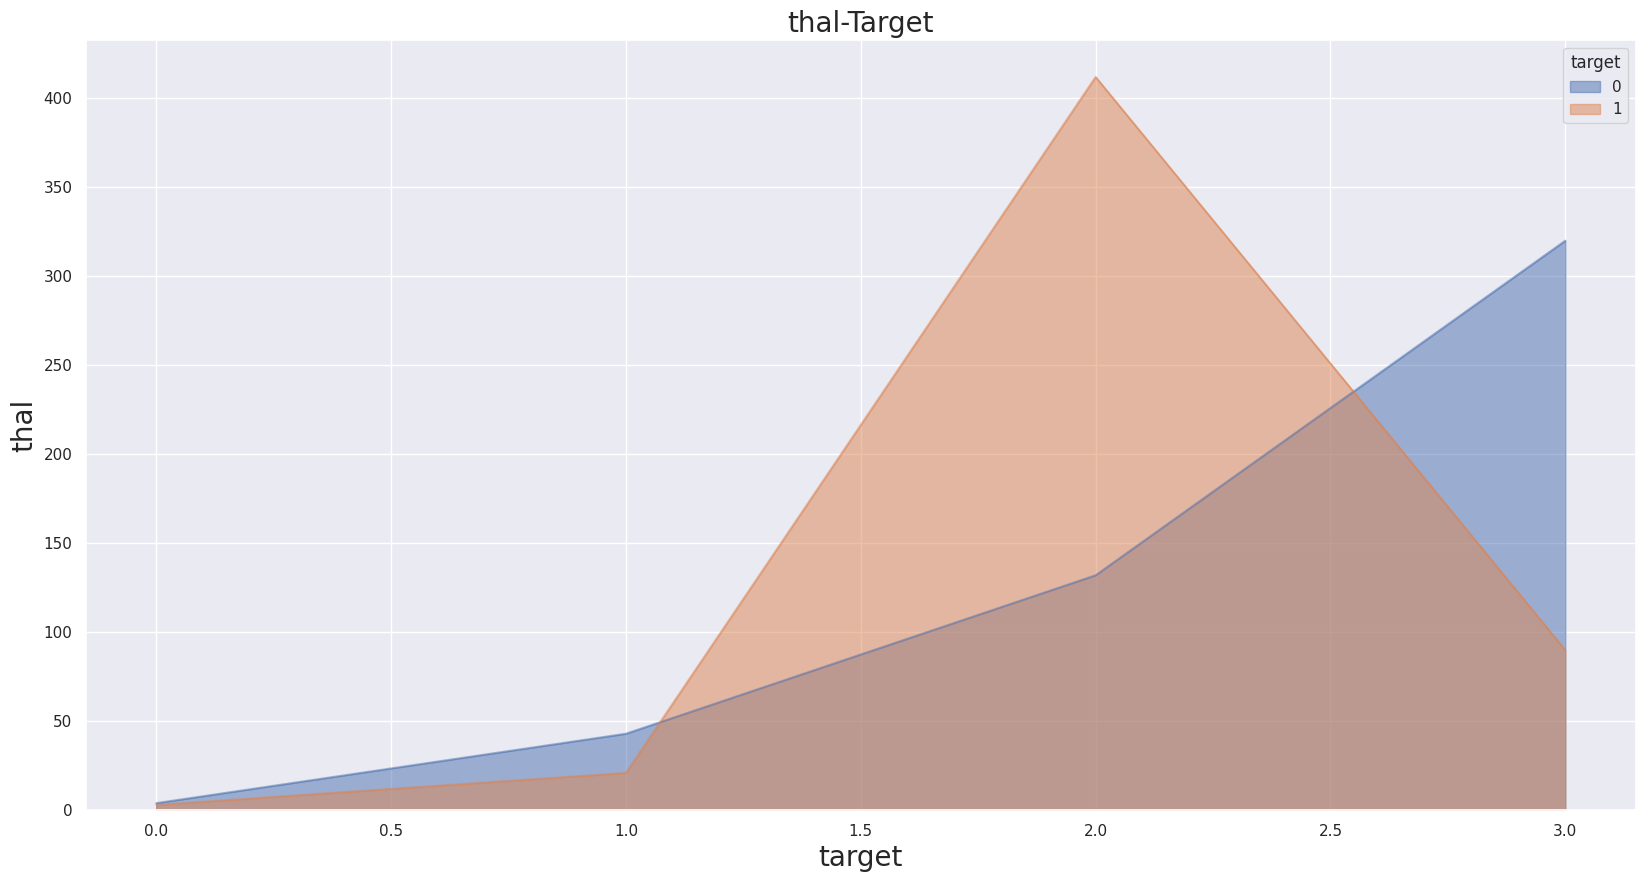

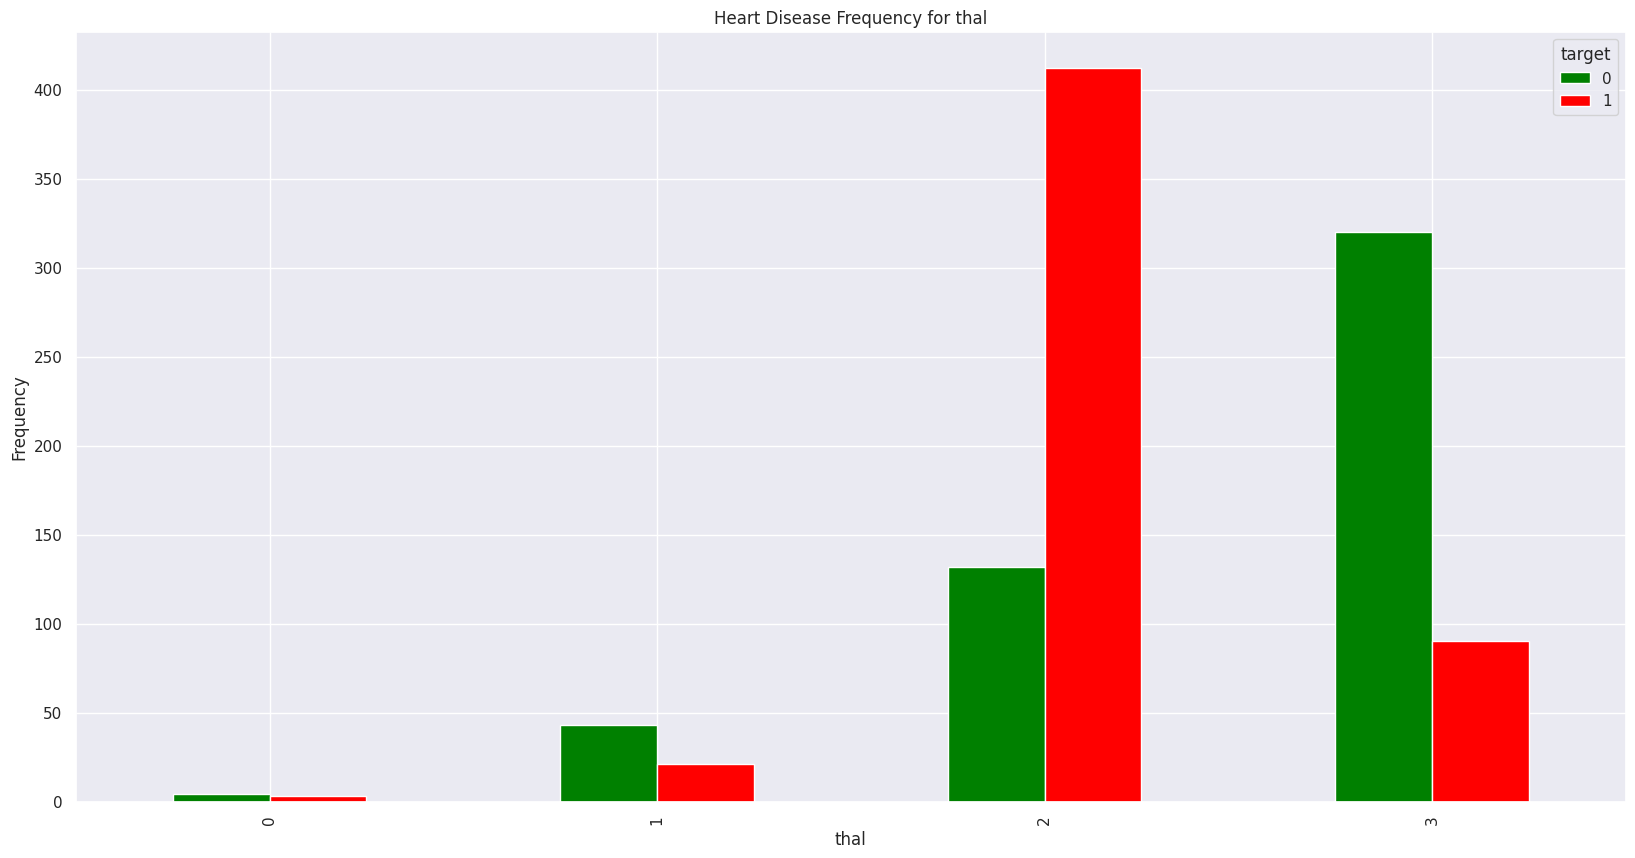

In [309]:
for i in range(len(df.columns)-1):
    print("------------------------------------------------------------------------------------------------------ ", df.columns[i]," ----------------------------------------------------------------------------------------------------")
    diagnostic_plots(df.columns[i],'target')
    print("\n")

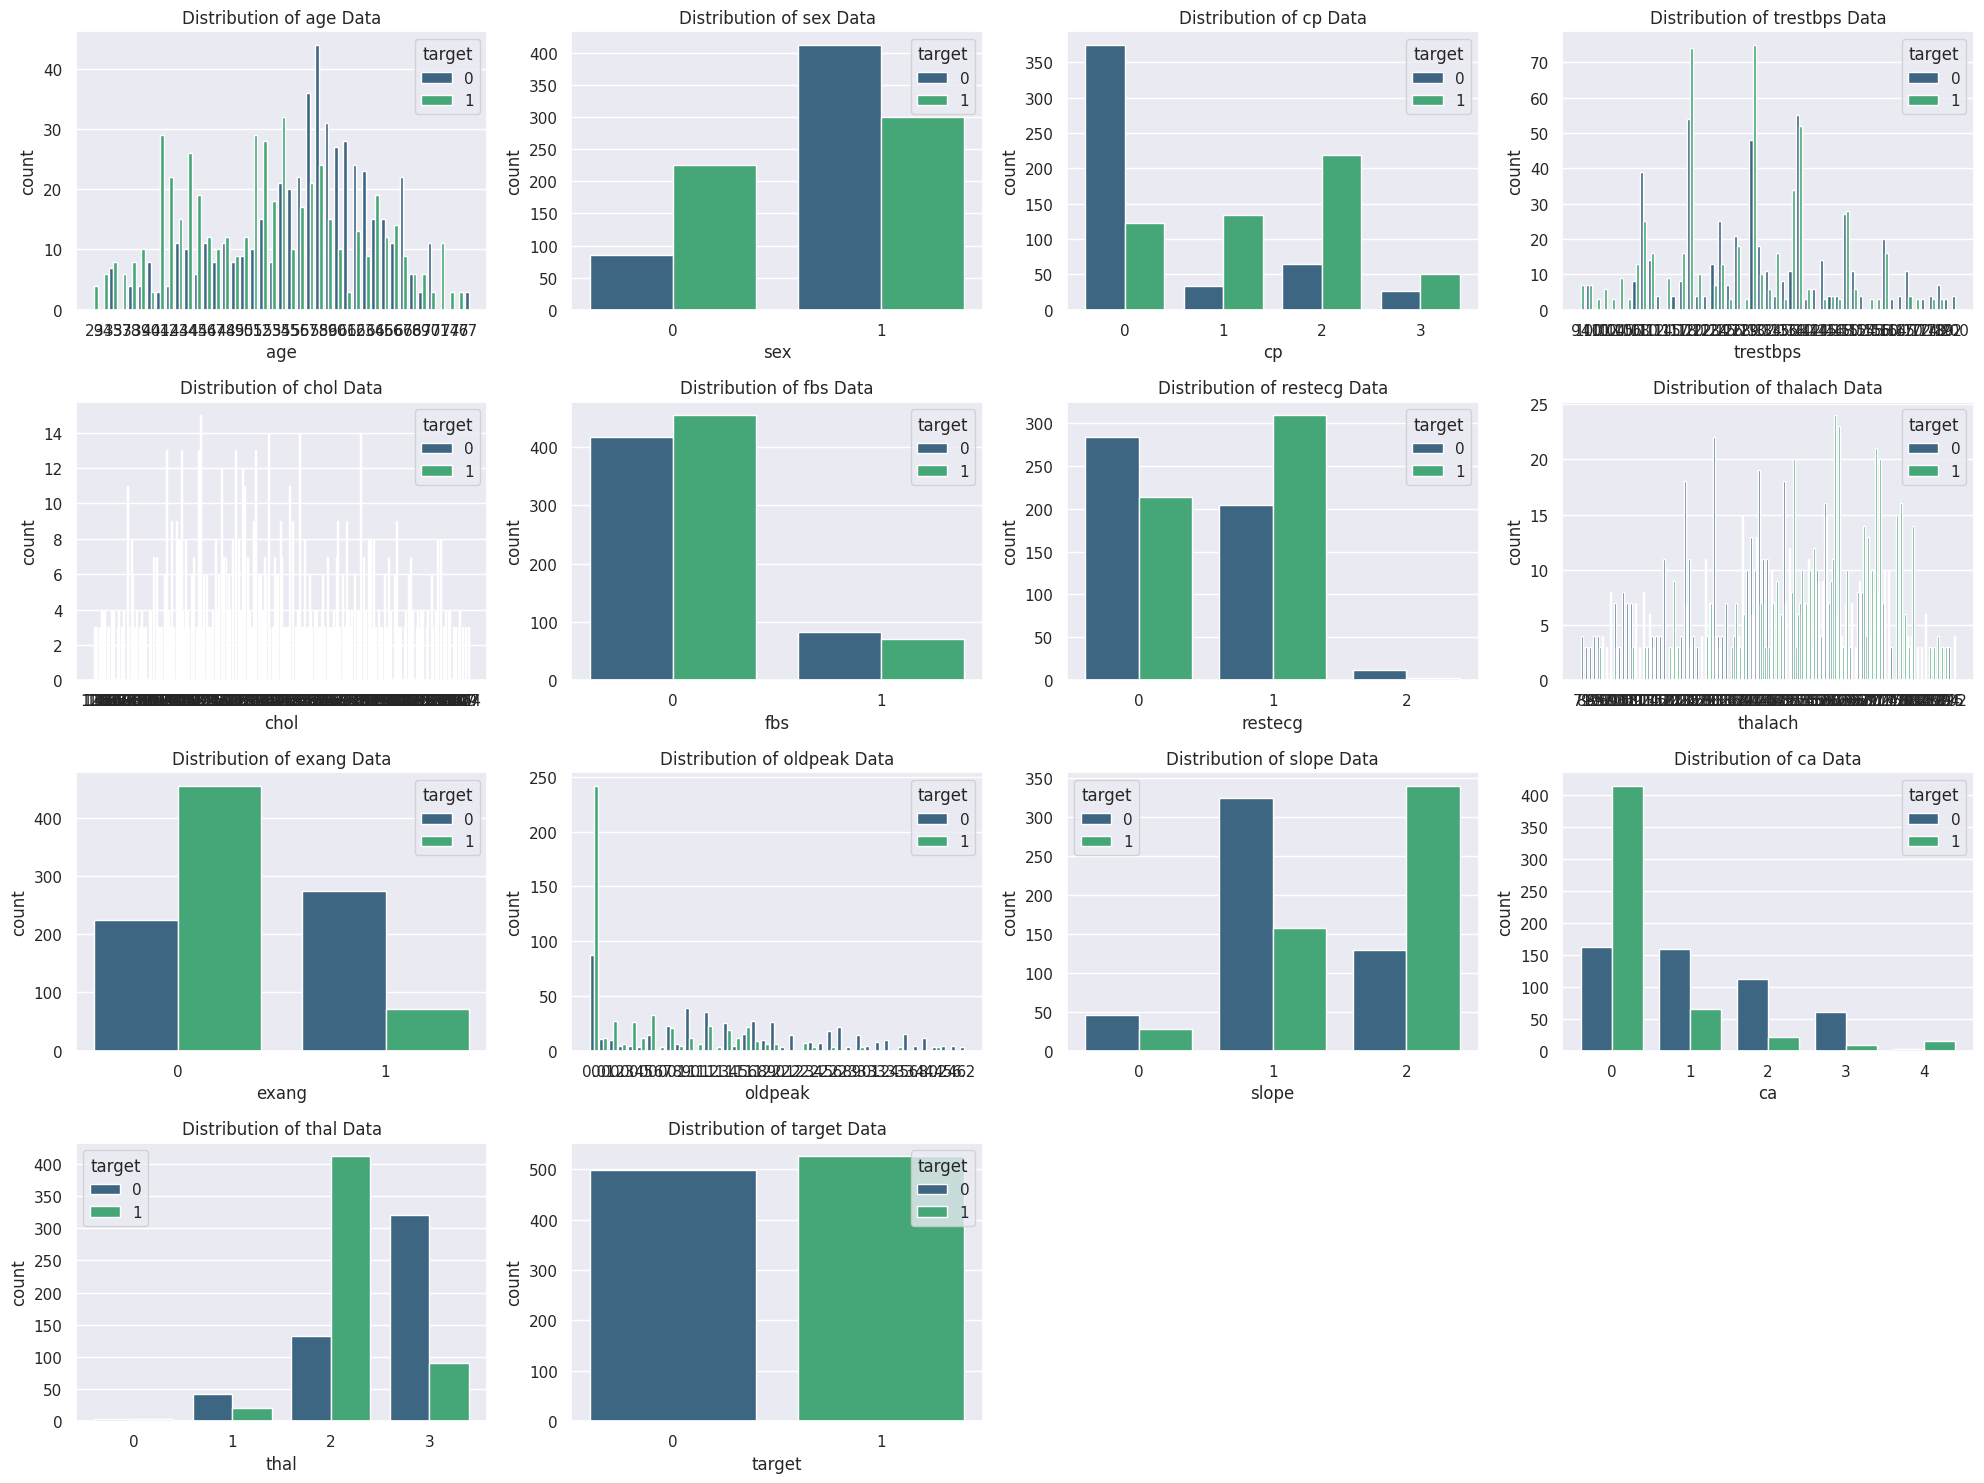

In [310]:
plt.figure(figsize=(20,15))
for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    plt.title(f"Distribution of {df.columns[i]} Data")
    sns.countplot(x=df[df.columns[i]], hue=df['target'], palette='viridis')
    plt.tight_layout()
    plt.plot()

In [311]:
col = ['age', 'trestbps', 'chol', 'thalach',
        'oldpeak', 'slope', 'ca', 'thal']

In [312]:
for i in range(len(col)):
    print(col[i])

age
trestbps
chol
thalach
oldpeak
slope
ca
thal


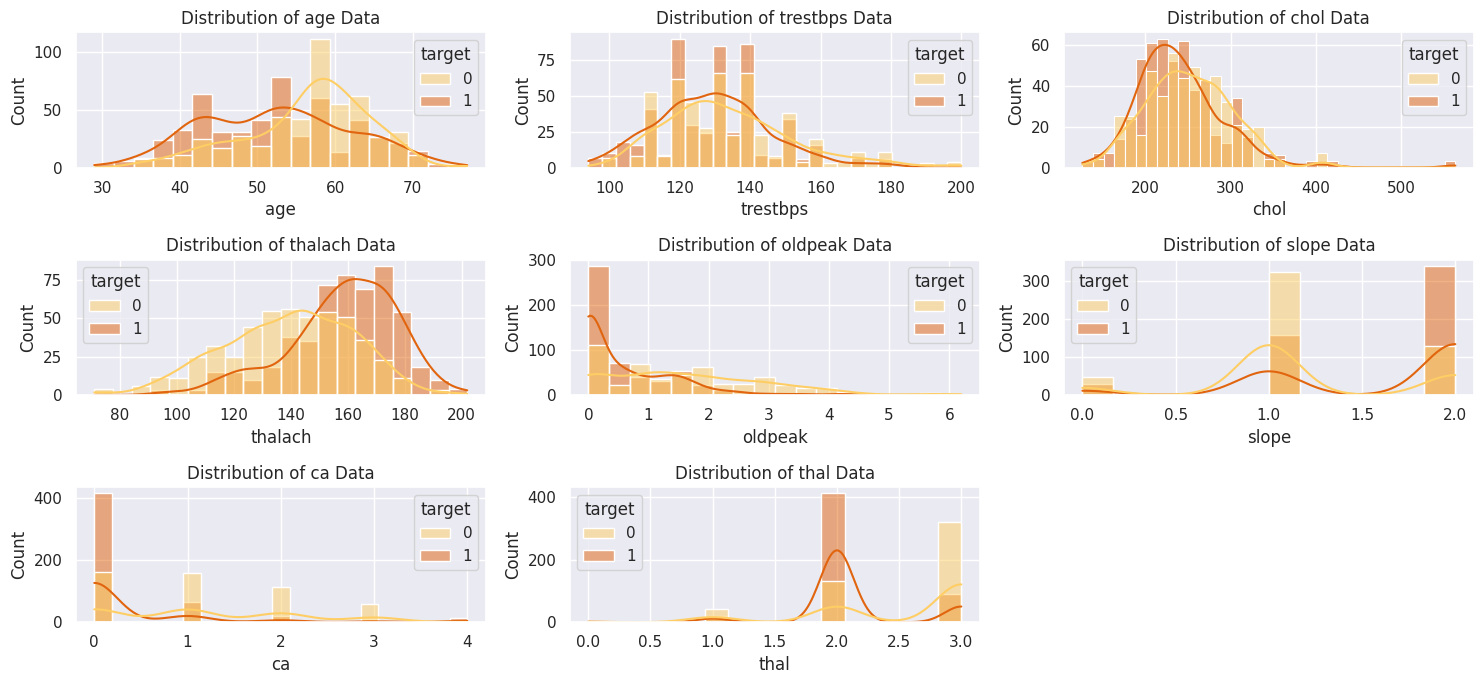

In [313]:
plt.figure(figsize=(15,7))
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    plt.title(f"Distribution of {col[i]} Data")
    sns.histplot(x=df[col[i]], hue=df['target'], kde=True, palette="YlOrBr")
    plt.tight_layout()
    plt.plot()

Text(0.5, 1.0, 'Histogram')

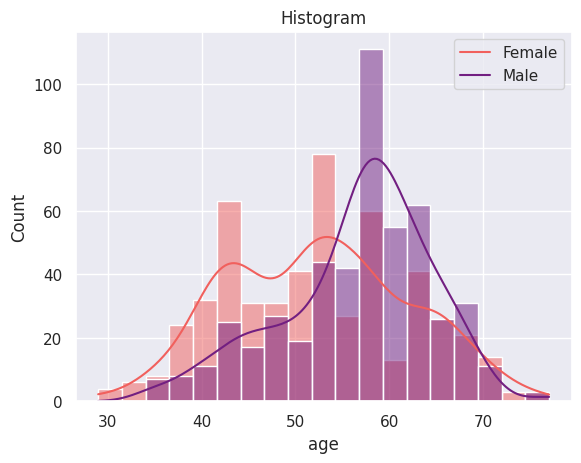

In [314]:
sns.histplot(x=df['age'], hue=df['target'], kde=True, palette="magma")
plt.legend(['Female', 'Male'])
plt.title('Histogram')

<ipython-input-315-e00733084988>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['age'], x=df['target'], palette="magma")


Text(0.5, 1.0, 'Boxplot')

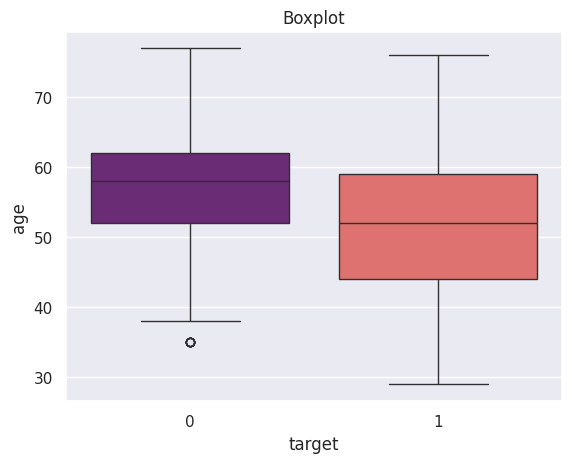

In [315]:
sns.boxplot(y=df['age'], x=df['target'], palette="magma")
plt.title('Boxplot')

# Data Preprocessing

In [316]:
df = df.sample(frac=1, random_state=42)
split_i = int(0.80*len(df))

In [317]:
X = df.drop(["target"], axis=1)
y = df["target"]

In [318]:
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
527   62    0   0       124   209    0        1      163      0      0.0   
359   53    0   2       128   216    0        0      115      0      0.0   
447   55    1   0       160   289    0        0      145      1      0.8   
31    50    0   1       120   244    0        1      162      0      1.1   
621   48    1   0       130   256    1        0      150      1      0.0   

     slope  ca  thal  
527      2   0     2  
359      2   0     0  
447      1   1     3  
31       2   0     2  
621      2   2     3

In [319]:
y[:20]

527    1
359    1
447    0
31     1
621    0
590    1
905    0
737    0
76     1
948    0
432    1
70     0
680    1
101    1
845    0
656    0
310    0
344    1
837    1
174    0
Name: target, dtype: int64

## Normalizing X Label

In [320]:
X1 = X.copy()
X1 = (X1-X1.mean()) / X1.std()
X1 = X1.to_numpy()

## Categorizing Y Label (One Hot Encoding)

In [321]:
y1 = np.zeros((y.shape[0], (np.amax(y)+1)))
y1[np.arange(y.shape[0]), y] = 1
y1[:10]

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## Train-Test Split

In [322]:
X_train, X_test = X1[:split_i], X1[split_i:]
y_train, y_test = y1[:split_i], y1[split_i:]

In [323]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape: ", y_train.shape)
print("y_test Shape : ", y_test.shape)

X_train Shape:  (820, 13)
X_test Shape :  (205, 13)
y_train Shape:  (820, 2)
y_test Shape :  (205, 2)


In [324]:
df["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

# MLP Implementation

In [325]:
class MultiLayerPerceptron:

    def __init__(self,hidden_layer, epoch, learning_rate, verbose=False):
        self.hidden_layer = hidden_layer
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.verbose = verbose

    # Initializing The Weights
    def initial_weights(self, X, y):
        n_sample, n_features = X.shape
        n_output = y.shape[1]

        limit_hidden = 1 / math.sqrt(n_features)
        self.hiddenWeight = np.random.uniform(-limit_hidden,limit_hidden, (n_features, self.hidden_layer))
        self.BiasHidden = np.zeros((1, self.hidden_layer))

        limit_out = 1 / math.sqrt(self.hidden_layer)
        self.outputWeight = np.random.uniform(-limit_out, limit_out, (self.hidden_layer, n_output))
        self.BiasOutput = np.zeros((1, n_output))

    #Sigmoid Function
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))

    #Sigmoid Derivative Function
    def sigmoid_derivative(self, z):
        return self.sigmoid(z)*(1 - self.sigmoid(z))

    #SoftMax Function (Output Layer)
    def softmax(self, z):
        e_x = np.exp(z-np.max(z, axis=-1, keepdims=True))
        return e_x/np.sum(e_x, axis=-1, keepdims=True)

    #SoftMax Gradient Function
    def softmax_gradient(self, z):
        return self.softmax(z)*(1-self.softmax(z))

    #Cross-Entropy Loss Function
    def loss(self, h, y):
        h = np.clip(h, 1e-15, 1 - 1e-15)
        return (-y * np.log(h) - (1-y) * np.log(1-h))

    #Cross-Entropy Loss Gradient Function
    def loss_gradient(self, h, y):
        h = np.clip(h,1e-15,1-1e-15)
        return -(h/y) + (1-h) / (1-y)

    #Prediction Function
    def predict(self, X):
        hidden_input = X.dot(self.hiddenWeight) + self.BiasHidden
        hidden_output = self.sigmoid(hidden_input)
        output_layer_input = hidden_output.dot(self.outputWeight) + self.BiasOutput
        y_pred = self.softmax(output_layer_input)
        return y_pred

    #Fit Function
    def fit(self, X, y):
        self.initial_weights(X, y)
        n_epoch = 1

        while (n_epoch <= self.epoch):

            #Forward Propogation

            #Hidden Layer
            hidden_input = X.dot(self.hiddenWeight) + self.BiasHidden
            hidden_output = self.sigmoid(hidden_input)

            #Output layer
            output_layer_input = hidden_output.dot(self.outputWeight) + self.BiasOutput
            y_pred = self.softmax(output_layer_input)

            #Backward Propogation

            #Output Layer Gradient
            grad_out_input = self.loss_gradient(y, y_pred) * self.softmax_gradient(output_layer_input)
            grad_output = hidden_output.T.dot(grad_out_input)
            grad_biasoutput = np.sum(grad_out_input, axis=0, keepdims=True)

            #Hidden Layer Gradient
            grad_input_out = grad_out_input.dot(self.outputWeight.T) * self.sigmoid_derivative(hidden_input)
            grad_input = X.T.dot(grad_input_out)
            grad_biasinput = np.sum(grad_input_out, axis=0, keepdims=True)

            #Updating Weights
            self.outputWeight -= self.learning_rate * grad_output
            self.BiasOutput -= self.learning_rate *grad_biasoutput
            self.hiddenWeight -= self.learning_rate * grad_input
            self.BiasHidden -= self.learning_rate * grad_biasinput

            n_epoch += 1

# Model Testing And Performance

In [326]:
model = MultiLayerPerceptron(hidden_layer=16, epoch=10000, learning_rate=0.001, verbose=True)
model.fit(X_train, y_train)

y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)


print("Accuracy: ", sklearn.metrics.accuracy_score(y_test, y_pred), "\n")
print(sklearn.metrics.classification_report(y_test, y_pred, digits=3))

Accuracy:  1.0 

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        99
           1      1.000     1.000     1.000       106

    accuracy                          1.000       205
   macro avg      1.000     1.000     1.000       205
weighted avg      1.000     1.000     1.000       205

